# IMPORTANTE

*En este notebook vamos a hacer el EDA para el año "2023"*

*Muestro más abajo las descripciones de cada columna:*

- ***Country***: The name of the country where the health data was recorded.
- ***Year***: The year in which the data was collected.
- ***Disease Name***: The name of the disease or health condition tracked.
- ***Disease Category***: The category of the disease (e.g., Infectious, Non-Communicable).
- ***Prevalence Rate (%)***: The percentage of the population affected by the disease.
- ***Incidence Rate (%)***: The percentage of new or newly diagnosed cases.
- ***Mortality Rate (%)***: The percentage of the affected population that dies from the disease.
- ***Age Group***: The age range most affected by the disease.
- ***Gender***: The gender(s) affected by the disease (Male, Female, Both).
- ***Population Affected***: The total number of individuals affected by the disease.
- ***Healthcare Access (%)***: The percentage of the population with access to healthcare.
- ***Doctors per 1000***: The number of doctors per 1000 people.
- ***Hospital Beds per 1000***: The number of hospital beds available per 1000 people.
- ***Treatment Type***: The primary treatment method for the disease (e.g., Medication, Surgery).
- ***Average Treatment Cost (USD)***: The average cost of treating the disease in USD.
- ***Availability of Vaccines/Treatment***: Whether vaccines or treatments are available.
- ***Recovery Rate (%)***: The percentage of people who recover from the disease.
- ***DALYs***: Disability-Adjusted Life Years, a measure of disease burden.
- ***Improvement in 5 Years (%)***: The improvement in disease outcomes over the last five years.
- ***Per Capita Income (USD)***: The average income per person in the country.
- ***Education Index***: The average level of education in the country.
- ***Urbanization Rate (%)***: The percentage of the population living in urban areas.

In [1]:
# Importamos las librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# import pprint

from scipy.stats import mannwhitneyu
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
# Función para pintas la variables categóricas

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [3]:
# Función para pintar varios diagramas boxplot

def plot_multiple_boxplots(df, columns):
    num_cols = 3
    num_rows = 5
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [4]:
# Abrimos el archivo csv en un dataset

df = pd.read_csv("../data/Global Health Statistics.csv")

## EXPLORACIÓN INICIAL

In [5]:
# Visualizamos el dataframe

pd.set_option("display.max_columns", None) # Así vemos todas las columnas
df

Country  Year         Disease Name Disease Category  \
0              Italy  2013              Malaria      Respiratory   
1             France  2002                Ebola        Parasitic   
2             Turkey  2015             COVID-19          Genetic   
3          Indonesia  2011  Parkinson's Disease       Autoimmune   
4              Italy  2013         Tuberculosis          Genetic   
...              ...   ...                  ...              ...   
999995  Saudi Arabia  2021  Parkinson's Disease       Infectious   
999996  Saudi Arabia  2013              Malaria      Respiratory   
999997           USA  2016                 Zika      Respiratory   
999998       Nigeria  2020               Asthma          Chronic   
999999     Indonesia  2004               Asthma     Neurological   

        Prevalence Rate (%)  Incidence Rate (%)  Mortality Rate (%) Age Group  \
0                      0.95                1.55                8.42      0-18   
1                     12.46                8.63                8.75       61+   
2                      0.91                2.35                6.22     36-60   
3                      4.68                6.29                3.99      0-18   
4                      0.83               13.59                7.01       61+   
...                     ...                 ...                 ...       ...   
999995                 4.56                4.83                9.65      0-18   
999996                 0.26                1.76                0.56      0-18   
999997                13.44               14.13                1.91     19-35   
999998                 1.96               14.56                4.98       61+   
999999                15.58                9.84                0.51     36-60   

        Gender  Population Affected  Healthcare Access (%)  Doctors per 1000  \
0         Male               471007                  57.74              3.34   
1         Male               634318                  89.21              1.33   
2         Male               154878                  56.41              4.07   
3        Other               446224                  85.20              3.18   
4         Male               472908                  67.00              4.61   
...        ...                  ...                    ...               ...   
999995  Female               119332                  88.78              1.98   
999996  Female               354927                  82.24              1.28   
999997   Other               807915                  71.46              4.18   
999998  Female               385896                  57.10              2.61   
999999   Other               632775                  77.57              2.10   

        Hospital Beds per 1000 Treatment Type  Average Treatment Cost (USD)  \
0                         7.58     Medication                         21064   
1                         5.11        Surgery                         47851   
2                         3.49    Vaccination                         27834   
3                         8.44        Surgery                           144   
4                         5.90     Medication                          8908   
...                        ...            ...                           ...   
999995                    4.23    Vaccination                          4528   
999996                    6.34        Surgery                         20686   
999997                    8.11        Therapy                         18807   
999998                    6.91     Medication                         21033   
999999                    6.79        Therapy                           505   

       Availability of Vaccines/Treatment  Recovery Rate (%)  DALYs  \
0                                      No              91.82   4493   
1                                     Yes              76.65   2366   
2                                     Yes              98.55     41   
3                            

In [6]:
# Vamos a ver los valores únicos de las diferentes columnas a ver si hay algo raro

for columna in df.columns:
    print(f"{columna}: {df[columna].sort_values().unique()}")
    print("--------------")

Country: ['Argentina' 'Australia' 'Brazil' 'Canada' 'China' 'France' 'Germany'
 'India' 'Indonesia' 'Italy' 'Japan' 'Mexico' 'Nigeria' 'Russia'
 'Saudi Arabia' 'South Africa' 'South Korea' 'Turkey' 'UK' 'USA']
--------------
Year: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
--------------
Disease Name: ["Alzheimer's Disease" 'Asthma' 'COVID-19' 'Cancer' 'Cholera' 'Dengue'
 'Diabetes' 'Ebola' 'HIV/AIDS' 'Hepatitis' 'Hypertension' 'Influenza'
 'Leprosy' 'Malaria' 'Measles' "Parkinson's Disease" 'Polio' 'Rabies'
 'Tuberculosis' 'Zika']
--------------
Disease Category: ['Autoimmune' 'Bacterial' 'Cardiovascular' 'Chronic' 'Genetic'
 'Infectious' 'Metabolic' 'Neurological' 'Parasitic' 'Respiratory' 'Viral']
--------------
Prevalence Rate (%): [ 0.1   0.11  0.12 ... 19.98 19.99 20.  ]
--------------
Incidence Rate (%): [ 0.1   0.11  0.12 ... 14.98 14.99 15.  ]
--------------
Mortality Rate (%): [ 0.1   0.11  0

*Se comprueba que no hay valores/texto raro en las diferentes columnas (p.e. USA / EEUU / US)*

*Como nuestras hipótesis están basadas en el año 2023, vamos a comprobar con código y con un histograma la cantidad de datos que tenemos para cada uno de los años, por 
si la cantidad es suficiente para abordar el análisis o no*

In [7]:
# Mediante código

for año in df["Year"].sort_values().unique():
    print(f"{año}: {len(df[df["Year"] == año])}")


2000: 40268
2001: 39896
2002: 40063
2003: 40141
2004: 40031
2005: 40039
2006: 40007
2007: 40375
2008: 39903
2009: 40079
2010: 39902
2011: 39654
2012: 39897
2013: 39641
2014: 39699
2015: 39974
2016: 40086
2017: 39836
2018: 40228
2019: 39985
2020: 40130
2021: 40013
2022: 39876
2023: 40274
2024: 40003


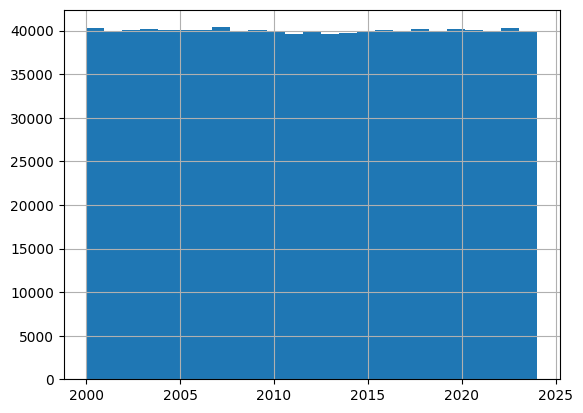

In [8]:
# Mediante histograma

df["Year"].hist(bins=25);

*Para todos los años tenemos entre 39k y 40k valores, por lo que a priori sí que se podría realizar el análisis para el año 2023*

In [9]:
# Vamos a obtener el dataframe para el año 2023

df_2023 = df[df["Year"] == 2023].reset_index()
df_2023

index       Country  Year  Disease Name Disease Category  \
0          49  Saudi Arabia  2023  Hypertension        Metabolic   
1          59        Russia  2023       Leprosy        Bacterial   
2          92            UK  2023         Polio        Bacterial   
3         108   South Korea  2023         Ebola          Chronic   
4         110         China  2023        Cancer          Genetic   
...       ...           ...   ...           ...              ...   
40269  999814        Mexico  2023          Zika          Chronic   
40270  999820        Canada  2023     Influenza            Viral   
40271  999845     Indonesia  2023        Asthma        Parasitic   
40272  999886       Nigeria  2023        Asthma        Bacterial   
40273  999892        Russia  2023         Ebola            Viral   

       Prevalence Rate (%)  Incidence Rate (%)  Mortality Rate (%) Age Group  \
0                    14.72               13.90                3.28     36-60   
1                    16.22                8.43                9.61       61+   
2                    10.69                5.69                3.12     19-35   
3                     9.74               11.62                3.87      0-18   
4                    18.82                1.97                0.55     19-35   
...                    ...                 ...                 ...       ...   
40269                 3.61               13.40                7.82     19-35   
40270                 7.40               10.36                4.23       61+   
40271                 5.96                8.30                4.03     36-60   
40272                10.29                0.72                0.89      0-18   
40273                10.34                2.52                9.16     36-60   

       Gender  Population Affected  Healthcare Access (%)  Doctors per 1000  \
0      Female                28737                  97.73              4.51   
1       Other               422327                  51.80              3.75   
2        Male                55467                  53.02              3.58   
3        Male                15852                  91.80              2.92   
4        Male               421832                  87.89              1.42   
...       ...                  ...                    ...               ...   
40269   Other               460136                  59.07              4.89   
40270  Female               484111                  98.73              1.20   
40271   Other               237717                  89.22              0.72   
40272    Male               447344                  84.04              3.53   
40273  Female               140789                  81.91              3.83   

       Hospital Beds per 1000 Treatment Type  Average Treatment Cost (USD)  \
0                        5.60     Medication                         24176   
1                        2.98        Therapy                         27605   
2                        2.32    Vaccination                         10052   
3                        8.71    Vaccination                         33473   
4                        3.33    Vaccination                         49084   
...                       ...            ...                           ...   
40269                    2.34     Medication                          4100   
40270                    2.12    Vaccination                         18150   
40271                    6.59        Surgery                         46204   
40272                    8.37    Vaccination                         26303   
40273                    8.48     Medication                         35722   

      Availability of Vaccines/Treatment  Recovery Rate (%)  DALYs  \
0                                     No              85.19    783   
1                                    Yes              98.03   3145   
2                                     No              71.01    959   
3                                    Yes              76.67   35

In [10]:
# Eliminamos la columna de "index"

df_2023.drop(columns = ["index"], inplace = True)
df_2023

Country  Year  Disease Name Disease Category  Prevalence Rate (%)  \
0      Saudi Arabia  2023  Hypertension        Metabolic                14.72   
1            Russia  2023       Leprosy        Bacterial                16.22   
2                UK  2023         Polio        Bacterial                10.69   
3       South Korea  2023         Ebola          Chronic                 9.74   
4             China  2023        Cancer          Genetic                18.82   
...             ...   ...           ...              ...                  ...   
40269        Mexico  2023          Zika          Chronic                 3.61   
40270        Canada  2023     Influenza            Viral                 7.40   
40271     Indonesia  2023        Asthma        Parasitic                 5.96   
40272       Nigeria  2023        Asthma        Bacterial                10.29   
40273        Russia  2023         Ebola            Viral                10.34   

       Incidence Rate (%)  Mortality Rate (%) Age Group  Gender  \
0                   13.90                3.28     36-60  Female   
1                    8.43                9.61       61+   Other   
2                    5.69                3.12     19-35    Male   
3                   11.62                3.87      0-18    Male   
4                    1.97                0.55     19-35    Male   
...                   ...                 ...       ...     ...   
40269               13.40                7.82     19-35   Other   
40270               10.36                4.23       61+  Female   
40271                8.30                4.03     36-60   Other   
40272                0.72                0.89      0-18    Male   
40273                2.52                9.16     36-60  Female   

       Population Affected  Healthcare Access (%)  Doctors per 1000  \
0                    28737                  97.73              4.51   
1                   422327                  51.80              3.75   
2                    55467                  53.02              3.58   
3                    15852                  91.80              2.92   
4                   421832                  87.89              1.42   
...                    ...                    ...               ...   
40269               460136                  59.07              4.89   
40270               484111                  98.73              1.20   
40271               237717                  89.22              0.72   
40272               447344                  84.04              3.53   
40273               140789                  81.91              3.83   

       Hospital Beds per 1000 Treatment Type  Average Treatment Cost (USD)  \
0                        5.60     Medication                         24176   
1                        2.98        Therapy                         27605   
2                        2.32    Vaccination                         10052   
3                        8.71    Vaccination                         33473   
4                        3.33    Vaccination                         49084   
...                       ...            ...                           ...   
40269                    2.34     Medication                          4100   
40270                    2.12    Vaccination                         18150   
40271                    6.59        Surgery                         46204   
40272                    8.37    Vaccination                         26303   
40273                    8.48     Medication                         35722   

      Availability of Vaccines/Treatment  Recovery Rate (%)  DALYs  \
0                                     No              85.19    783   
1                                    Yes              98.03   3145   
2                                     No              71.01    959   
3                                    Yes              76.67   3585   
4                                    Yes              83.95   2231   
...                     

In [11]:
# Vamos a ver los valores únicos de las diferentes columnas

for columna in df_2023.columns:
    print(f"{columna}: {df_2023[columna].sort_values().unique()}")
    print("--------------")

Country: ['Argentina' 'Australia' 'Brazil' 'Canada' 'China' 'France' 'Germany'
 'India' 'Indonesia' 'Italy' 'Japan' 'Mexico' 'Nigeria' 'Russia'
 'Saudi Arabia' 'South Africa' 'South Korea' 'Turkey' 'UK' 'USA']
--------------
Year: [2023]
--------------
Disease Name: ["Alzheimer's Disease" 'Asthma' 'COVID-19' 'Cancer' 'Cholera' 'Dengue'
 'Diabetes' 'Ebola' 'HIV/AIDS' 'Hepatitis' 'Hypertension' 'Influenza'
 'Leprosy' 'Malaria' 'Measles' "Parkinson's Disease" 'Polio' 'Rabies'
 'Tuberculosis' 'Zika']
--------------
Disease Category: ['Autoimmune' 'Bacterial' 'Cardiovascular' 'Chronic' 'Genetic'
 'Infectious' 'Metabolic' 'Neurological' 'Parasitic' 'Respiratory' 'Viral']
--------------
Prevalence Rate (%): [ 0.1   0.11  0.12 ... 19.98 19.99 20.  ]
--------------
Incidence Rate (%): [ 0.1   0.11  0.12 ... 14.98 14.99 15.  ]
--------------
Mortality Rate (%): [ 0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21
  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0

In [12]:
# Vemos la descripción general matemática de los valores numéricos

df_2023.describe().T

count           mean            std     min  \
Year                          40274.0    2023.000000       0.000000  2023.0   
Prevalence Rate (%)           40274.0      10.047805       5.745283     0.1   
Incidence Rate (%)            40274.0       7.569792       4.301243     0.1   
Mortality Rate (%)            40274.0       5.043889       2.857528     0.1   
Population Affected           40274.0  501986.222178  288813.360716  1037.0   
Healthcare Access (%)         40274.0      75.028516      14.440512    50.0   
Doctors per 1000              40274.0       2.749346       1.300715     0.5   
Hospital Beds per 1000        40274.0       5.251523       2.750028     0.5   
Average Treatment Cost (USD)  40274.0   25136.249590   14415.920135   100.0   
Recovery Rate (%)             40274.0      74.646574      14.197891    50.0   
DALYs                         40274.0    2500.248125    1445.217900     1.0   
Improvement in 5 Years (%)    40274.0       5.000388       2.895177     0.0   
Per Capita Income (USD)       40274.0   50294.219844   28737.742836   502.0   
Education Index               40274.0       0.650856       0.144427     0.4   
Urbanization Rate (%)         40274.0      55.242961      20.179431    20.0   

                                    25%         50%          75%       max  
Year                            2023.00    2023.000    2023.0000    2023.0  
Prevalence Rate (%)                5.09      10.040      15.0500      20.0  
Incidence Rate (%)                 3.85       7.600      11.2900      15.0  
Mortality Rate (%)                 2.57       5.040       7.5400      10.0  
Population Affected           251780.00  503167.500  753272.7500  999998.0  
Healthcare Access (%)             62.39      75.105      87.5600     100.0  
Doctors per 1000                   1.62       2.750       3.8800       5.0  
Hospital Beds per 1000             2.86       5.250       7.6475      10.0  
Average Treatment Cost (USD)   12676.00   25246.500   37654.0000   49999.0  
Recovery Rate (%)                 62.45      74.680      87.0200      99.0  
DALYs                           1252.00    2494.000    3749.0000    5000.0  
Improvement in 5 Years (%)         2.50       4.970       7.5100      10.0  
Per Capita Income (USD)        25432.00   50481.000   75158.7500  100000.0  
Education Index                    0.52       0.650       0.7800       0.9  
Urbanization Rate (%)             37.74      55.385      72.7300      90.0

*En principio se deja entre ver que para las 15 variables numéricas mostradas arriba no hay valores nulos*

In [13]:
# Vemos información más completa de las variables

df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40274 entries, 0 to 40273
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             40274 non-null  object 
 1   Year                                40274 non-null  int64  
 2   Disease Name                        40274 non-null  object 
 3   Disease Category                    40274 non-null  object 
 4   Prevalence Rate (%)                 40274 non-null  float64
 5   Incidence Rate (%)                  40274 non-null  float64
 6   Mortality Rate (%)                  40274 non-null  float64
 7   Age Group                           40274 non-null  object 
 8   Gender                              40274 non-null  object 
 9   Population Affected                 40274 non-null  int64  
 10  Healthcare Access (%)               40274 non-null  float64
 11  Doctors per 1000                    40274

*Efectivamente, se ratifica que no hay valores nulos en ninguna de las columnas*

*La columna "Availability of Vaccines/Treatment" es de tipo objeto pero realmente se podría tratar como binario:*
- *Avaliability of Vaccines/Treatment: Yes/No*

In [14]:
# Comprobamos si hay valores duplicados

df_2023.duplicated(keep = False).value_counts()

False    40274
Name: count, dtype: int64

*Tampoco hay valores duplicados*

In [15]:
# Comprobamos si hay valores nulos

df_2023.isna().sum()

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64

*Tampoco hay valores nulos*

## ANÁLISIS

In [16]:
 # Función para determinar la cardinalidad

def card_tipo(df, umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df_2023.nunique(), df_2023.nunique()/len(df_2023) * 100, df_2023.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerencia de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"

    return df_temp

In [17]:
card_tipo(df_2023)

Card     %_Card     Tipo  \
Country                                20    0.04966   object   
Year                                    1        0.0    int64   
Disease Name                           20    0.04966   object   
Disease Category                       11   0.027313   object   
Prevalence Rate (%)                  1991   4.943636  float64   
Incidence Rate (%)                   1491    3.70214  float64   
Mortality Rate (%)                    991   2.460645  float64   
Age Group                               4   0.009932   object   
Gender                                  3   0.007449   object   
Population Affected                 39453  97.961464    int64   
Healthcare Access (%)                4999  12.412475  float64   
Doctors per 1000                      451   1.119829  float64   
Hospital Beds per 1000                951   2.361325  float64   
Treatment Type                          4   0.009932   object   
Average Treatment Cost (USD)        27601  68.533049    int64   
Availability of Vaccines/Treatment      2   0.004966   object   
Recovery Rate (%)                    4900  12.166658  float64   
DALYs                                4998  12.409992    int64   
Improvement in 5 Years (%)           1001   2.485474  float64   
Per Capita Income (USD)             33139  82.283856    int64   
Education Index                        51   0.126633  float64   
Urbanization Rate (%)                6982  17.336247  float64   

                                        tipo_sugerido  
Country                             Numerica discreta  
Year                                       Categorica  
Disease Name                        Numerica discreta  
Disease Category                    Numerica discreta  
Prevalence Rate (%)                 Numerica discreta  
Incidence Rate (%)                  Numerica discreta  
Mortality Rate (%)                  Numerica discreta  
Age Group                                  Categorica  
Gender                                     Categorica  
Population Affected                 Numerica continua  
Healthcare Access (%)               Numerica discreta  
Doctors per 1000                    Numerica discreta  
Hospital Beds per 1000              Numerica discreta  
Treatment Type                             Categorica  
Average Treatment Cost (USD)        Numerica continua  
Availability of Vaccines/Treatment            Binaria  
Recovery Rate (%)                   Numerica discreta  
DALYs                               Numerica discreta  
Improvement in 5 Years (%)          Numerica discreta  
Per Capita Income (USD)             Numerica continua  
Education Index                     Numerica discreta  
Urbanization Rate (%)               Numerica discreta

*Aunque "Country", "Disease Name" y "Disease Category" sugieran que son numéricas discretas, las voy a poner como categóricas (las 3 nominales de hecho) ya que me parece más conveniente*

Completamos todo lo que sepamos de los datos:

|Columna/variable| Descripción| Tipo de variable| Importancia inicial| Notas|
|-|-|-|-|-|
|Country| The name of the country where the health data was recorded| Categórica nominal| 0|
|Year| The year in which the data was collected| Única| -|
|Disease Name| The name of the disease or health condition tracked| Categórica nominal| 0|
|Disease Category| The category of the disease (e.g., Infectious, Non-Communicable)| Categórica nominal| 0|
|Prevalence Rate (%)| The percentage of the population affected by the disease| Numérica discreta| 0| 
|Incidence Rate (%)| The percentage of new or newly diagnosed cases| Numérica discreta| 0|
|Mortality Rate (%)| The percentage of the affected population that dies from the disease| Numérica discreta| 0|
|Age Group| The age range most affected by the disease| Categórica nominal| 0| 
|Gender| The gender(s) affected by the disease (Male, Female, Both)| Categórica nominal| 0| 
|Population Affected| The total number of individuals affected by the disease| Numérica continua| 2|
|Healthcare Access (%)| The percentage of the population with access to healthcare| Numérica discreta| 1|
|Doctors per 1000| The number of doctors per 1000 people| Numérica discreta| 2|
|Hospital Beds per 1000| The number of hospital beds available per 1000 people| Numérica discreta| 2| 
|Treatment Type| The primary treatment method for the disease (e.g., Medication, Surgery)| Categórica nominal| 2|
|Average Treatment Cost (USD)| The average cost of treating the disease in USD| Numérica continua| 0| 
|Availability of Vaccines/Treatment| Whether vaccines or treatments are available| Binaria| 1| 
|Recovery Rate (%)| The percentage of people who recover from the disease| Numérica discreta| 2|  
|DALYs| Disability-Adjusted Life Years, a measure of disease burden| Numérica discreta| 3| 
|Improvement in 5 Years (%)| The improvement in disease outcomes over the last five years| Numérica discreta| 3| 
|Per Capita Income (USD)| The average income per person in the country| Numérica continua| 0|
|Education Index| The average level of education in the country| Numérica discreta| 0|
|Urbanization Rate (%)| The percentage of the population living in urban areas| Numérica discreta| 1| 

In [55]:
# Definimos dos listas: una para las variables númericas y otra para las categóricas

cols_numericas = ["Prevalence Rate (%)", "Incidence Rate (%)", "Mortality Rate (%)", "Population Affected", \
                  "Healthcare Access (%)", "Doctors per 1000", "Hospital Beds per 1000","Average Treatment Cost (USD)", "Recovery Rate (%)", "DALYs", \
                    "Improvement in 5 Years (%)", "Per Capita Income (USD)", "Education Index", "Urbanization Rate (%)"]

cols_categoricas_nominales = ["Country","Disease Name", "Disease Category", "Age Group", "Gender", "Treatment Type", "Availability of Vaccines/Treatment"]

### ANÁLISIS UNIVARIANTE

#### TENDENCIA CENTRAL

In [19]:
# Obtenemos la media de las columnas numéricas

for i in cols_numericas:
    print(f"{i}: {df_2023[i].describe().loc["mean"]}")

Prevalence Rate (%): 10.047804538908478
Incidence Rate (%): 7.569791677012464
Mortality Rate (%): 5.043889357898396
Population Affected: 501986.2221780802
Healthcare Access (%): 75.0285161642747
Doctors per 1000: 2.7493459800367486
Hospital Beds per 1000: 5.251522570392809
Average Treatment Cost (USD): 25136.2495903064
Recovery Rate (%): 74.64657446491533
DALYs: 2500.248125341411
Improvement in 5 Years (%): 5.000388339871878
Per Capita Income (USD): 50294.21984406813
Education Index: 0.6508556388737151
Urbanization Rate (%): 55.24296121567264


In [20]:
# Obtenemos la mediana de las columnas numéricas

for i in cols_numericas:
    print(f"{i}: {df_2023[i].describe().loc["50%"]}")

Prevalence Rate (%): 10.04
Incidence Rate (%): 7.6
Mortality Rate (%): 5.04
Population Affected: 503167.5
Healthcare Access (%): 75.10499999999999
Doctors per 1000: 2.75
Hospital Beds per 1000: 5.25
Average Treatment Cost (USD): 25246.5
Recovery Rate (%): 74.68
DALYs: 2494.0
Improvement in 5 Years (%): 4.97
Per Capita Income (USD): 50481.0
Education Index: 0.65
Urbanization Rate (%): 55.385000000000005


In [21]:
# Obtenemos la moda de las columnas categóricas nominales

df_2023[cols_categoricas_nominales].mode().T

0
Country                               China
Disease Name                         Rabies
Disease Category                      Viral
Age Group                             36-60
Gender                                Other
Treatment Type                      Surgery
Availability of Vaccines/Treatment       No

In [22]:
# Sacamos el máximo y mínimo para el nivel de educación y así poder explicar mejor en el resumen inferior

print(f"Mínimo: {min(df_2023["Education Index"])}")
print(f"Máximo: {max(df_2023["Education Index"])}")

Mínimo: 0.4
Máximo: 0.9


*En primer lugar se observa que las medias y las medianas de las variables categóricas son muy similares, por lo que se podría indicar que los datos son bastante simétricos.* \
*Además:*
- *La tasa de población afectada es relativamente alta (sobre un 10%)*
- *La tasa de nuevos contagios es relativamente alta (sobre 8%)*
- *La tasa de de mortalidad es relativamente alta (sobre un 5%)*
- *La tasa de acceso a la salud no es muy alta pero tampoco baja (sobre un 75%)*
- *La tasa de recuperación no es muy alta pero tampoco baja (sobre un 75%)*
- *La tasa de mejora en 5 años es muy baja (sobre 5%)*
- *El índice de educación está en la zona media (0.65) siendo el min-max [0.4-0.9]*
- *Casi la mitad de la población vive en zonas urbanas (sobre un 55%)*

*Finalmente, el país que más aparece es China (tiene sentido al ser de los más grandes del mundo), la enfermedad más común es la rabia, el rango de edad que más aparece es entre 36-60 años, el género es "Other" (quizá niños?), el tratamiento más frecuente es la cirugia y lo normal es que la población no tenga acceso a vacunas/tratamiento*

*Pensamientos:*
- *La tasa de acceso a salud está en un nivel medio (75% -debería ser mayor-) lo que infuiría en que el índice de personas afectadas, nuevos contagios y mortalidad esté en valores relativamente altos (10%, 8% y 5% respectivamente). Además, no hay disponibilidad de vacunas ni tratamiento, ojo*
- *¿Son enfermedades difíciles de tratar? La más frecuente es la rabia, pero habría que investigar más a ver qué pasa ya que el tratamiento más frecuente es la cirugía y el rango de edad no es de los más elevados (36-60)*
 

#### FRECUENCIAS

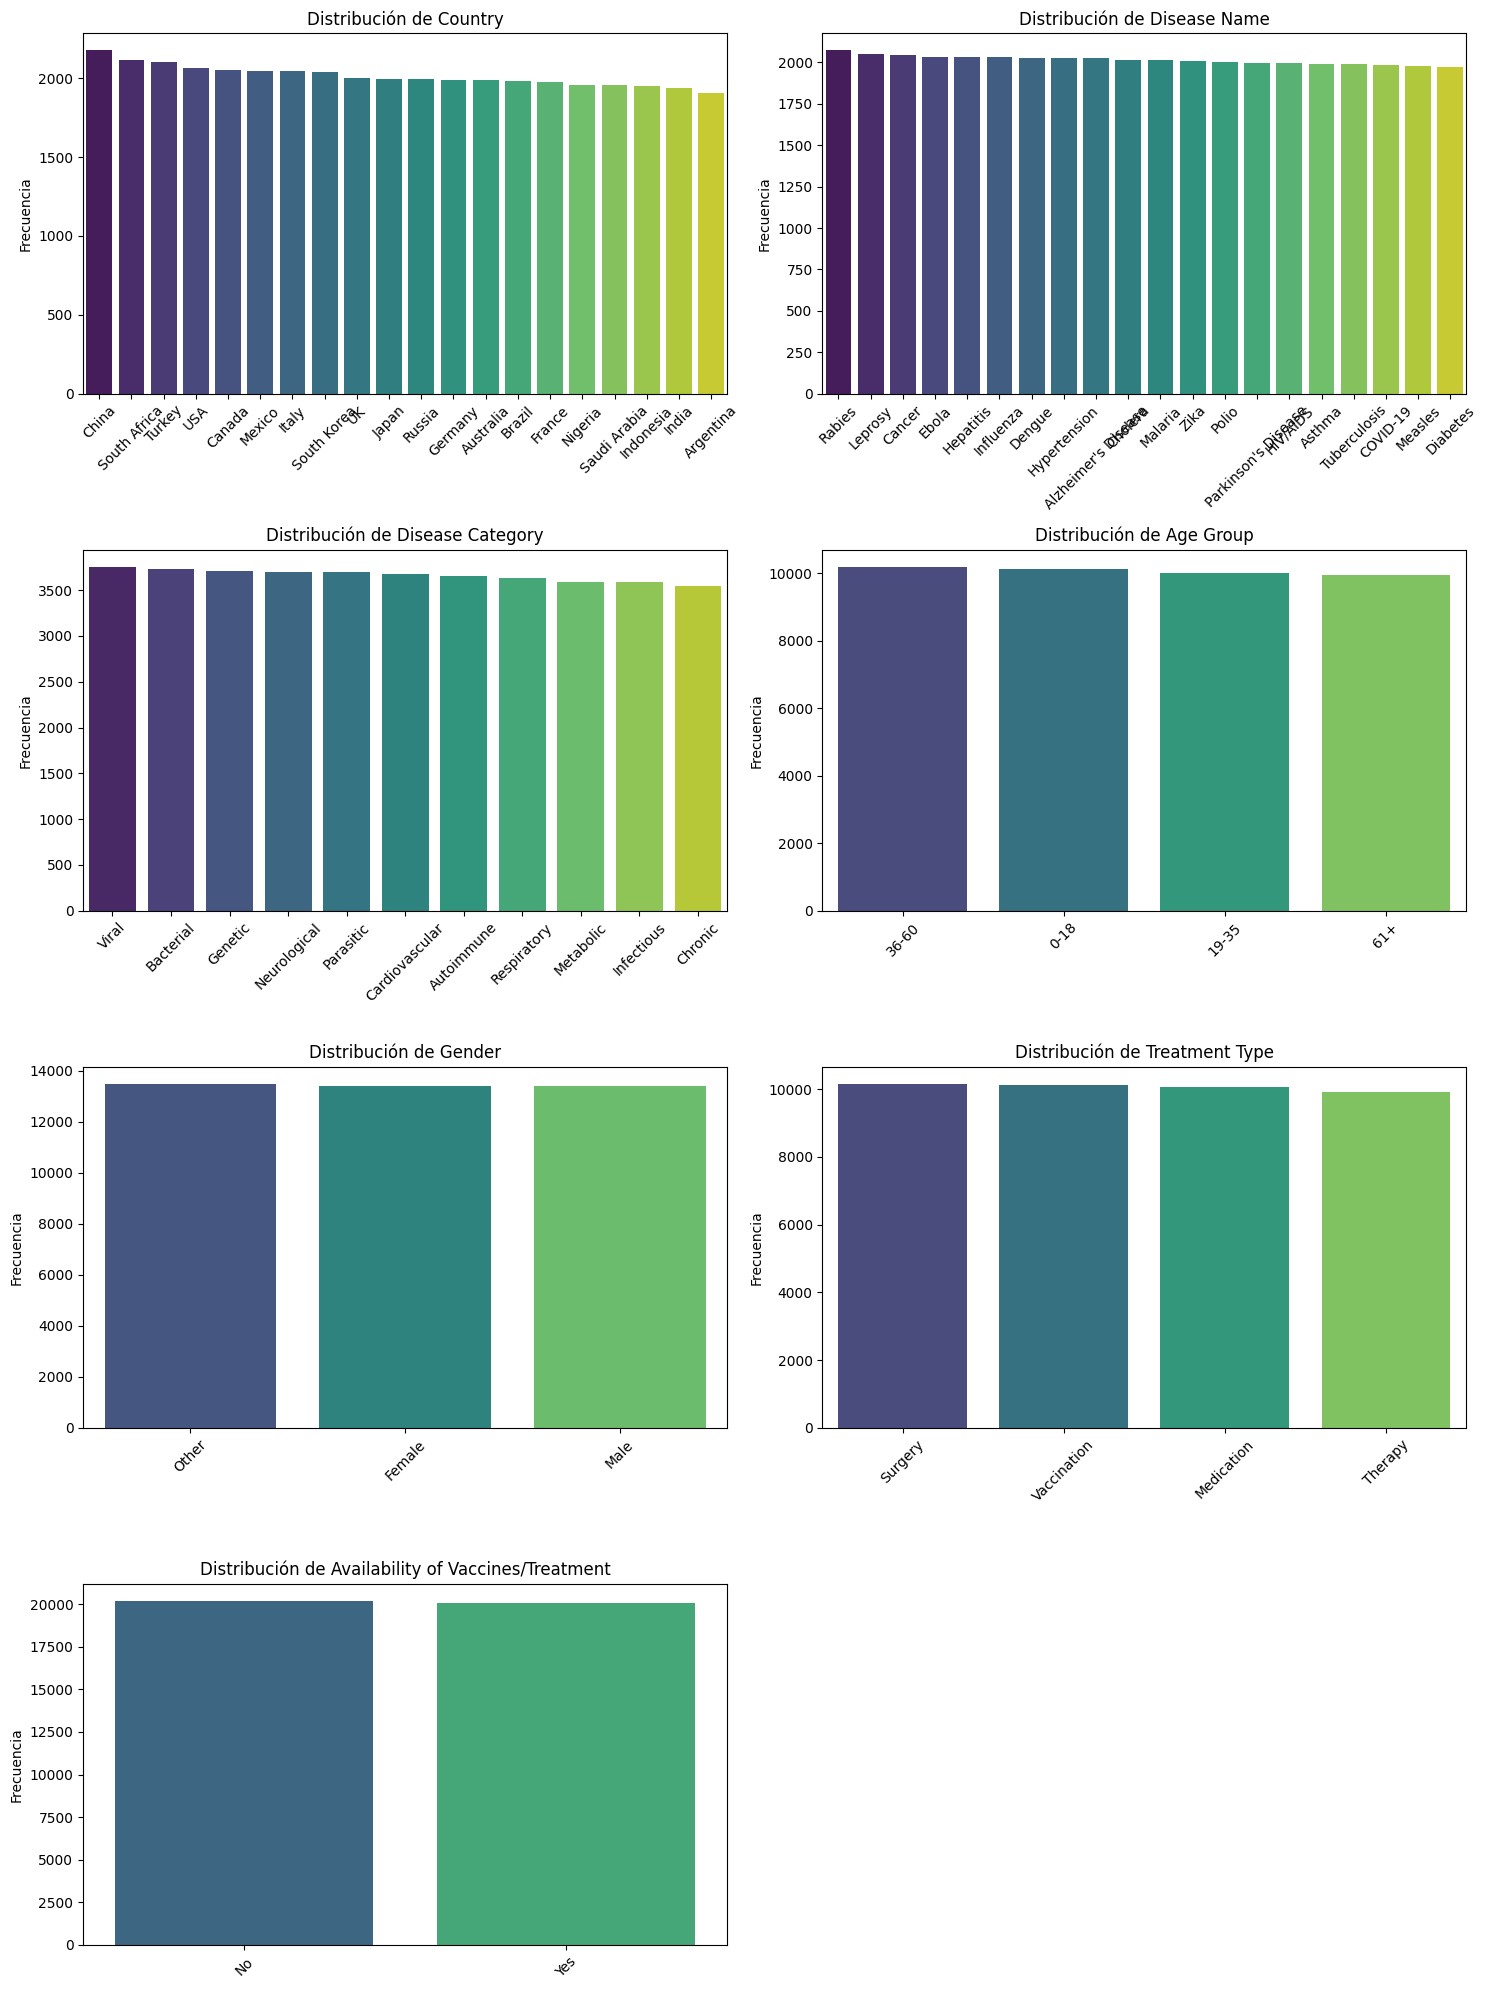

In [23]:
pinta_distribucion_categoricas(df_2023, cols_categoricas_nominales)

*Esto es interesante.. Mientras que al ver en la tendencia central que podía haber cierto sentido a algunas preguntas (y a otras no..), en los diagramas de barras vemos que prácticamente todas las categórias (por no decir todas), tienen los valores muy repartidos entre todas ella*

*Por ejemplo, en el tipo de nombre de la enfermedad, la más frecuente era la rabia, pero vemos que el cáncer es la 3ª de ellas, con valores muy parecidos a la rabia. Y que la disponibilidad de vacunas/tratamientos ya no es un "No" rotundo, sino que está empatado. Hay que seguir investigando..*

#### MEDIDAS DE POSICIÓN

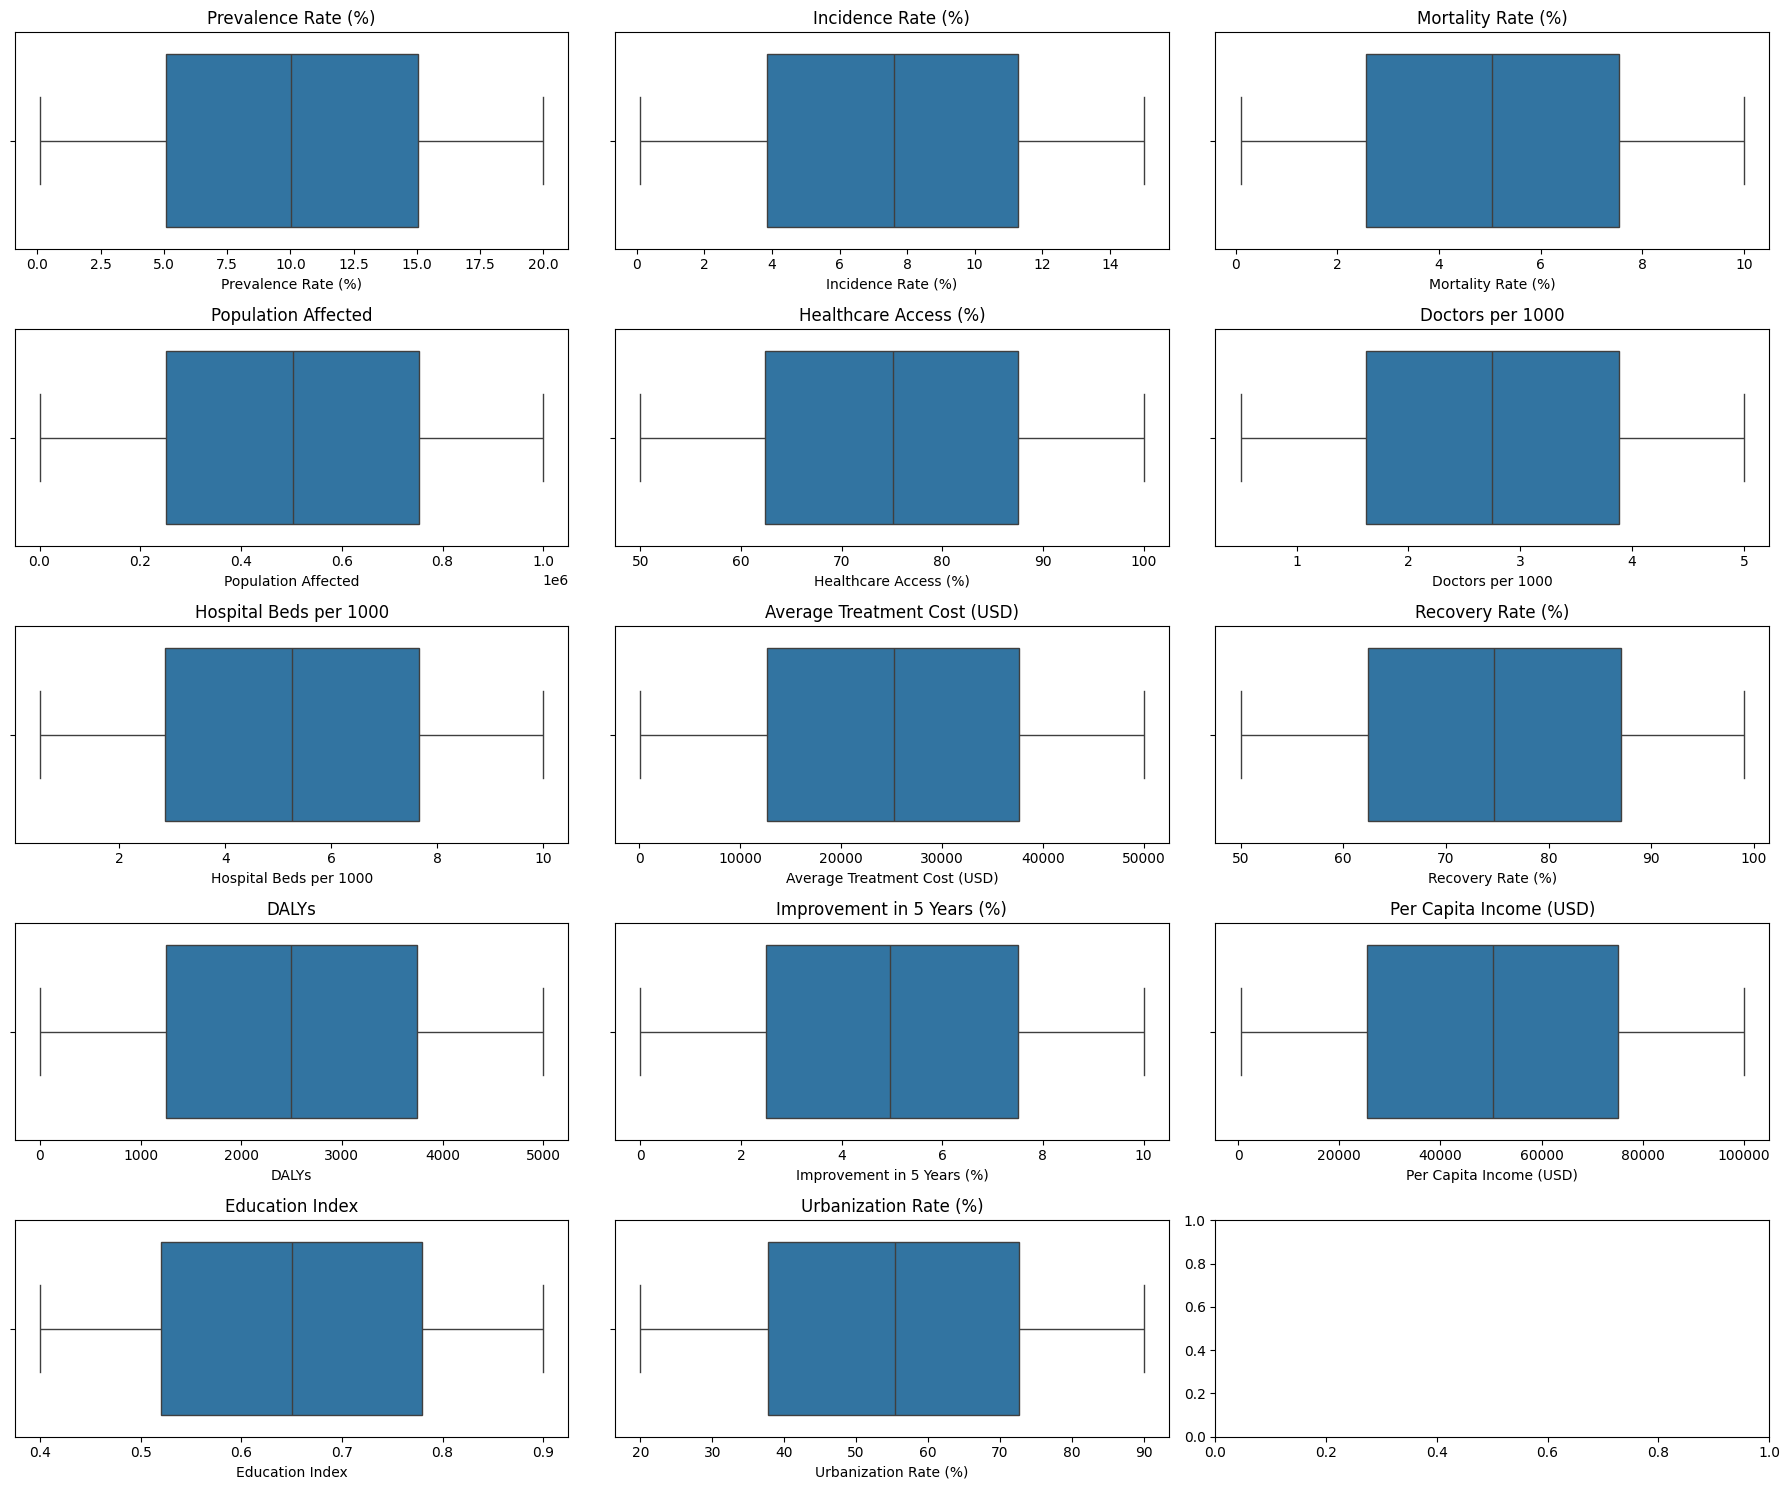

In [24]:
plot_multiple_boxplots(df_2023, cols_numericas)

*No hay outliers en niguna de las variables numéricas* \
*Se aprecia cierta variabilidad en la parte central de todas las variables ya que el IQR es relativamente amplio en todos los boxplot. Además, los bigotes tienen un tamaño moderado, lo que reafirma que hay cierta dispersión. Lo veremos más abajo con el cálculo del IQR (%) para corroborarlo* \
*También se aprecia cierta simetría ya que ambas partes de la caja tienen más o menos el mismo tamaño, ninguna predomina de forma exagerada sobre la otra*

In [25]:
for columna in cols_numericas:
    IQR = df_2023[columna].describe().loc["75%"] - df_2023[columna].describe().loc["25%"]
    rango = df_2023[columna].describe().loc["max"] - df_2023[columna].describe().loc["min"]
    IQR_porcentaje = (IQR/rango) * 100
    print(f"IQR de {columna}: {IQR_porcentaje}")

IQR de Prevalence Rate (%): 50.05025125628142
IQR de Incidence Rate (%): 49.93288590604026
IQR de Mortality Rate (%): 50.2020202020202
IQR de Population Affected: 50.20143429022754
IQR de Healthcare Access (%): 50.34
IQR de Doctors per 1000: 50.222222222222214
IQR de Hospital Beds per 1000: 50.39473684210526
IQR de Average Treatment Cost (USD): 50.05711537305358
IQR de Recovery Rate (%): 50.14285714285713
IQR de DALYs: 49.9499899979996
IQR de Improvement in 5 Years (%): 50.1
IQR de Per Capita Income (USD): 49.97763774146214
IQR de Education Index: 52.0
IQR de Urbanization Rate (%): 49.98571428571429


*Corroboramos lo comentado más arriba, el IQR (%) es de alrededor del 50%, por lo que hay cierta dispersión en la parte central de los datos y hay que tener cuidado con las medidas de tendencia central*

#### DISTRIBUCIÓN

*Vamos a sacar los histogramas y las funciones de densidad de probabilidad*

In [26]:
# Vamos a utilizar la función de abajo para obtener el histograma y la función de densidad de probabilidad

def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

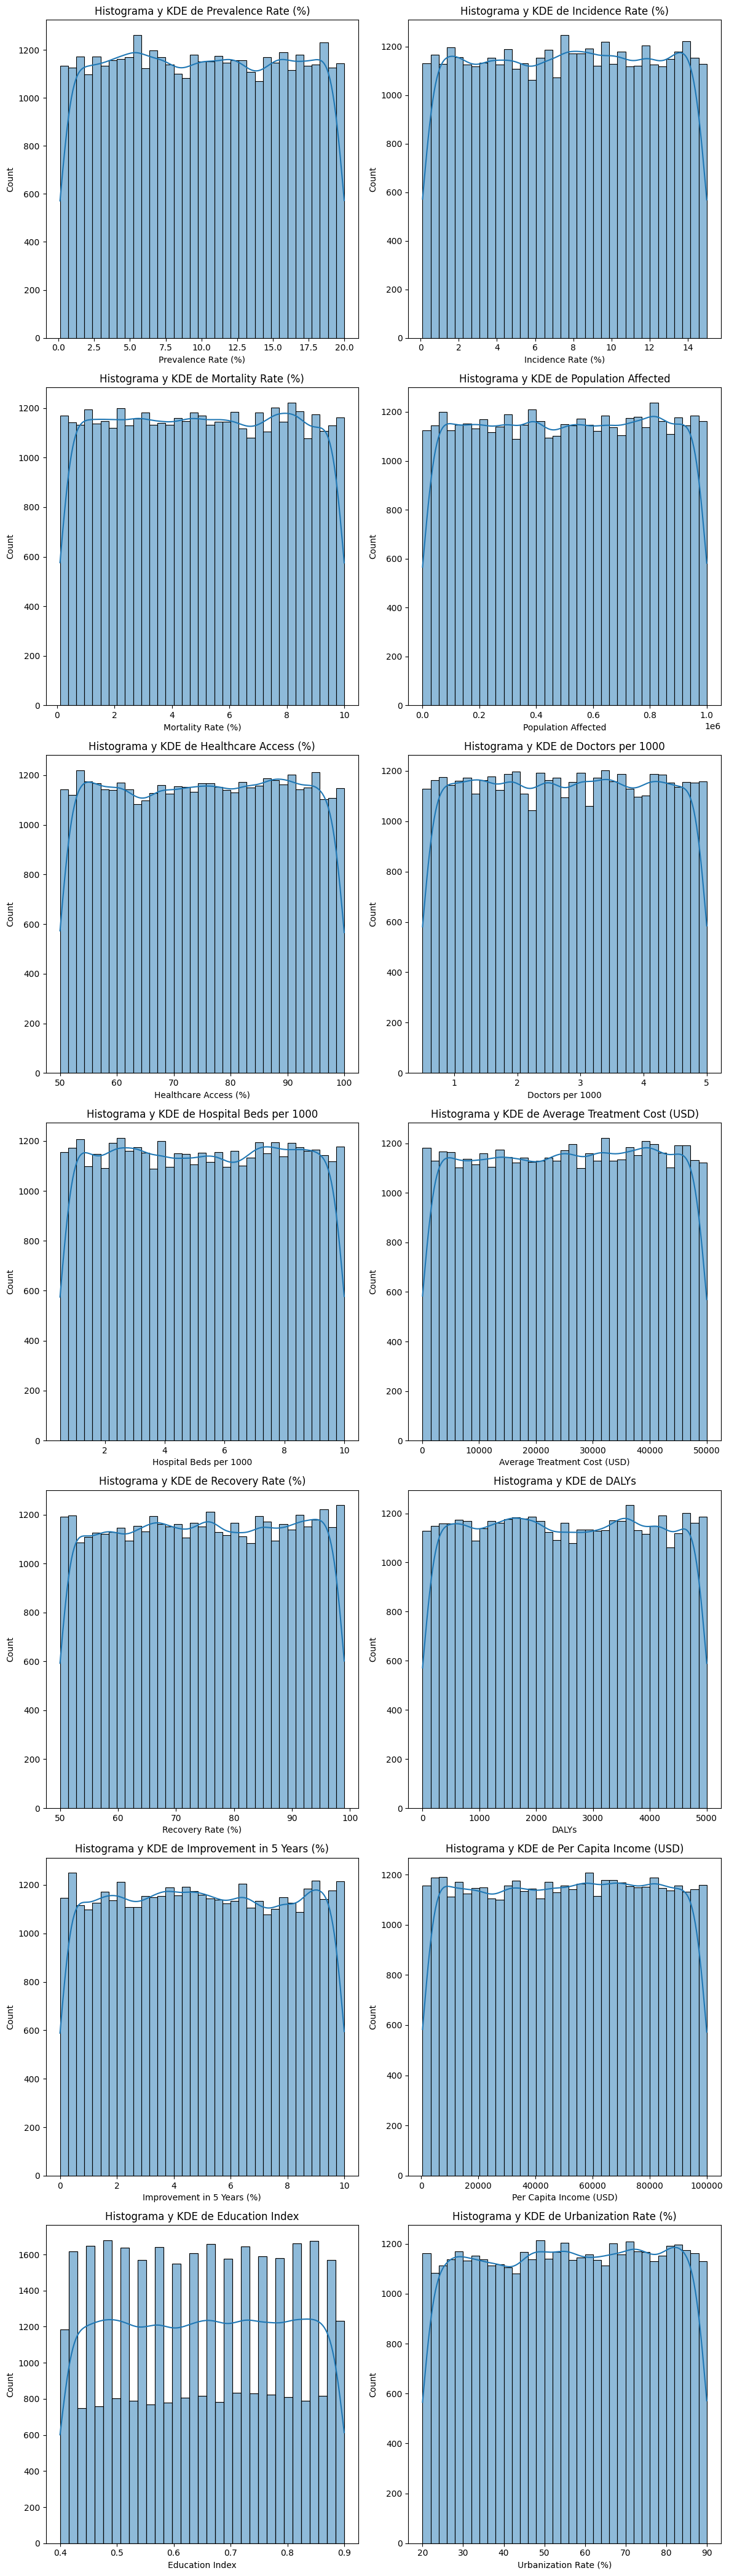

In [27]:
plot_histo_den(df_2023, cols_numericas)

*Interesante.. todas las variables numéricas tienen una distribución bastante uniforme*

REVISAR

### ANÁLISIS BIVARIANTE

#### CATEGÓRICAS

De momento lo dejamos en stand-by

In [28]:
# Función para hacer análisis bivariante de categóricas

def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 10):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(20, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

In [29]:
# plot_categorical_relationship_fin(df_2023, "Country", "Disease Name", relative_freq = True, show_values = True)

In [30]:
# len(cols_categoricas_nominales)

In [31]:
# plot_categorical_relationship_fin(df_2023, "Country","Availability of Vaccines/Treatment", show_values= True)

In [32]:
# cols_categoricas_nominales[2]

In [33]:
# cols_categoricas_nominales = ["Country","Disease Name", "Disease Category", "Age Group", "Gender", "Treatment Type", "Availability of Vaccines/Treatment"]

In [34]:
# for columna in cols_categoricas_nominales:
#     for i in range(len(cols_categoricas_nominales)):
#         if columna != cols_categoricas_nominales[i]:
#             plot_categorical_relationship_fin(df_2023, columna, cols_categoricas_nominales[i], relative_freq = True, show_values = True)

In [35]:
# cols_categoricas_nominales_directoras = ["Country","Disease Name", "Disease Category", "Age Group", "Gender", "Treatment Type", "Availability of Vaccines/Treatment"]
# cols_categoricas_nominales_resto = ["Treatment Type"]

In [36]:
# tabla_contingencia = pd.crosstab(df_2023['Country'], df_2023['Availability of Vaccines/Treatment'])

# tabla_contingencia

In [37]:
# chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# print("Valor Chi-Cuadrado:", chi2)
# print("P-Value:", p)
# print("Grados de Libertad:", dof)
# print("Tabla de Frecuencias Esperadas:\n", expected)

In [38]:
# df_2023.groupby("Country", as_index = False)["Availability of Vaccines/Treatment"].value_counts(normalize = True)

### ANÁLISIS MULTIVARIANTE

#### CATEGÓRICAS

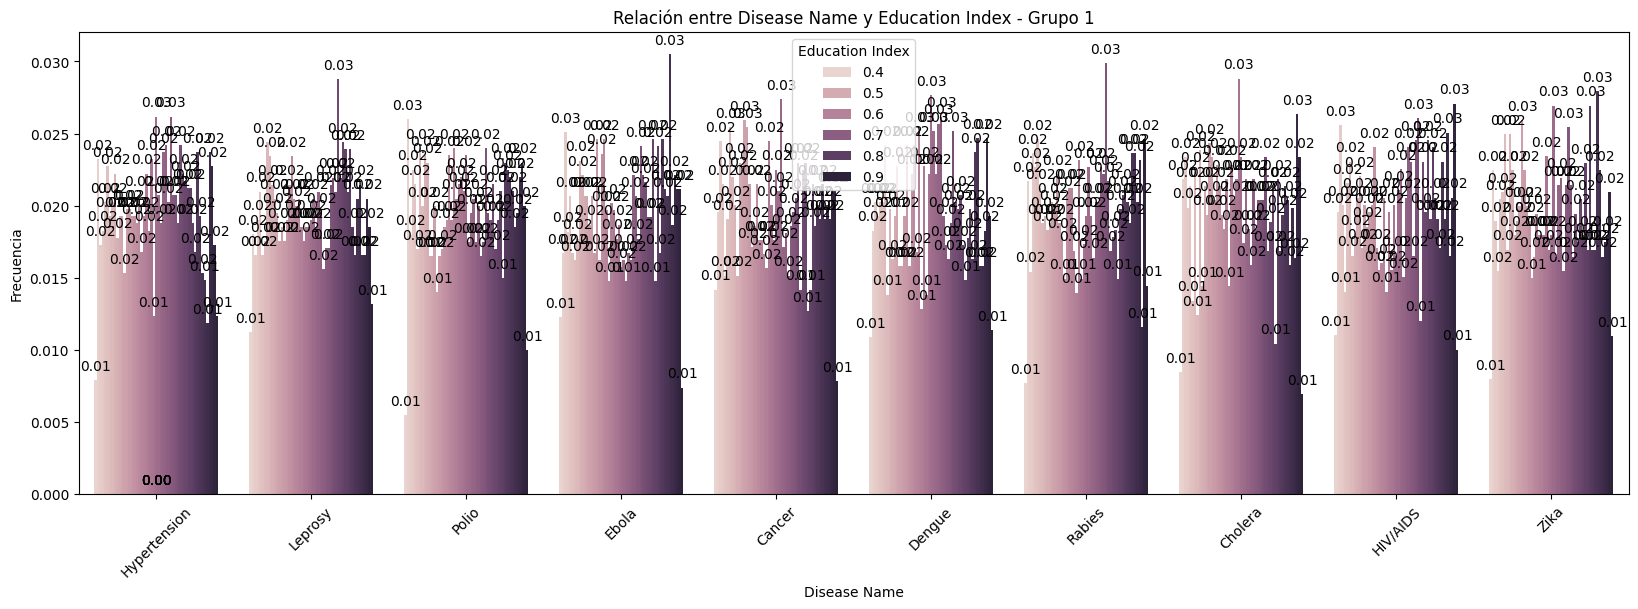

In [39]:
plot_categorical_relationship_fin(df_2023,"Disease Name","Education Index", relative_freq= True, show_values= True)

In [40]:
columnas = ["Disease Name", "Age Group", "Country"] 
col_directora = "Disease Name"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_2023[col_directora].unique():
    diccionario_multivariante[valor] = df_2023.loc[df_2023[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta Hypertension:


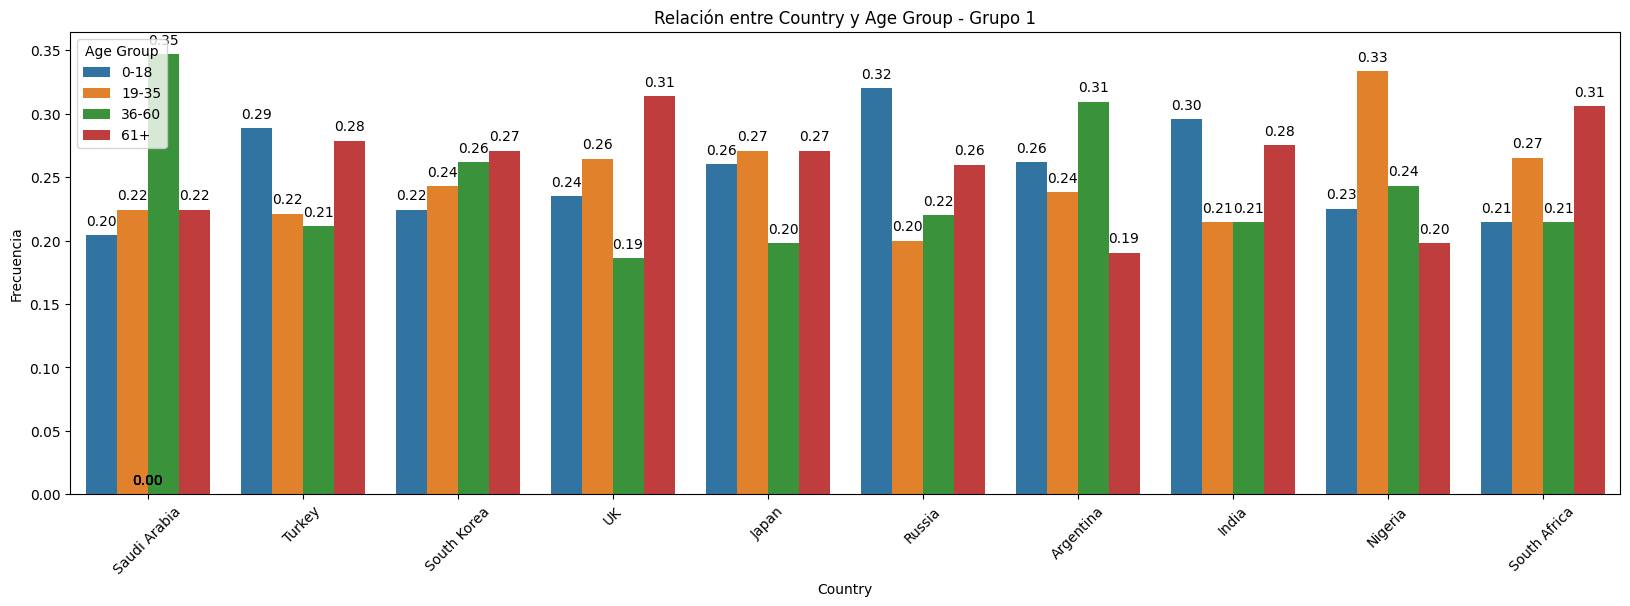

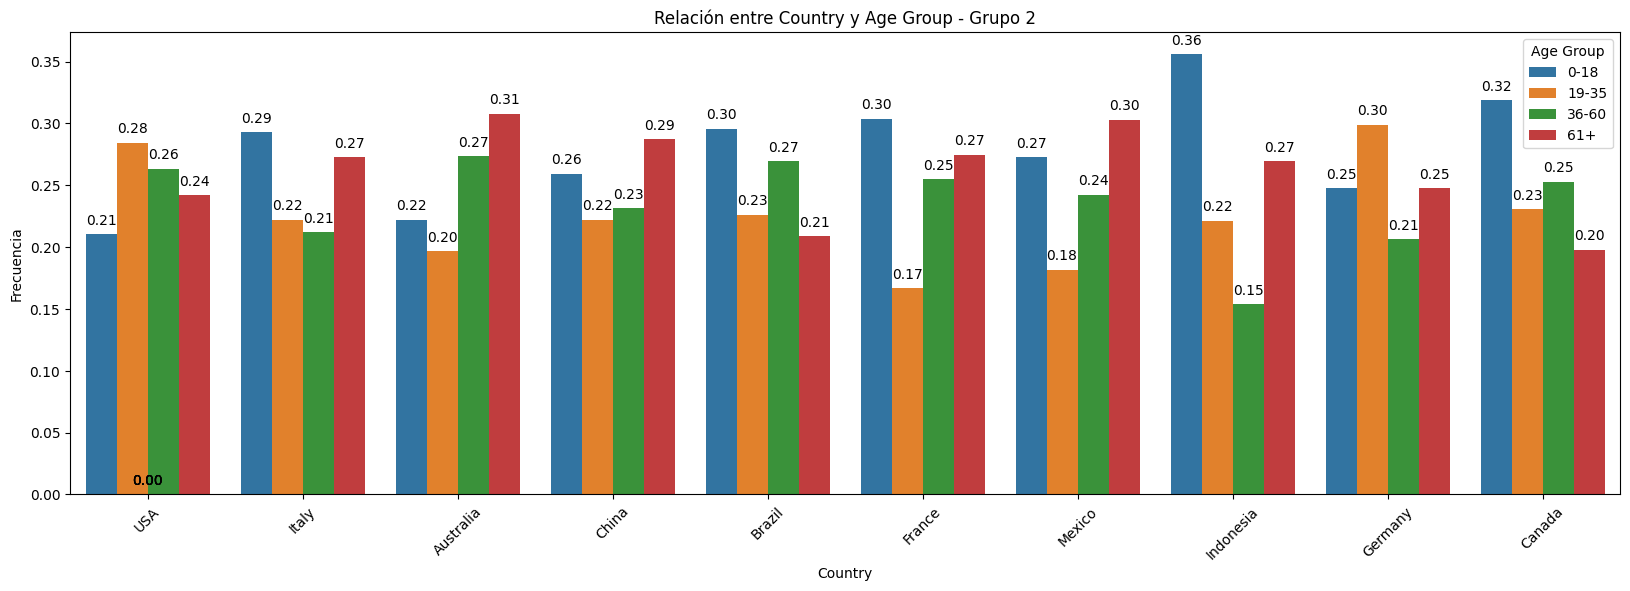

Respuesta Leprosy:


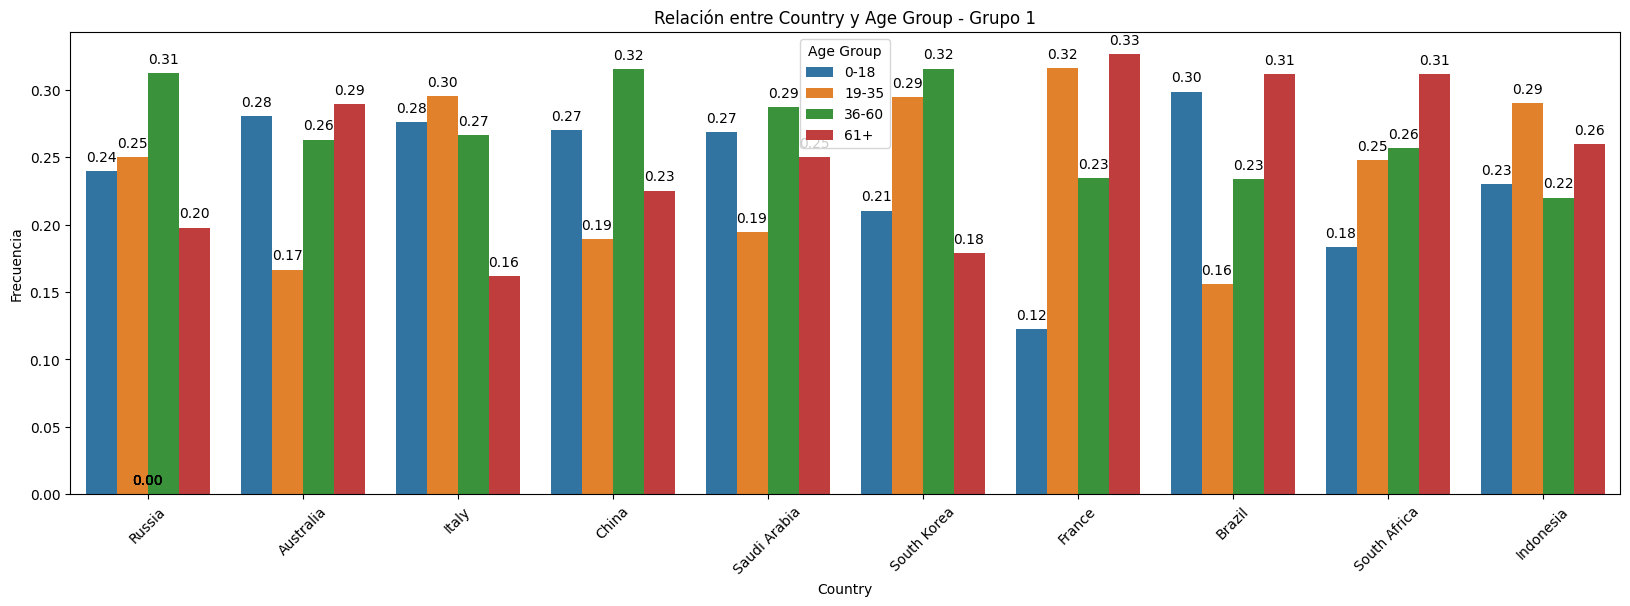

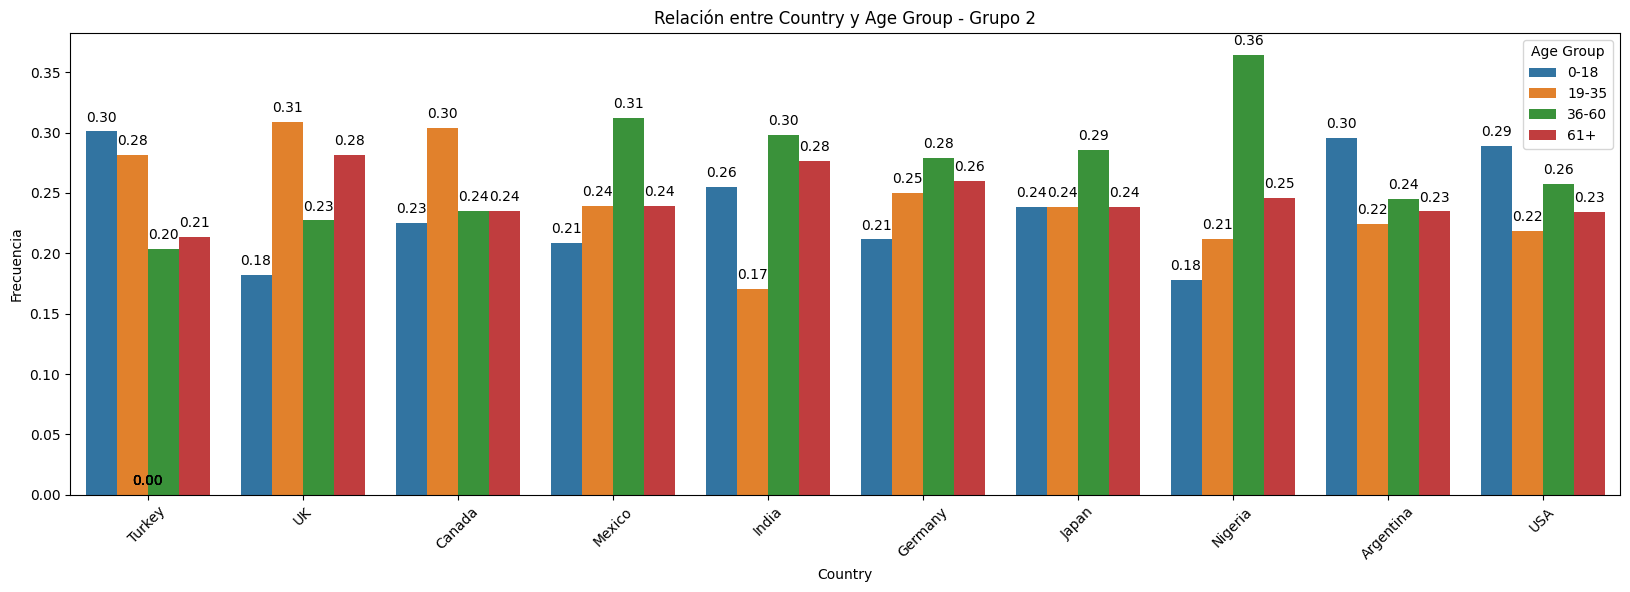

Respuesta Polio:


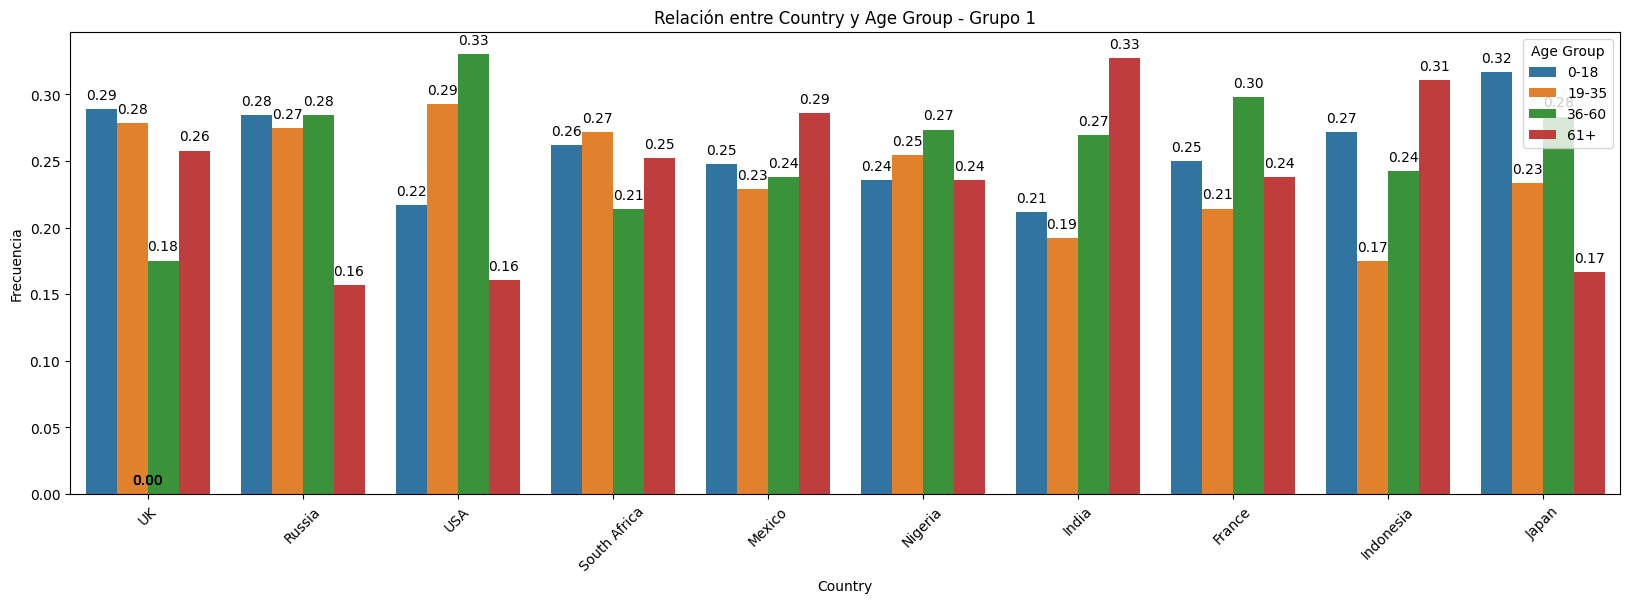

Respuesta Ebola:


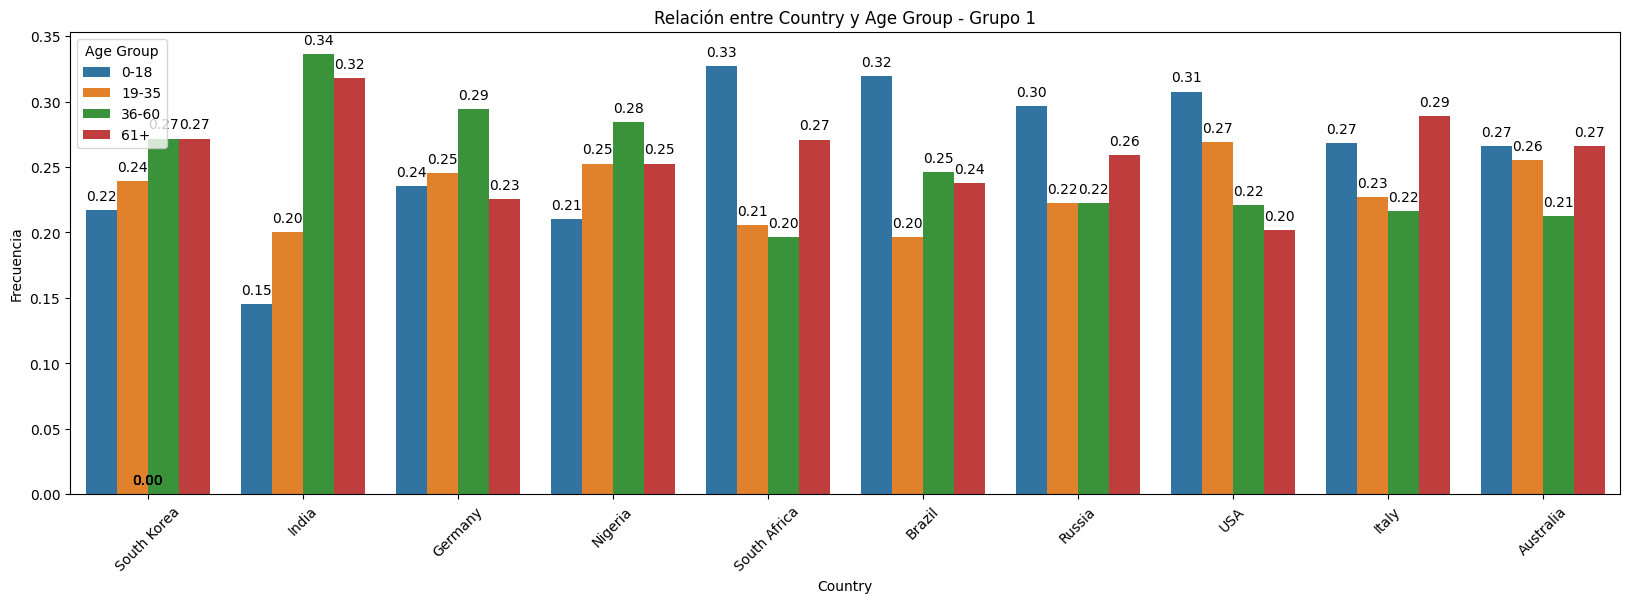

Respuesta Cancer:


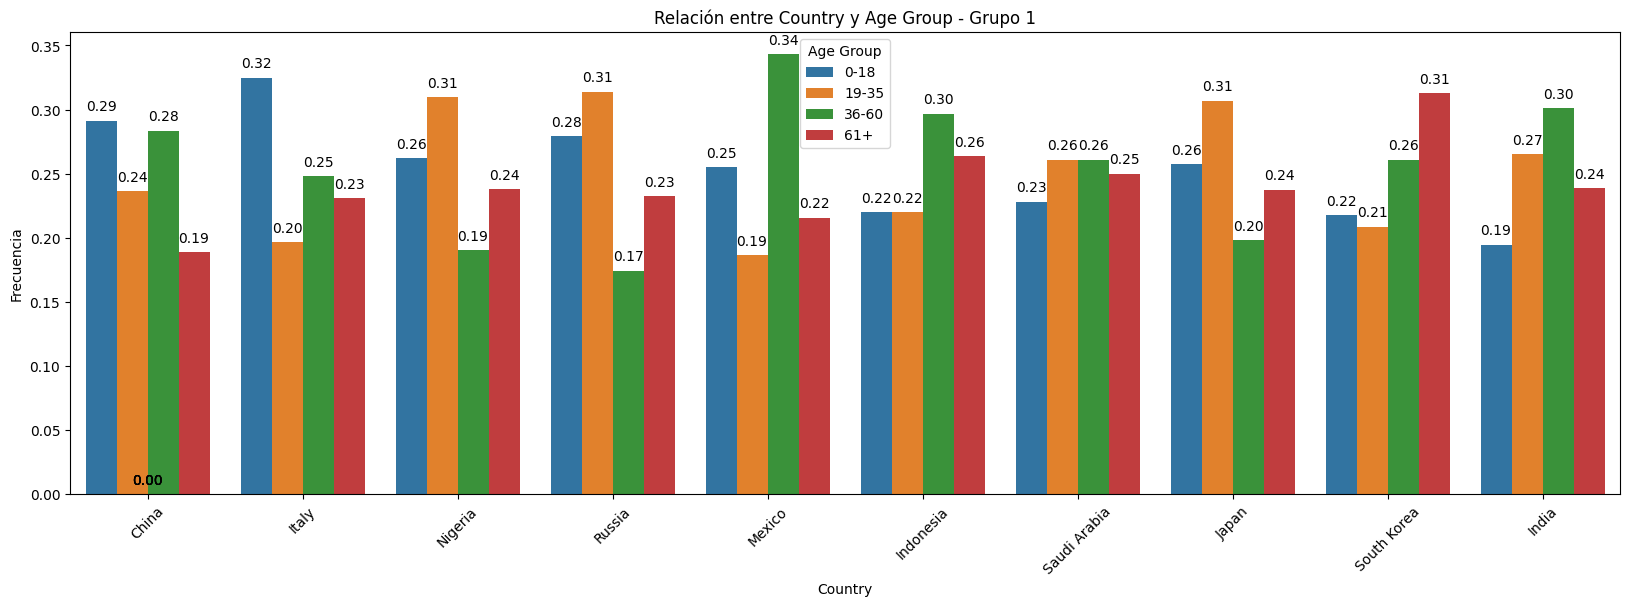

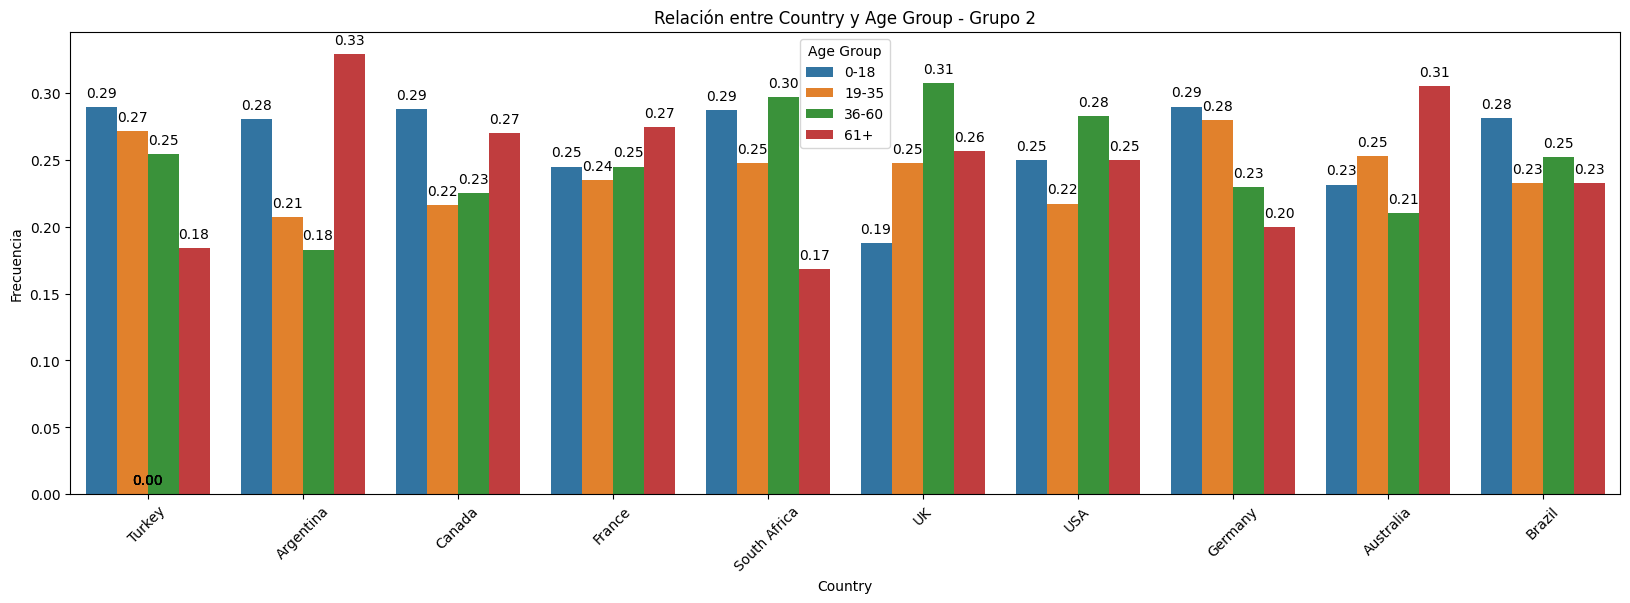

Respuesta Dengue:


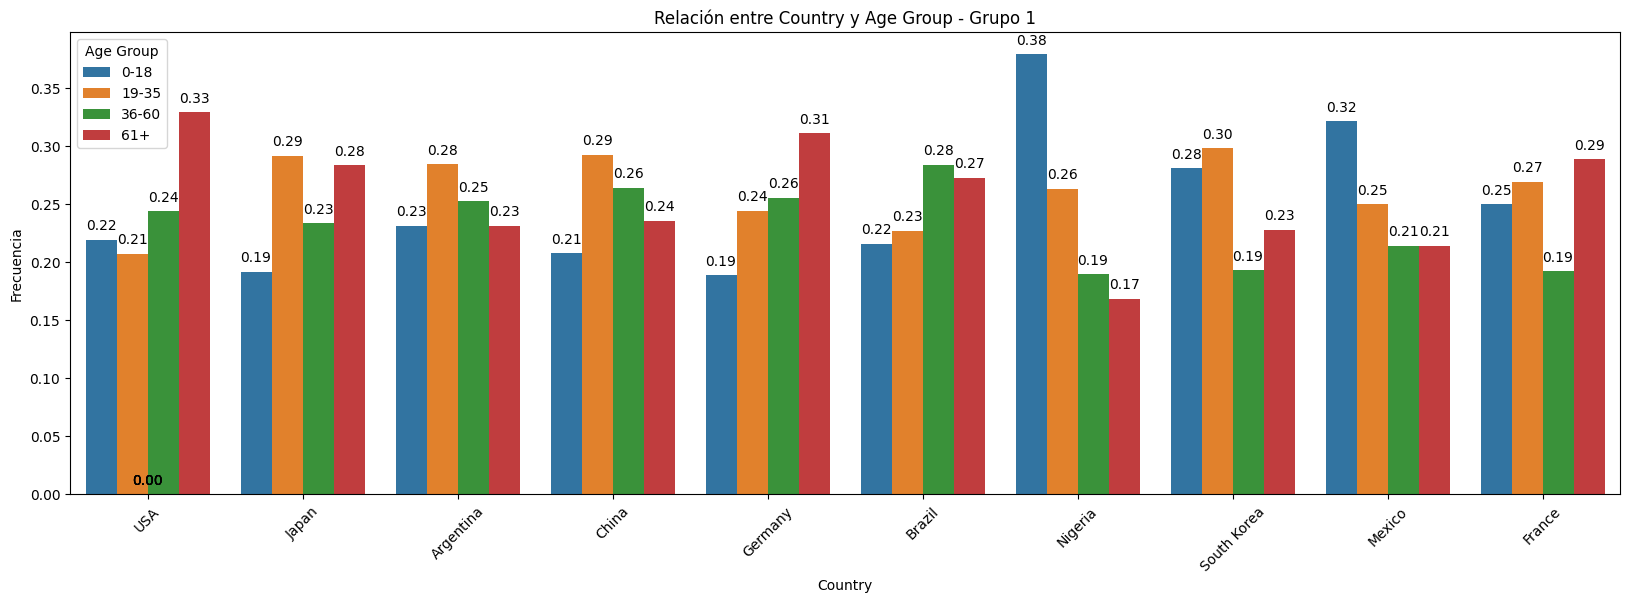

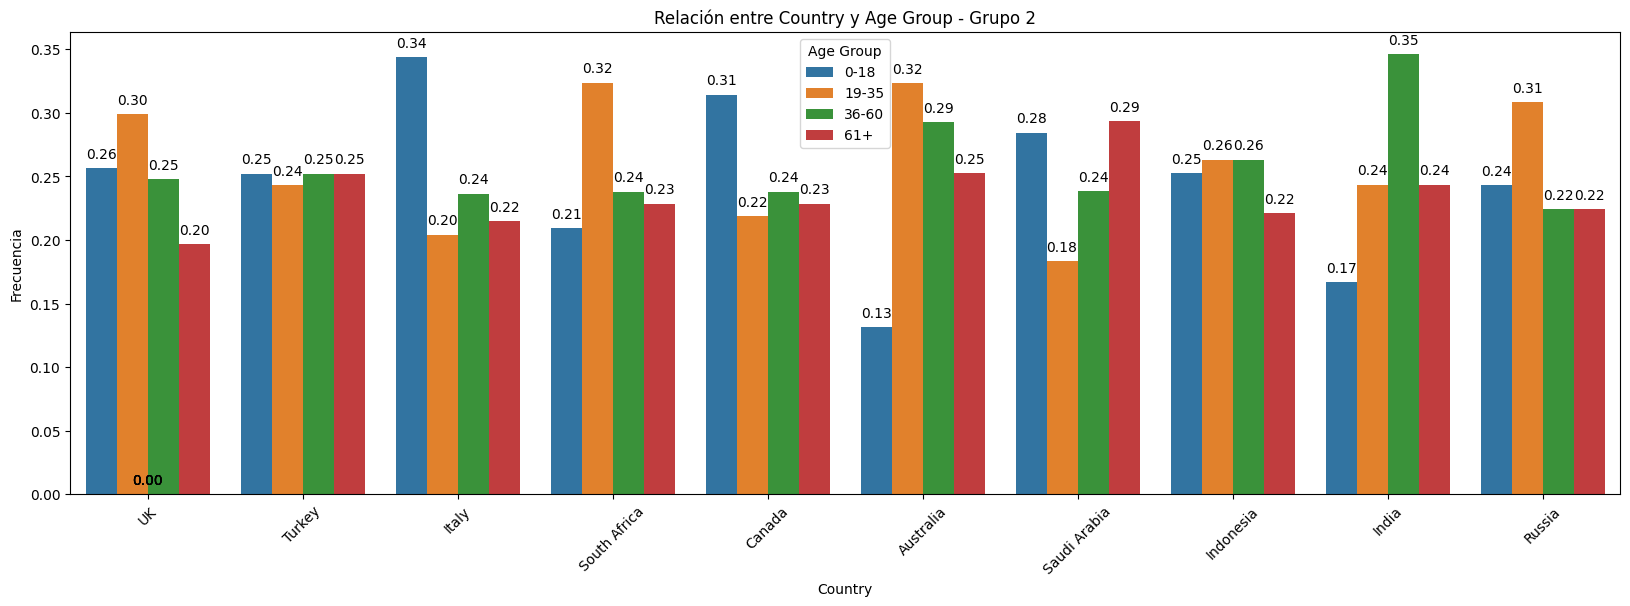

Respuesta Rabies:


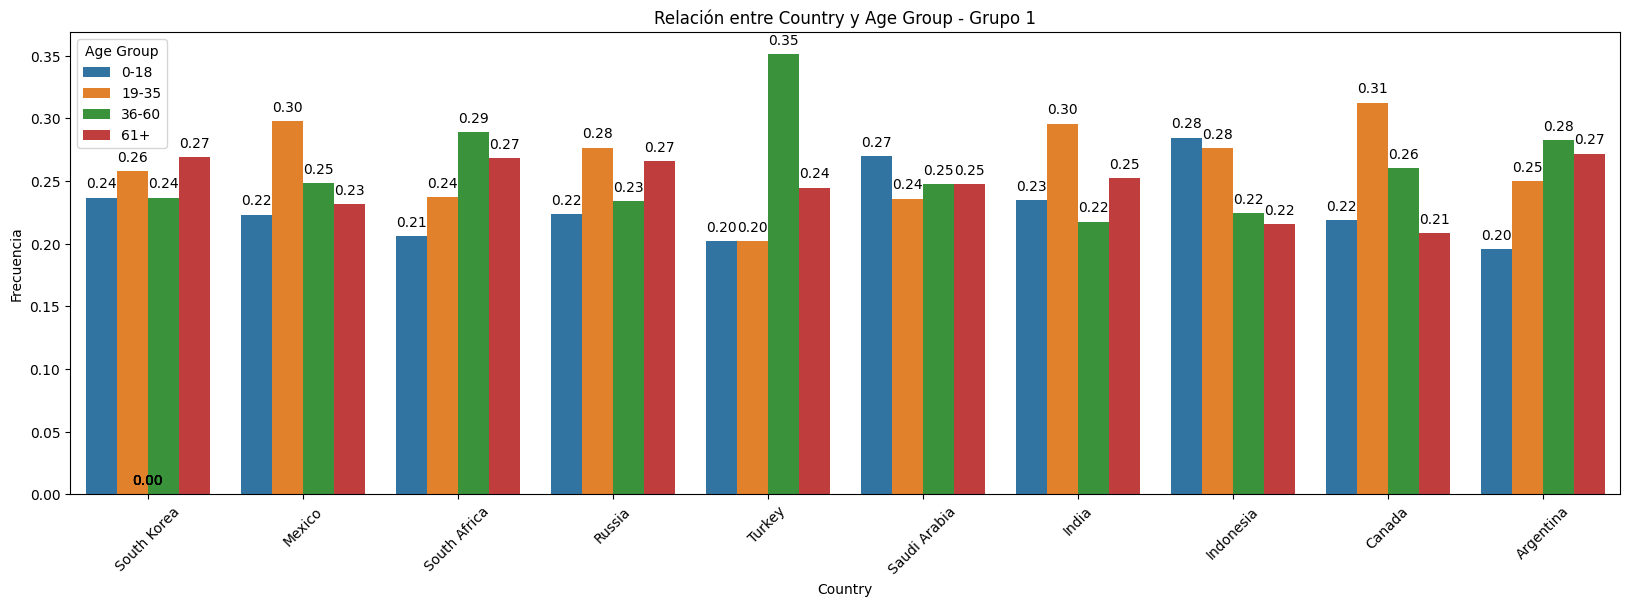

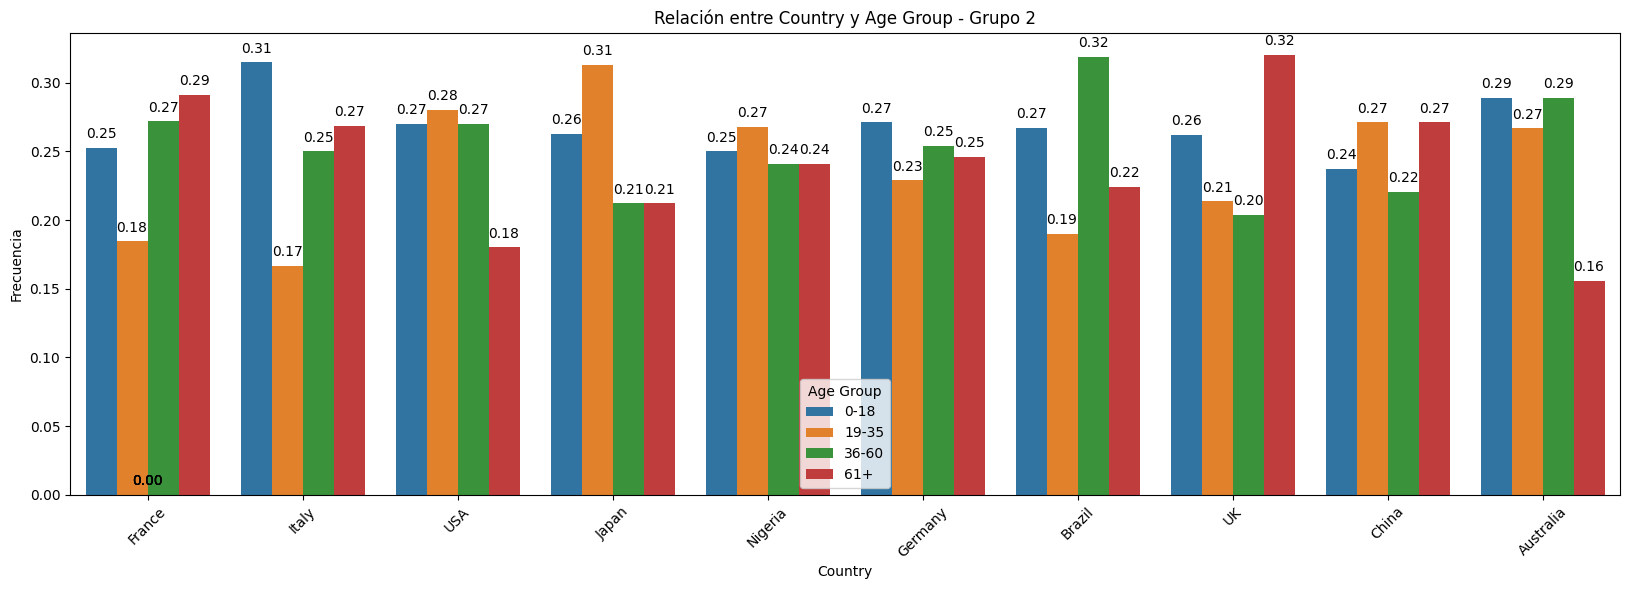

Respuesta Cholera:


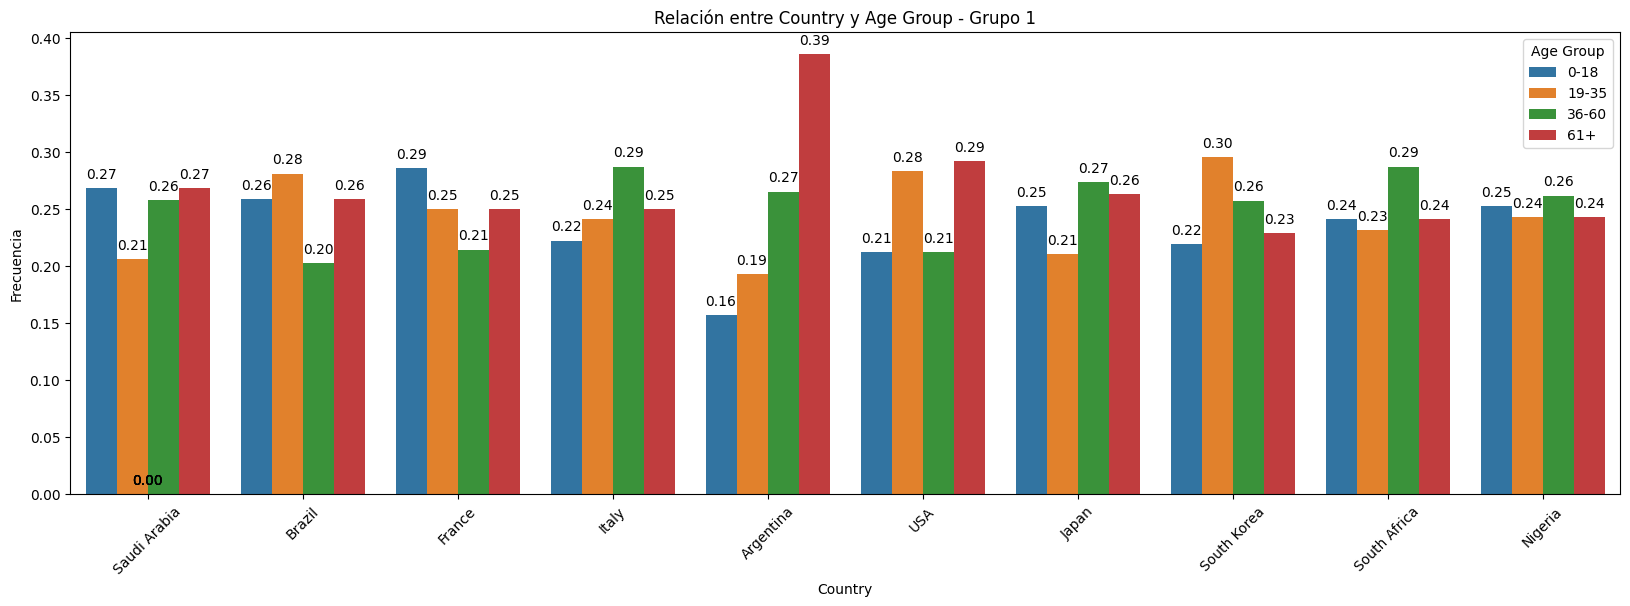

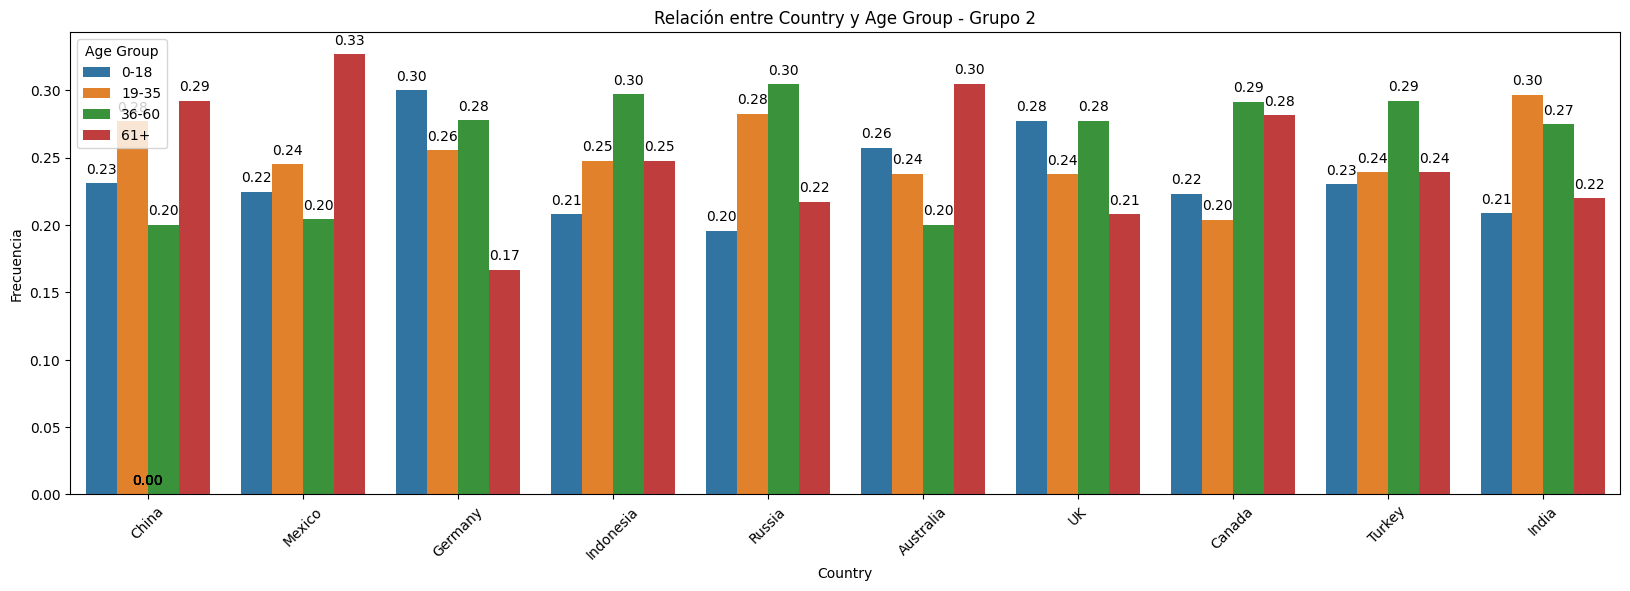

Respuesta HIV/AIDS:


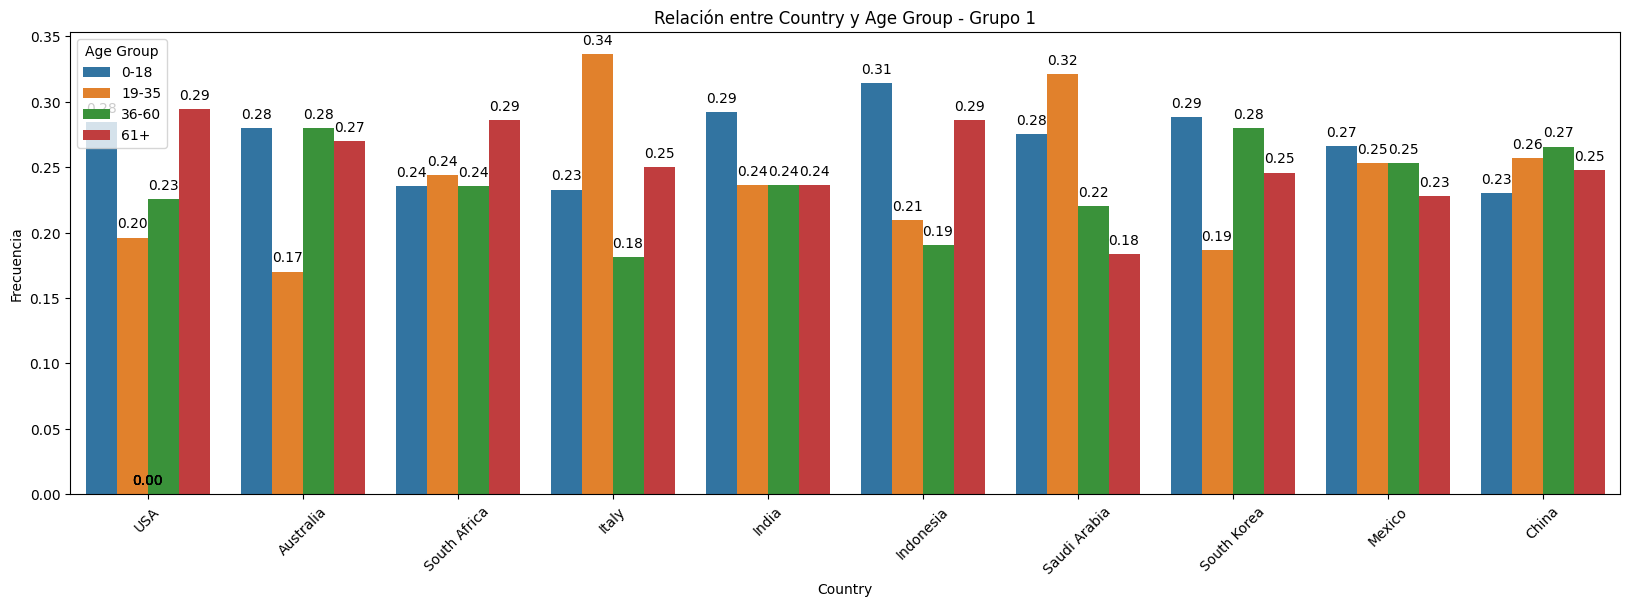

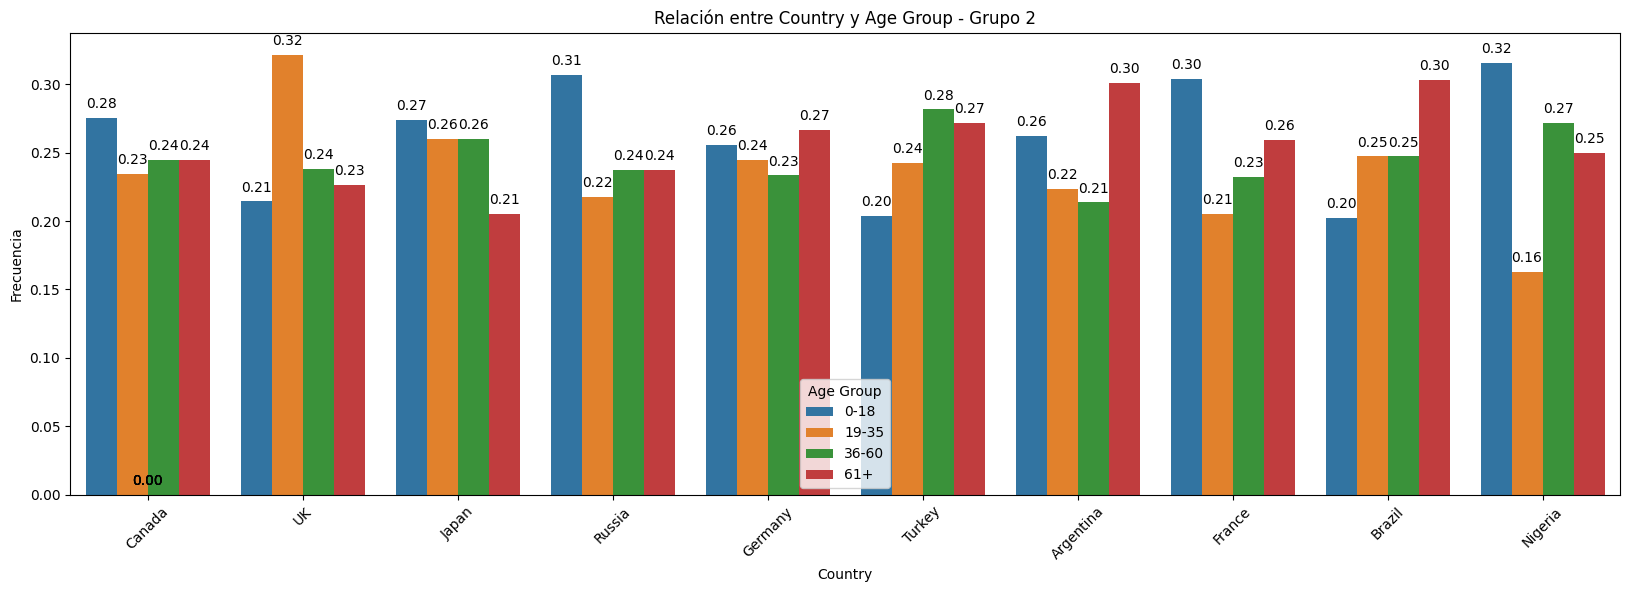

Respuesta Zika:


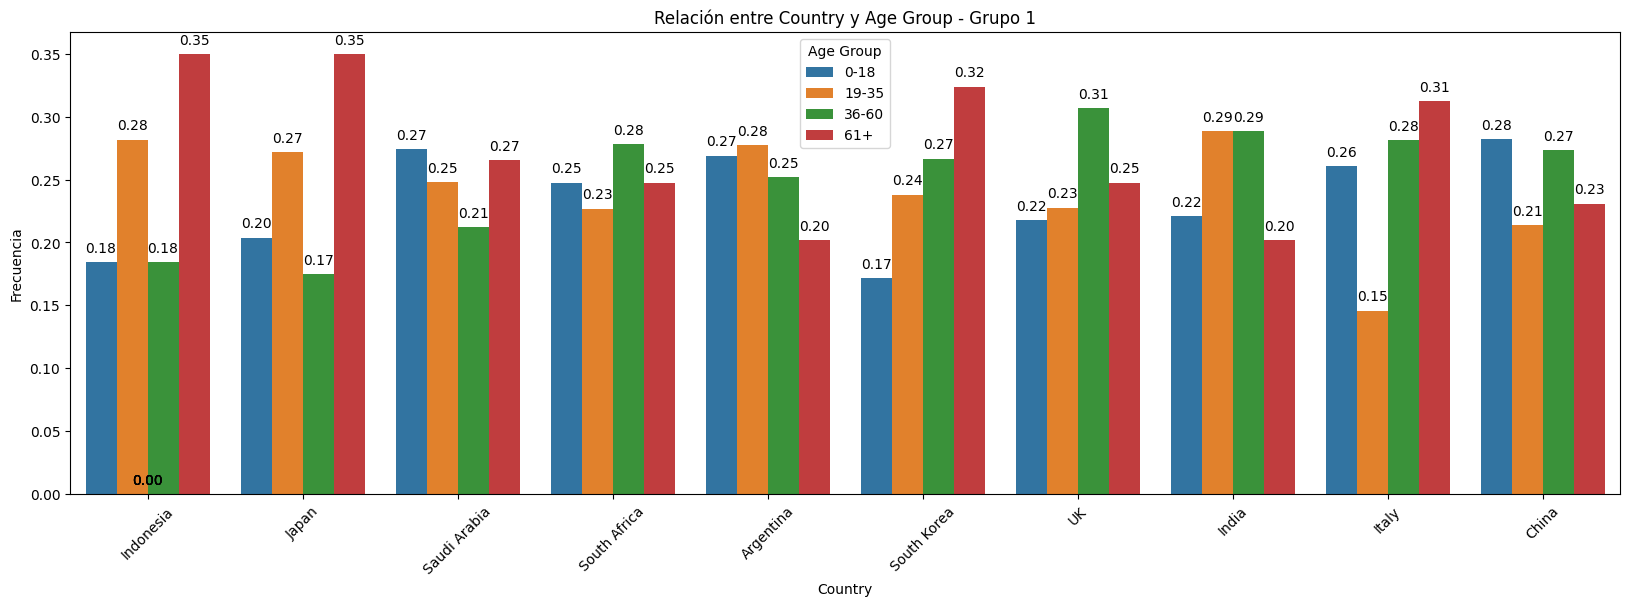

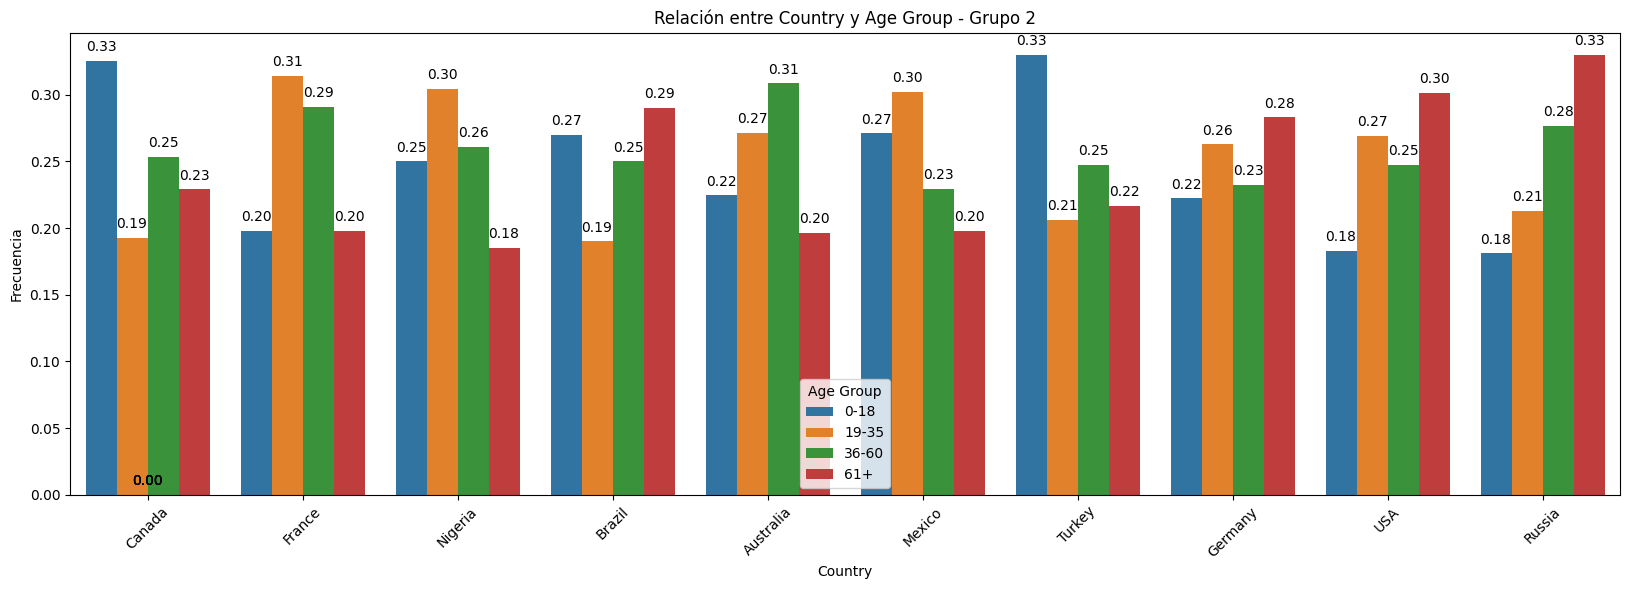

Respuesta Diabetes:


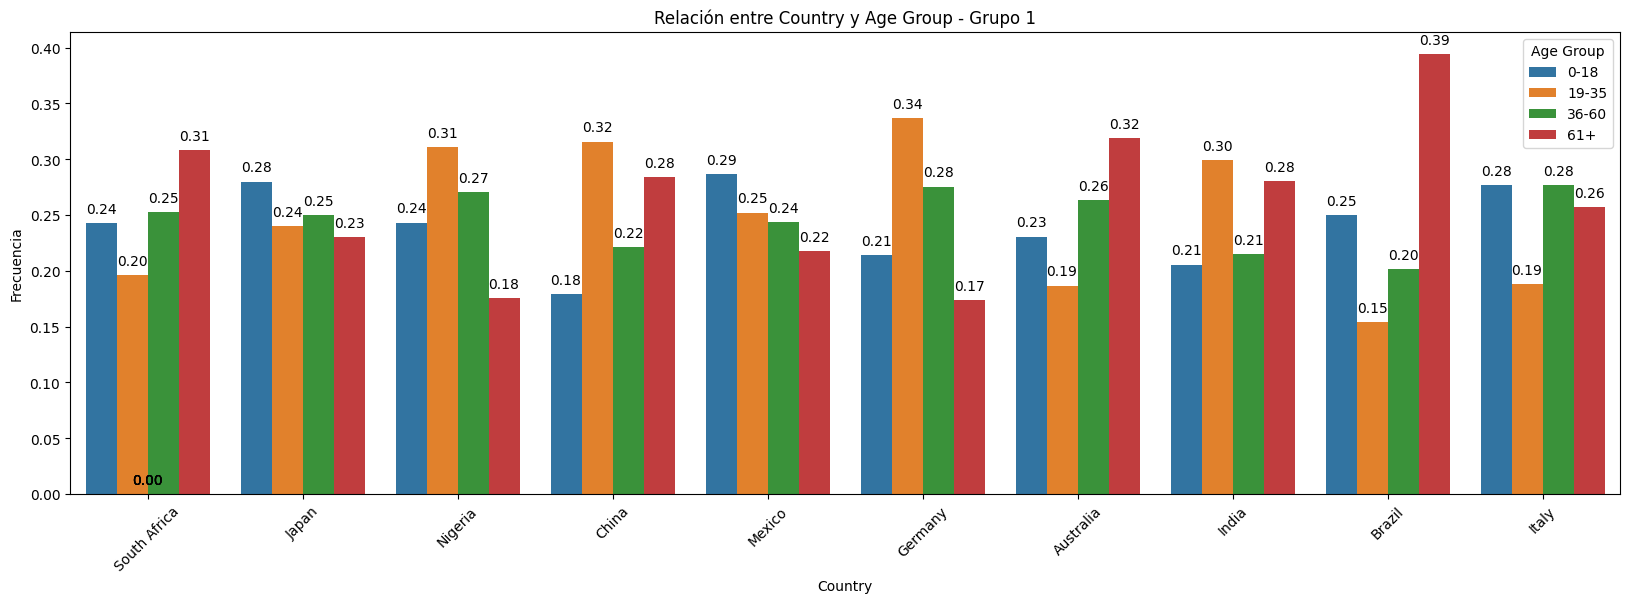

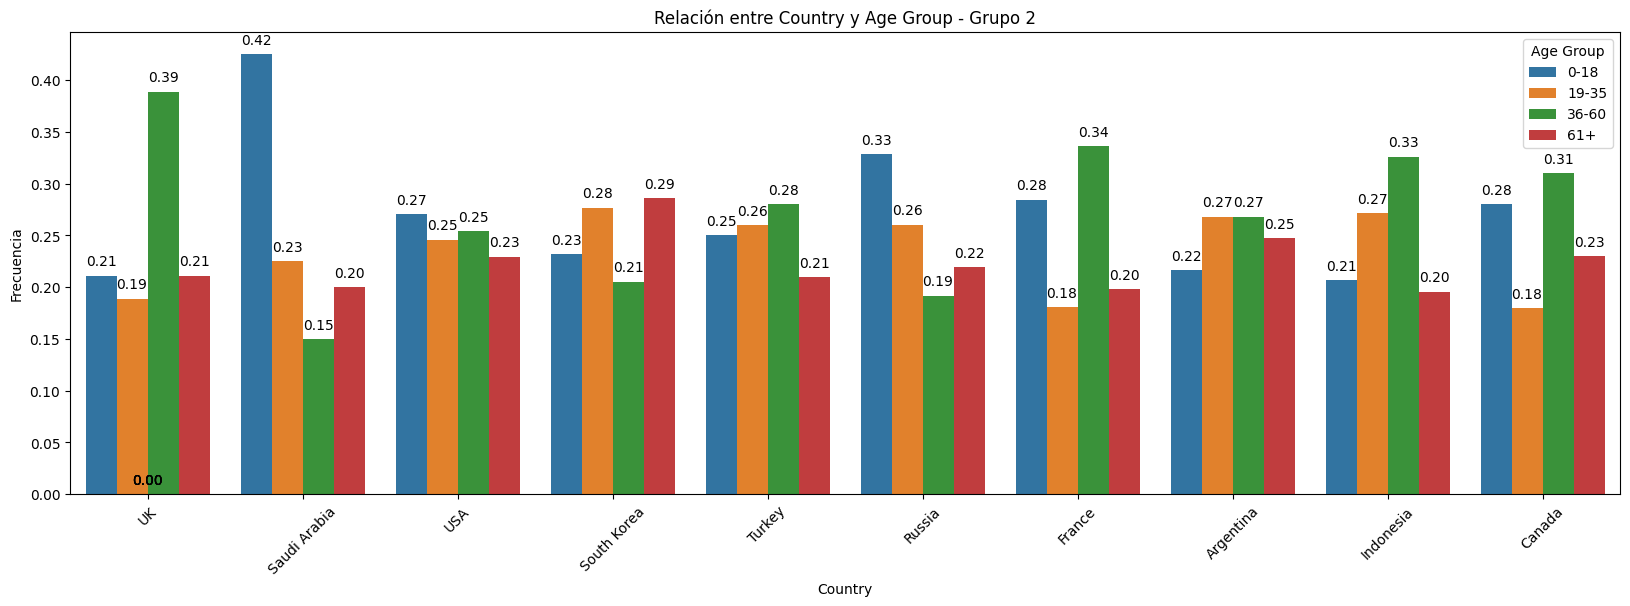

Respuesta Measles:


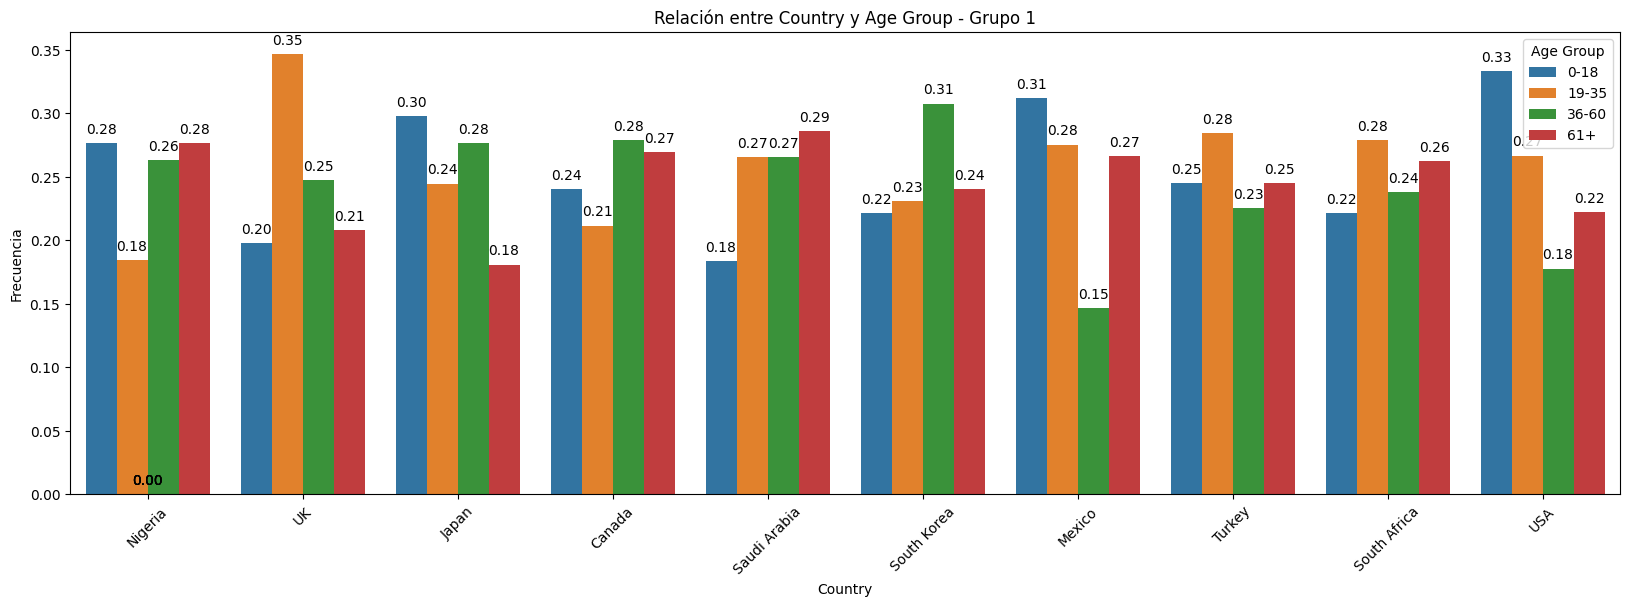

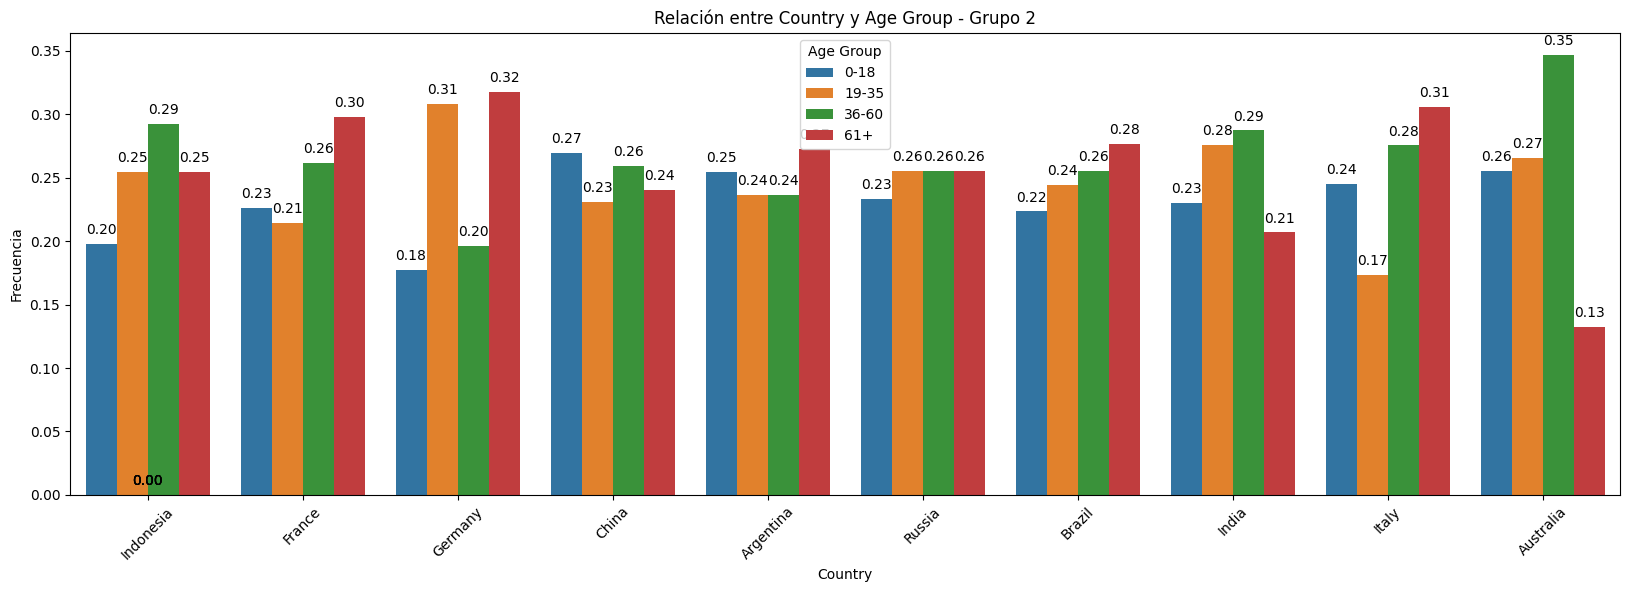

Respuesta Malaria:


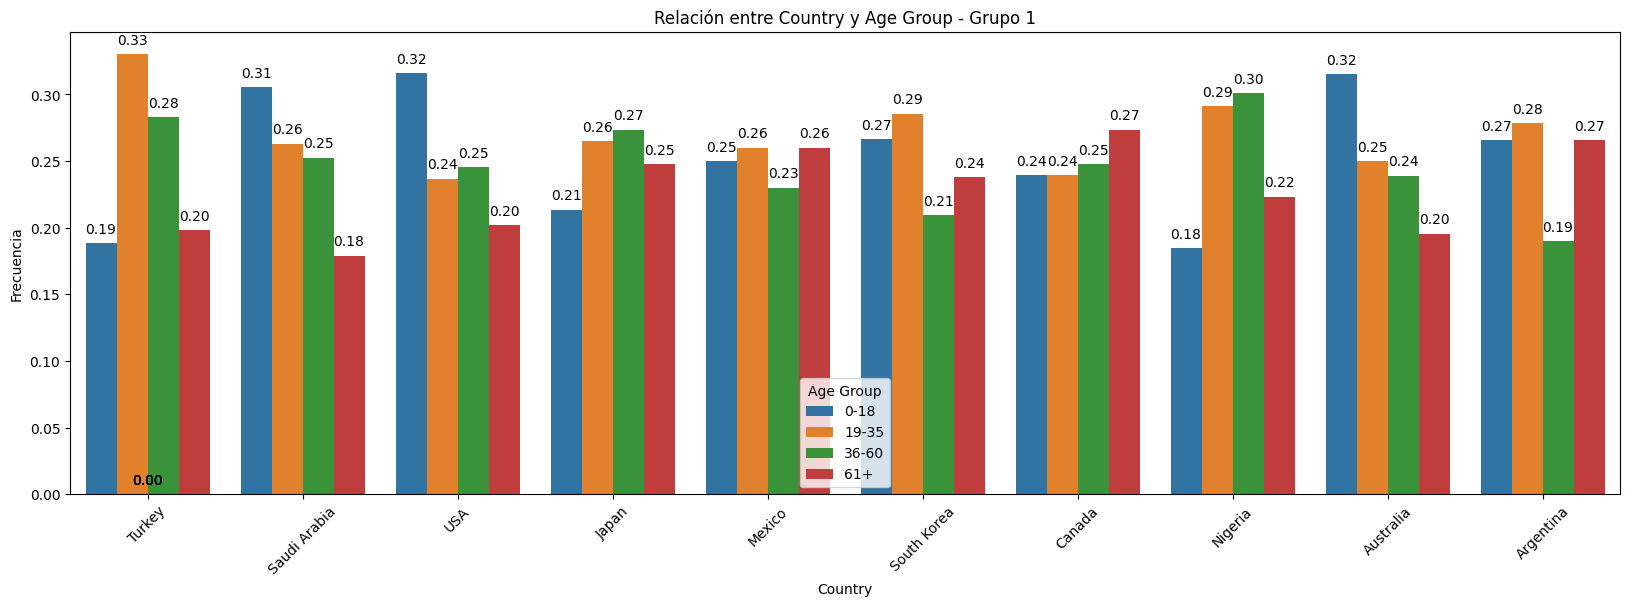

Respuesta Asthma:


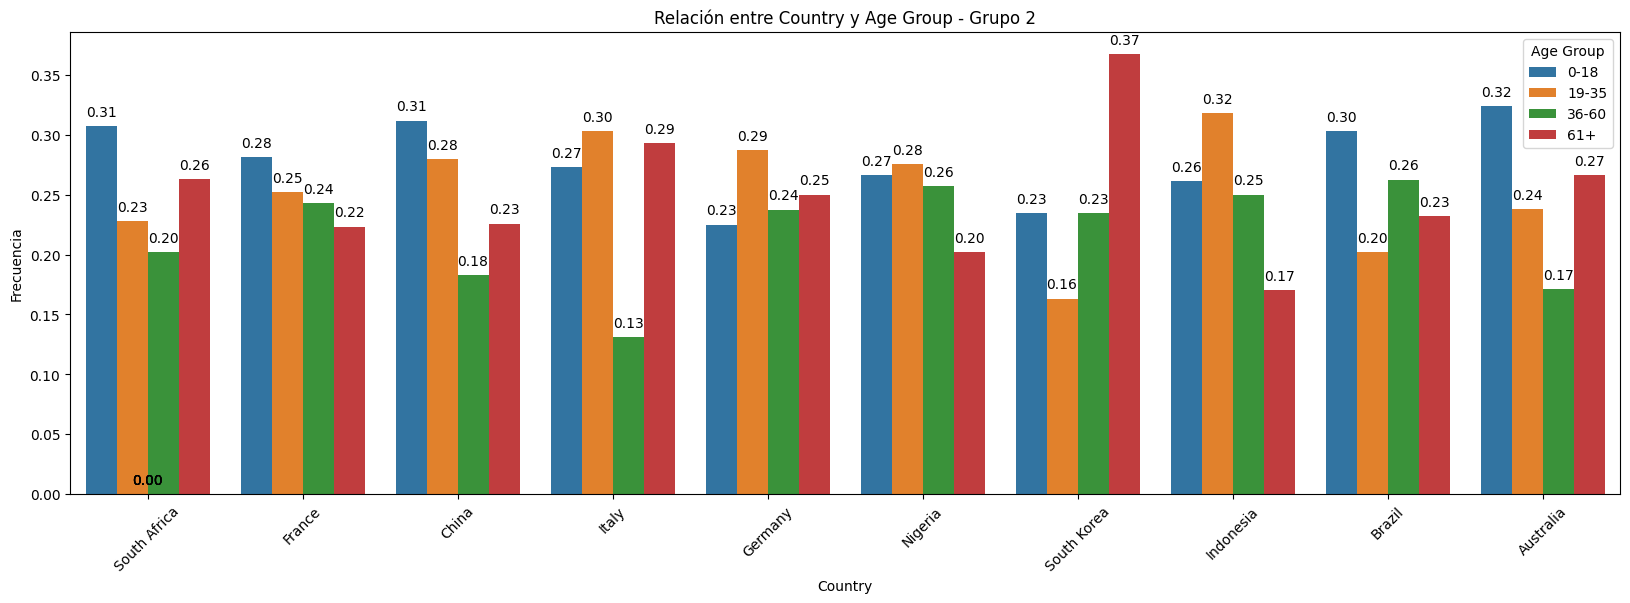

Respuesta COVID-19:


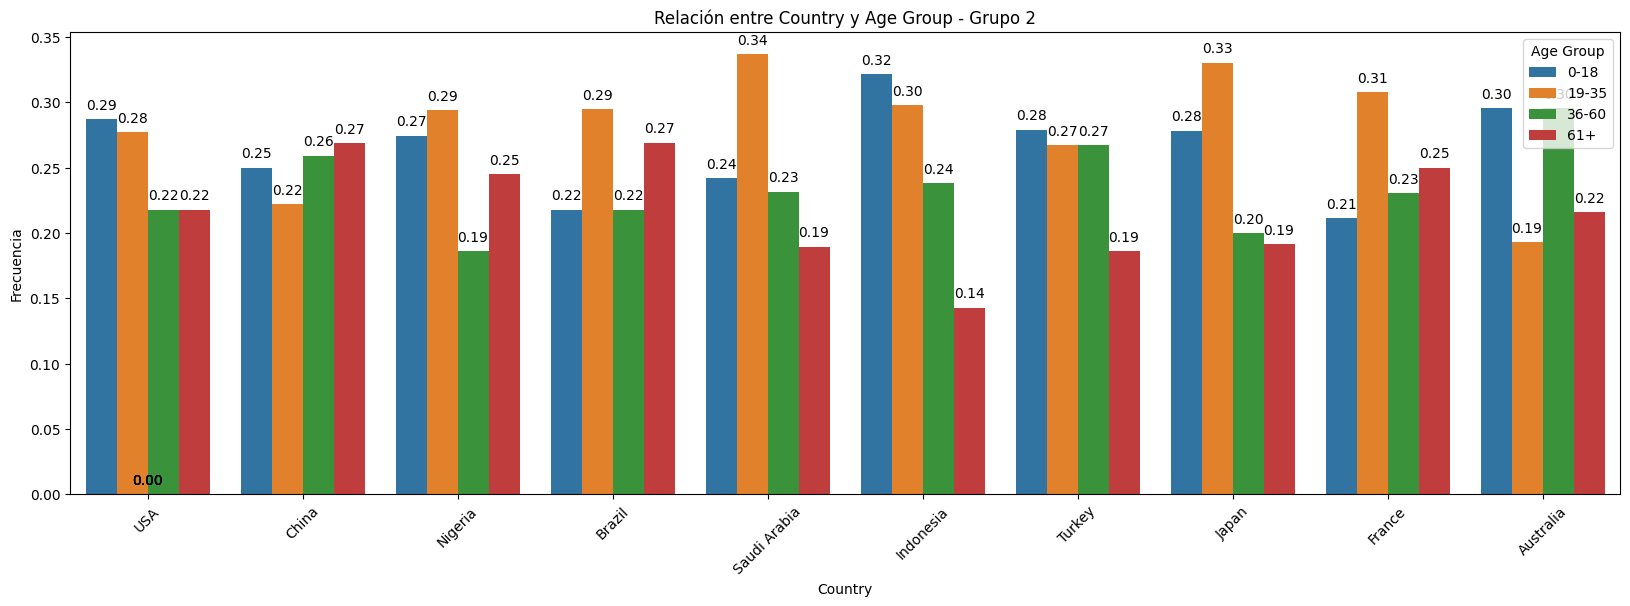

Respuesta Parkinson's Disease:


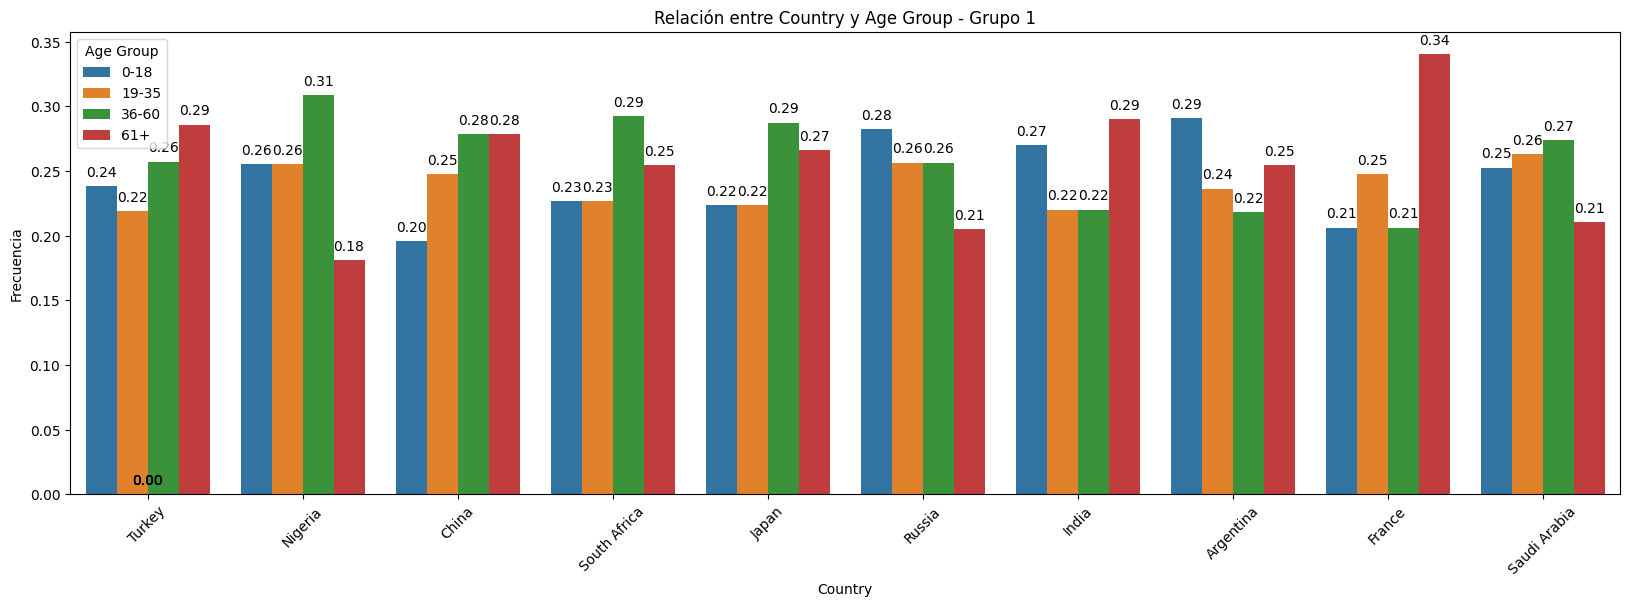

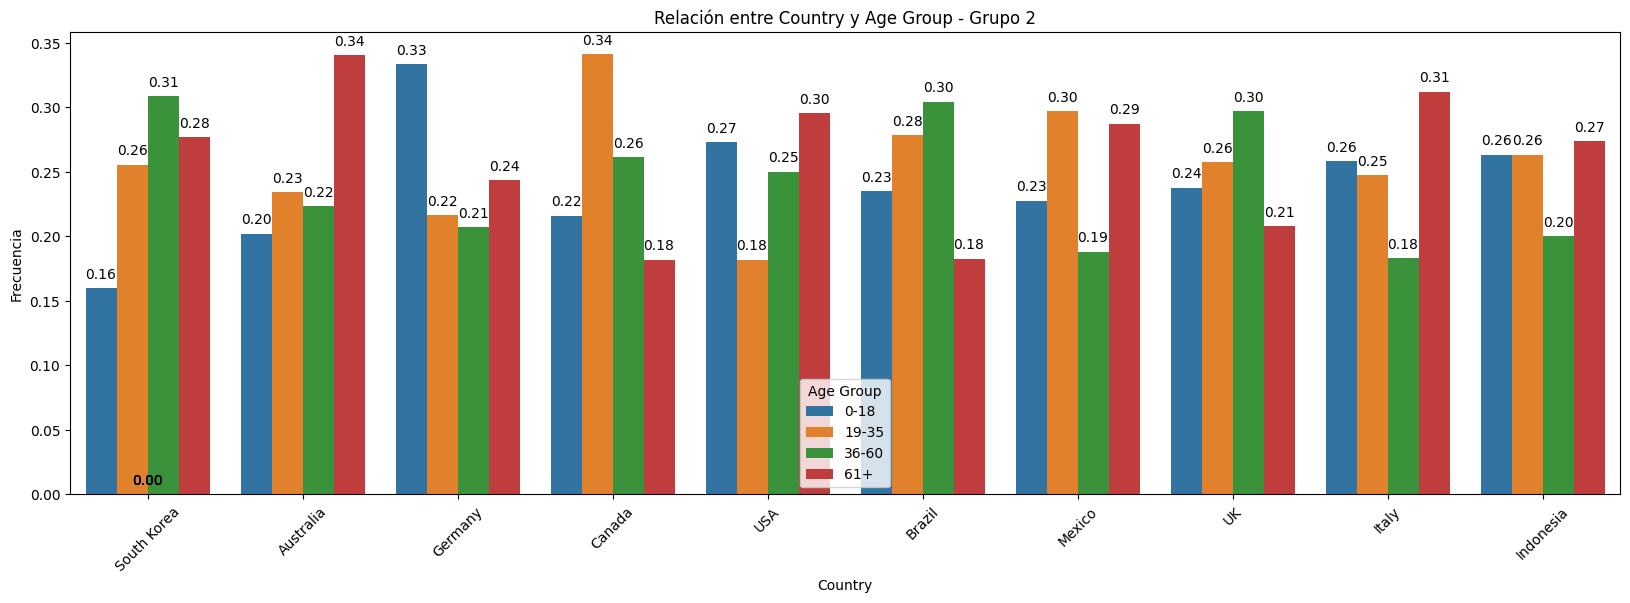

Respuesta Hepatitis:


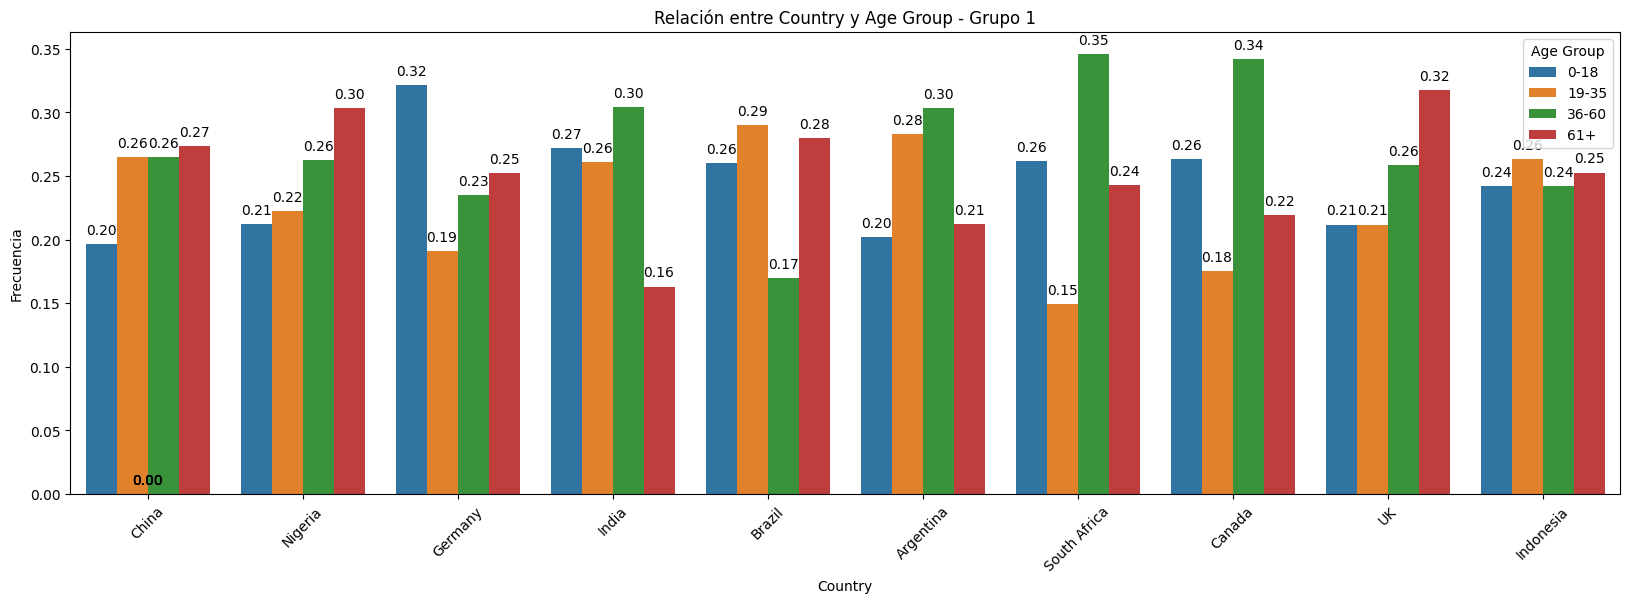

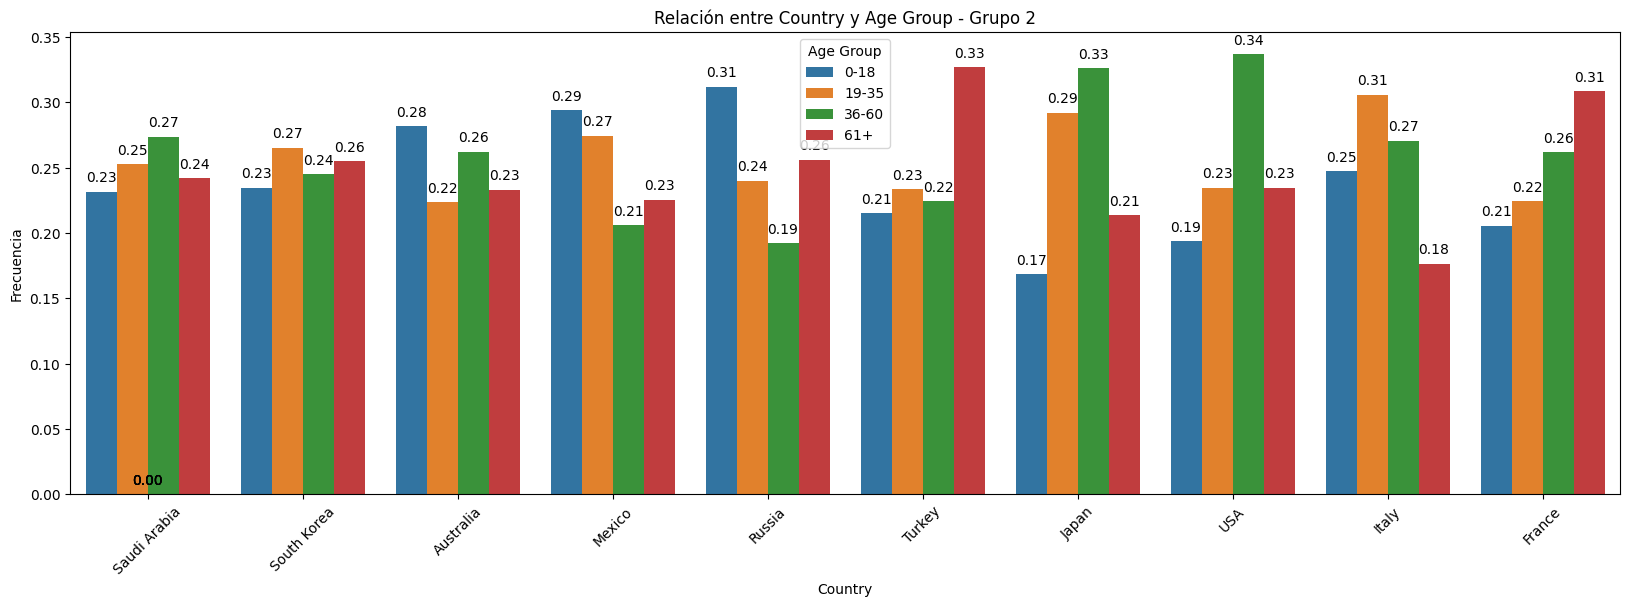

Respuesta Tuberculosis:


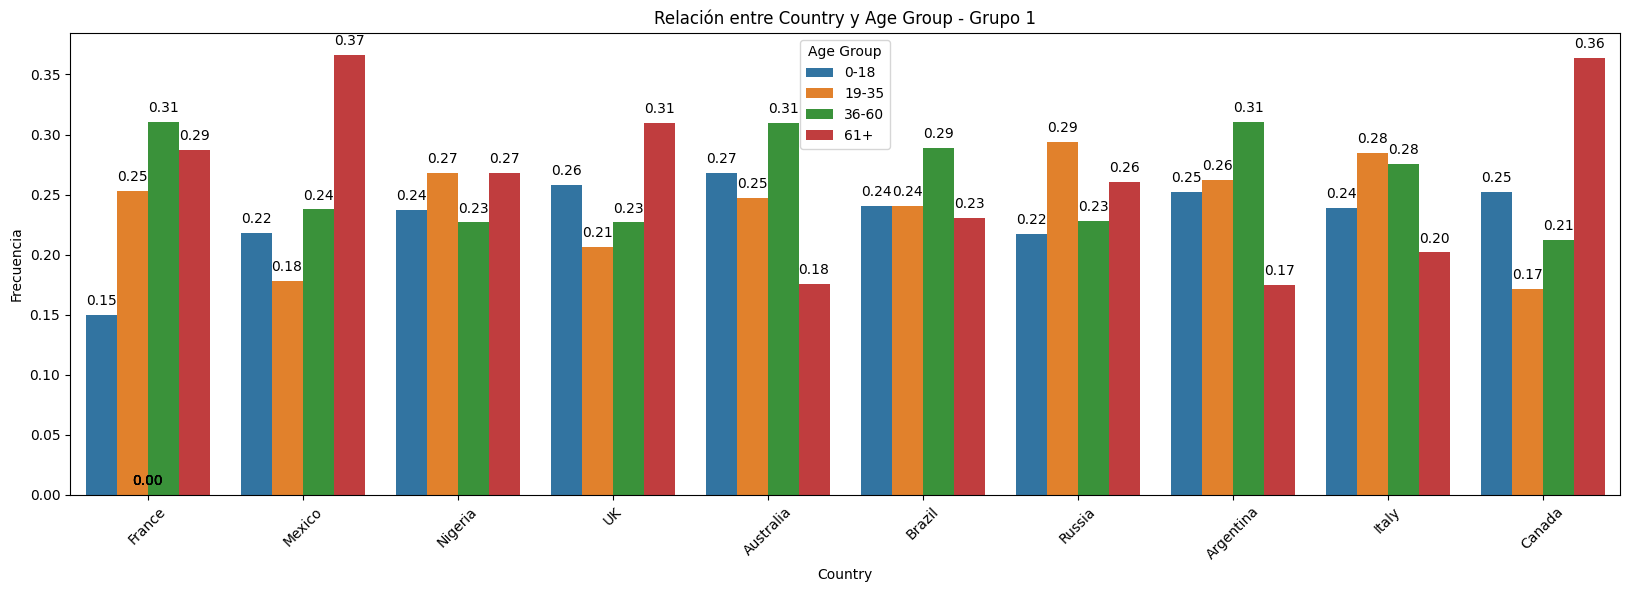

Respuesta Alzheimer's Disease:


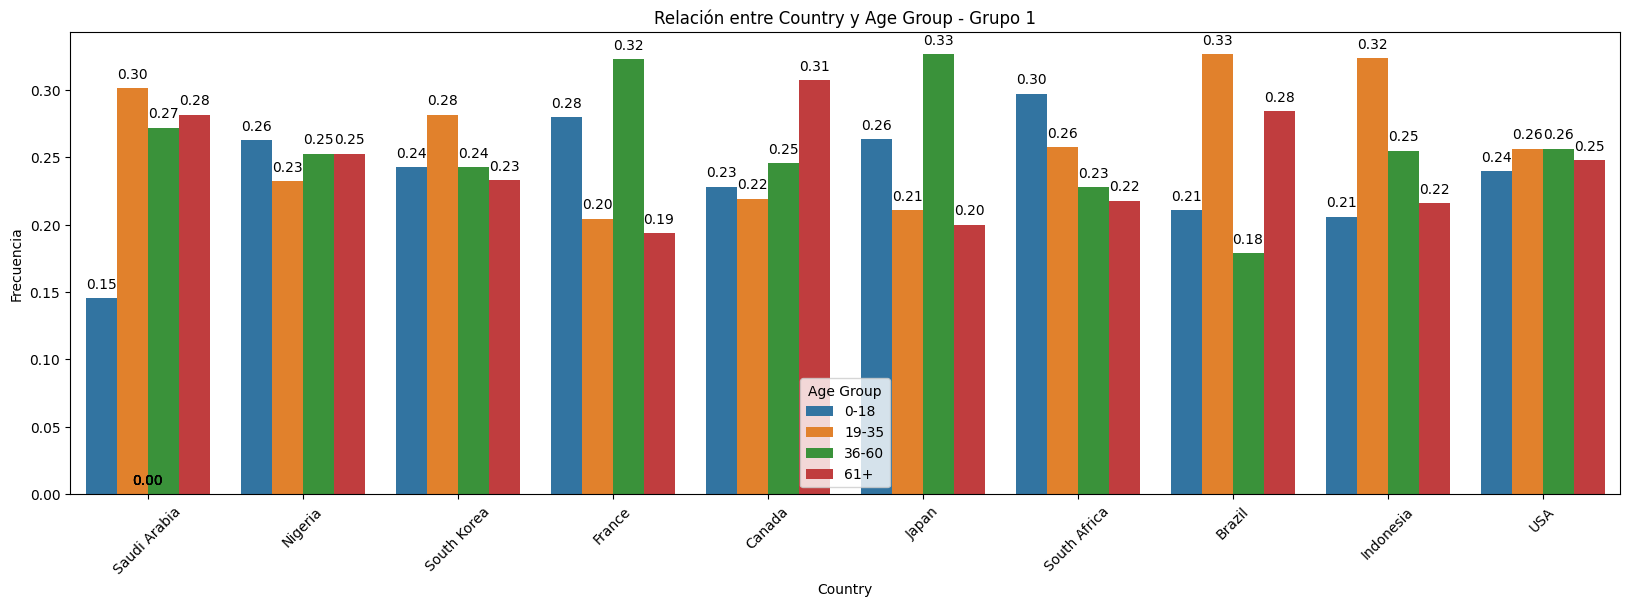

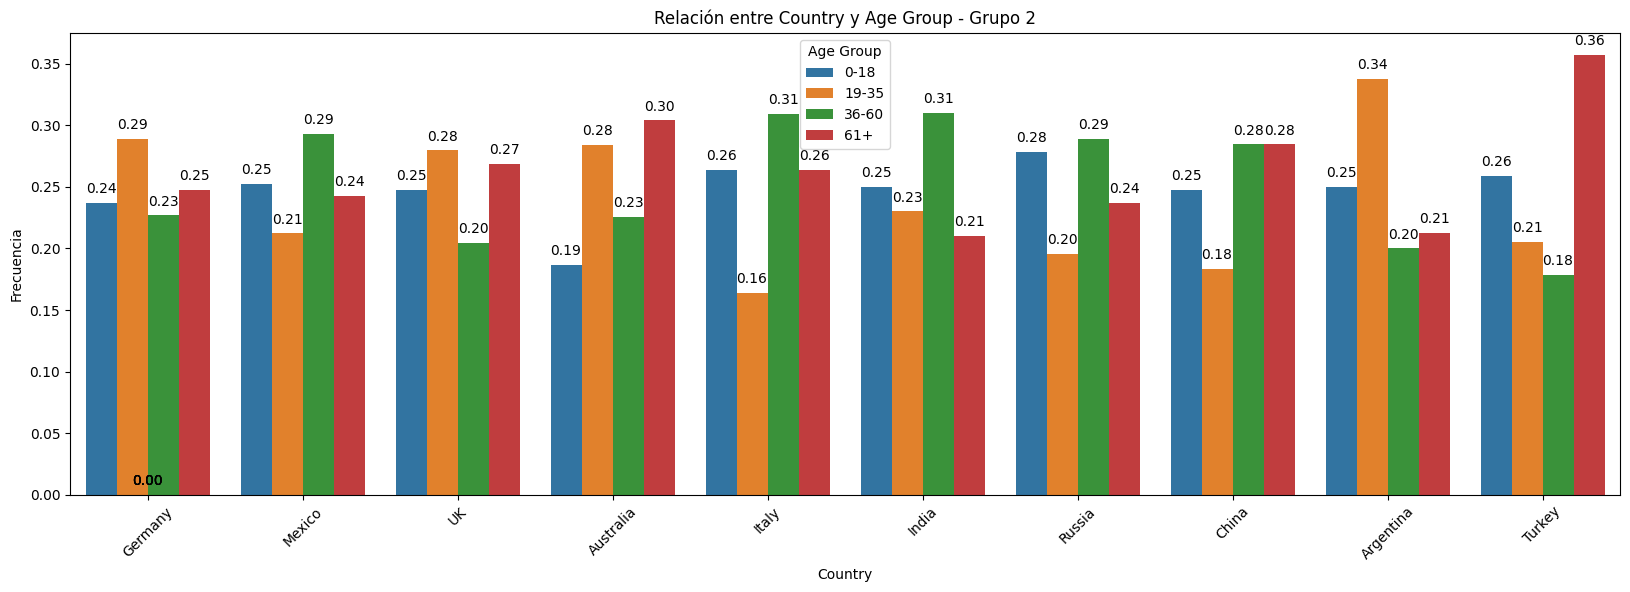

Respuesta Influenza:


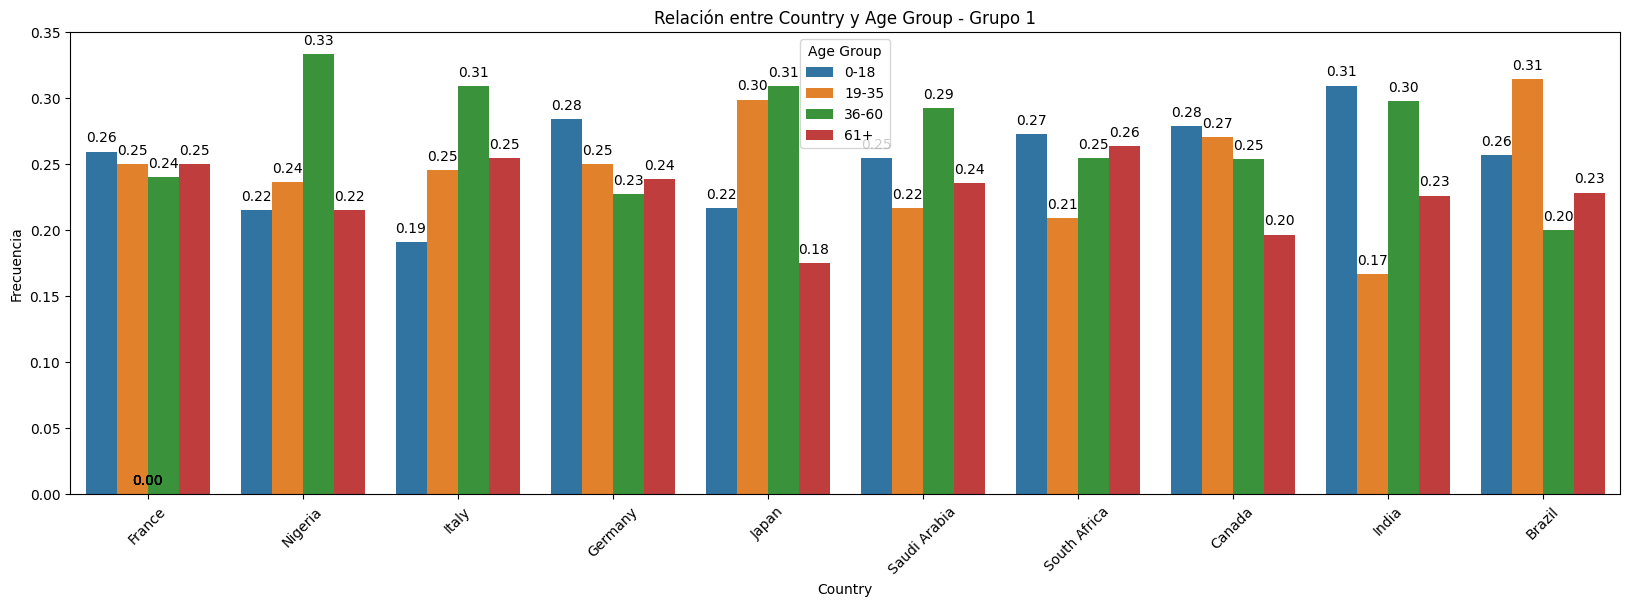

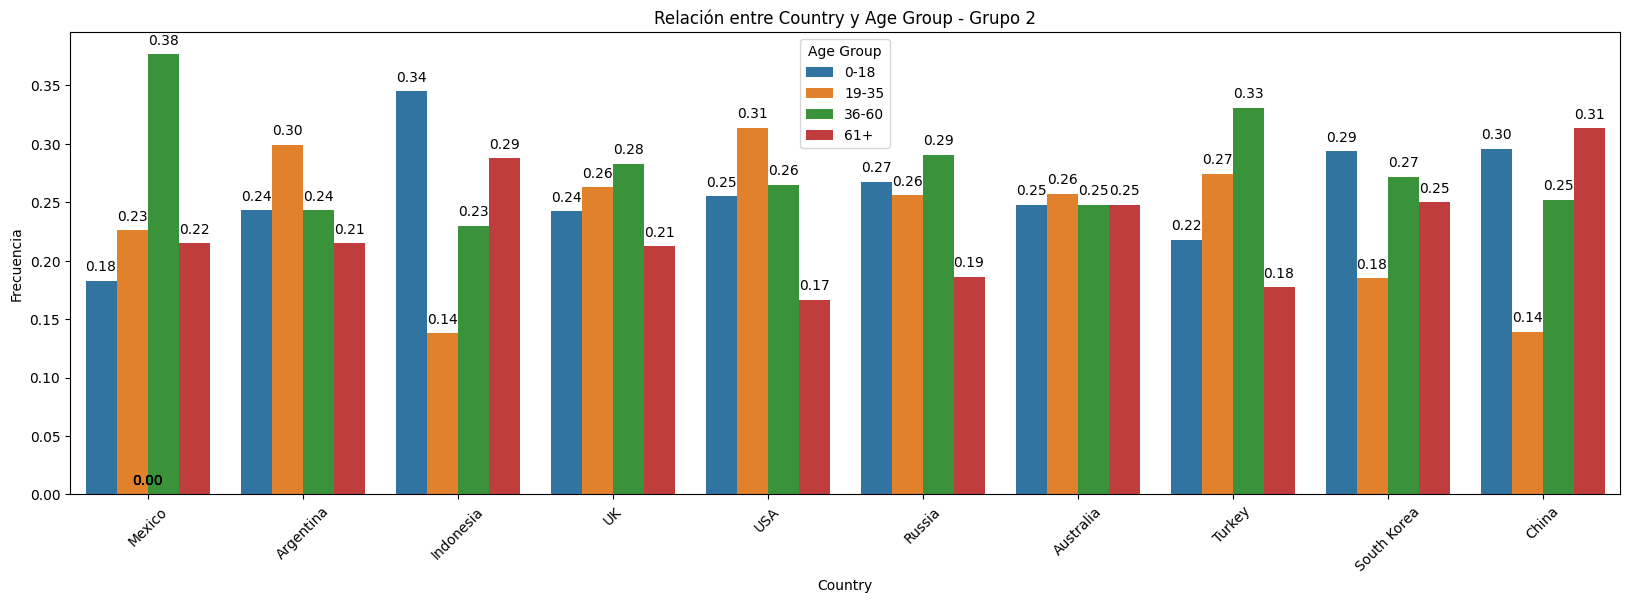

In [41]:
for valor, df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos, col_2, col_1, relative_freq = True, show_values = True)

#### NUMÉRICAS

In [42]:
corr_matrix = df_2023.corr(numeric_only = True) # Si no lo pones y tienes variables tipo texto, fallará

In [43]:
plt.figure(figsize=(13, 10))  # Ajusta el tamaño de la figura

# Crear el heatmap con seaborn
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
                 cbar=True, square=True, linewidths=.5)

plt.title('Matriz de Correlación')

# Rotar las etiquetas de los ejes X y Y
plt.xticks(rotation=90, ha='right')  # Rotar y alinear las etiquetas de las X
plt.yticks(rotation=0, ha='right')  # Rotar y alinear las etiquetas de las Y

# Ajustar el espaciado entre las etiquetas y los ejes con `ax.tick_params()`
ax.tick_params(axis='x', which='major', pad=10)  # Añadir espacio en el eje X
ax.tick_params(axis='y', which='major', pad=10)  # Añadir espacio en el eje Y

# Ajustar automáticamente el espaciado para evitar superposición
plt.tight_layout()

plt.show()

*No se aprecian relaciones entre las variables numéricas*

### ANÁLISIS DE RELACIONES

#### CATEGÓRICA - CATEGÓRICA

In [44]:
for columna_i in cols_categoricas_nominales:
    for columna_j in cols_categoricas_nominales:
        if columna_i != columna_j:
            tabla_contingencia = pd.crosstab(df_2023[columna_i], df_2023[columna_j])
            chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
            print(f"Test Chi-Cuadrado para {columna_i} - {columna_j}")
            print("Valor Chi-Cuadrado:", chi2)
            print("P-Value:", p)
            print("Grados de Libertad:", dof)
            print("--------------------")
            # print("Tabla de Frecuencias Esperadas:\n", expected)

Test Chi-Cuadrado para Country - Disease Name
Valor Chi-Cuadrado: 374.6243346745579
P-Value: 0.2996038083838215
Grados de Libertad: 361
--------------------
Test Chi-Cuadrado para Country - Disease Category
Valor Chi-Cuadrado: 184.50551578797757
P-Value: 0.5988354220442702
Grados de Libertad: 190
--------------------
Test Chi-Cuadrado para Country - Age Group
Valor Chi-Cuadrado: 49.617916809551765
P-Value: 0.7455439428451789
Grados de Libertad: 57
--------------------
Test Chi-Cuadrado para Country - Gender
Valor Chi-Cuadrado: 33.022472207670575
P-Value: 0.6986623273168133
Grados de Libertad: 38
--------------------
Test Chi-Cuadrado para Country - Treatment Type
Valor Chi-Cuadrado: 83.34196226931604
P-Value: 0.013024860116452085
Grados de Libertad: 57
--------------------
Test Chi-Cuadrado para Country - Availability of Vaccines/Treatment
Valor Chi-Cuadrado: 14.434069697787809
P-Value: 0.7578248127721168
Grados de Libertad: 19
--------------------
Test Chi-Cuadrado para Disease Name -

*Vale, cosas a destacar: Ya encontramos relaciones entre variables categóricas (p-value < 0.05). Estas variables serían:*

- *Country - Treatment Type / P-Value: 0.013024860116452085*
- *Disease Name - Age Group / P-Value: 0.04297618952015073*
- *Disease Category - Age Group / P-Value: 0.07037861178404071*
- *Disease Category - Gender / P-Value: 0.016056993940592162*
- *Gender - Treatment Type / P-Value: 0.004678960791625932* 


#### CATEGÓRICA - NUMÉRICA

In [45]:
# Creamos un diccionario donde almacenar la variable categórica como clave y como valor una lista de elementos únicos 

grupos = {}

for columna in cols_categoricas_nominales:
    grupos[columna] = df_2023[columna].unique()

grupos.items()

dict_items([('Country', array(['Saudi Arabia', 'Russia', 'UK', 'South Korea', 'China', 'USA',
       'India', 'Australia', 'Mexico', 'Indonesia', 'South Africa',
       'Japan', 'Nigeria', 'Brazil', 'Turkey', 'Italy', 'Canada',
       'France', 'Argentina', 'Germany'], dtype=object)), ('Disease Name', array(['Hypertension', 'Leprosy', 'Polio', 'Ebola', 'Cancer', 'Dengue',
       'Rabies', 'Cholera', 'HIV/AIDS', 'Zika', 'Diabetes', 'Measles',
       'Malaria', 'Asthma', 'COVID-19', "Parkinson's Disease",
       'Hepatitis', 'Tuberculosis', "Alzheimer's Disease", 'Influenza'],
      dtype=object)), ('Disease Category', array(['Metabolic', 'Bacterial', 'Chronic', 'Genetic', 'Parasitic',
       'Viral', 'Respiratory', 'Autoimmune', 'Infectious', 'Neurological',
       'Cardiovascular'], dtype=object)), ('Age Group', array(['36-60', '61+', '19-35', '0-18'], dtype=object)), ('Gender', array(['Female', 'Other', 'Male'], dtype=object)), ('Treatment Type', array(['Medication', 'Therapy', 'Vacci

In [46]:
# for columna in cols_numericas:    
#     for clave, valor in grupos.items():
#         argumento = [df_2023[df_2023[clave] == v][columna] for v in valor] # obtenemos las variables numéricas por cada variable categórica y los incluimos en una lista
#         f_val, p_val = stats.f_oneway(*argumento) # El método * lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
#         print(f"{columna} - {clave}: Valor P-Value = {p_val}")
#     print("----------------")

*Podemos indicar del análisis anterior que sí que existe relación entre las siguientes variables (p-value < 0.05):*
- *Incidence Rate (%) - Age Group: Valor P-Value = 0.0012045760954002217*
- *Population Affected - Disease Name: Valor P-Value = 0.01727467911892992*
- *Healthcare Access (%) - Availability of Vaccines/Treatment: Valor P-Value = 0.07304463629507732*
- *Average Treatment Cost (USD) - Country: Valor P-Value = 0.05129812242384132*
- *Average Treatment Cost (USD) - Availability of Vaccines/Treatment: Valor P-Value = 0.03575292120614895*
- *Improvement in 5 Years (%) - Country: Valor P-Value = 0.046408325511299295*
- *Improvement in 5 Years (%) - Disease Category: Valor P-Value = 0.01505778230517735*
- *Per Capita Income (USD) - Disease Name: Valor P-Value = 0.034984215601241916*
- *Education Index - Country: Valor P-Value = 0.038265203336030604*
- *Urbanization Rate (%) - Gender: Valor P-Value = 0.07144203449285322*

In [47]:
# h_stat, p_value = stats.kruskal(*[df[df['disease_name'] == disease]['income_per_capita'] for disease in df['disease_name'].unique()])

In [48]:
# for columna in cols_numericas:    
#     for clave, valor in grupos.items():
#         argumento = [df_2023[df_2023[clave] == v][columna] for v in valor] # obtenemos las variables numéricas por cada variable categórica y los incluimos en una lista
#         f_val, p_val = stats.f_oneway(*argumento) # El método * lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
#         print(f"{columna} - {clave}: Valor P-Value = {p_val}")
#     print("----------------")

In [50]:
for columna in cols_numericas:
    for clave, valor in grupos.items():
        argumento = [df_2023[df_2023[clave] == v][columna] for v in valor]
        h_stat, p_value = stats.kruskal(*argumento)
        print(f"{columna} - {clave}: Valor P-Value = {p_value}")
    print("----------------")


Prevalence Rate (%) - Country: Valor P-Value = 0.33211553107336284
Prevalence Rate (%) - Disease Name: Valor P-Value = 0.5863281887923188
Prevalence Rate (%) - Disease Category: Valor P-Value = 0.9678316968284656
Prevalence Rate (%) - Age Group: Valor P-Value = 0.8585497835615233
Prevalence Rate (%) - Gender: Valor P-Value = 0.9430956962769217
Prevalence Rate (%) - Treatment Type: Valor P-Value = 0.9064506437834017
Prevalence Rate (%) - Availability of Vaccines/Treatment: Valor P-Value = 0.6992170727599806
----------------
Incidence Rate (%) - Country: Valor P-Value = 0.20151906298504066
Incidence Rate (%) - Disease Name: Valor P-Value = 0.29623581071551514
Incidence Rate (%) - Disease Category: Valor P-Value = 0.7340589816558007
Incidence Rate (%) - Age Group: Valor P-Value = 0.0011838420605670254
Incidence Rate (%) - Gender: Valor P-Value = 0.3737792845009101
Incidence Rate (%) - Treatment Type: Valor P-Value = 0.22379132486809444
Incidence Rate (%) - Availability of Vaccines/Treatme

In [ ]:
Incidence Rate (%) - Age Group: Valor P-Value = 0.0011838420605670254

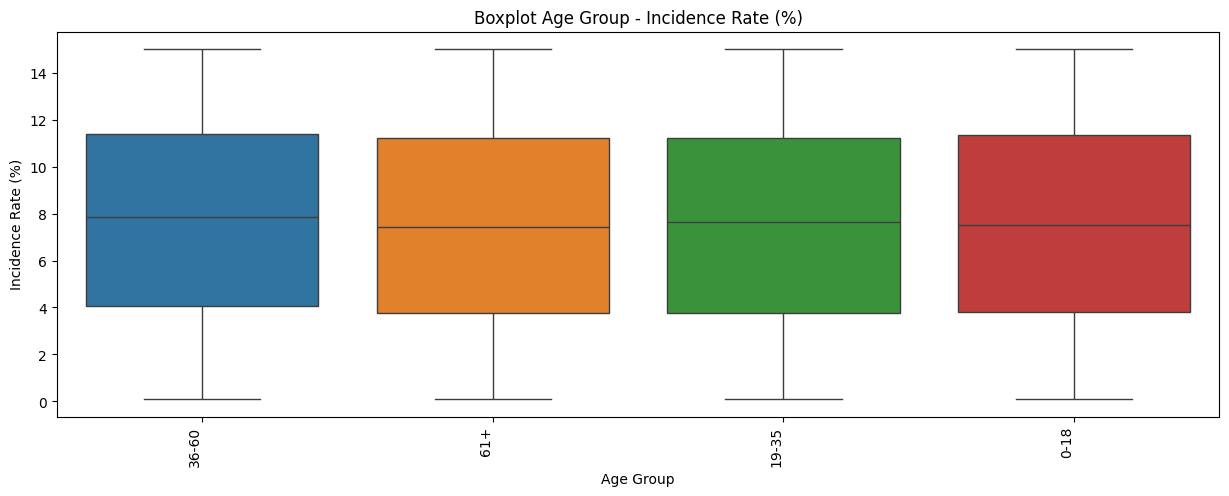

In [54]:
variable_categorica = "Age Group"
variable_numerica = "Incidence Rate (%)"
df_2023.groupby(variable_categorica, as_index = False)[variable_numerica].describe()

plt.figure(figsize=(15,5))
sns.boxplot(x = "Age Group",
            y = "Incidence Rate (%)",
            hue = "Age Group",
            data = df_2023);

plt.title('Boxplot Age Group - Incidence Rate (%)')

plt.xticks(rotation=90, ha='right')  # Rotar y alinear las etiquetas de las X

plt.show()

In [56]:
def plot_grouped_histograms(df, cat_col, num_col, group_size):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        for cat in subset_cats:
            sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat))
        
        plt.title(f'Histograms of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xlabel(num_col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

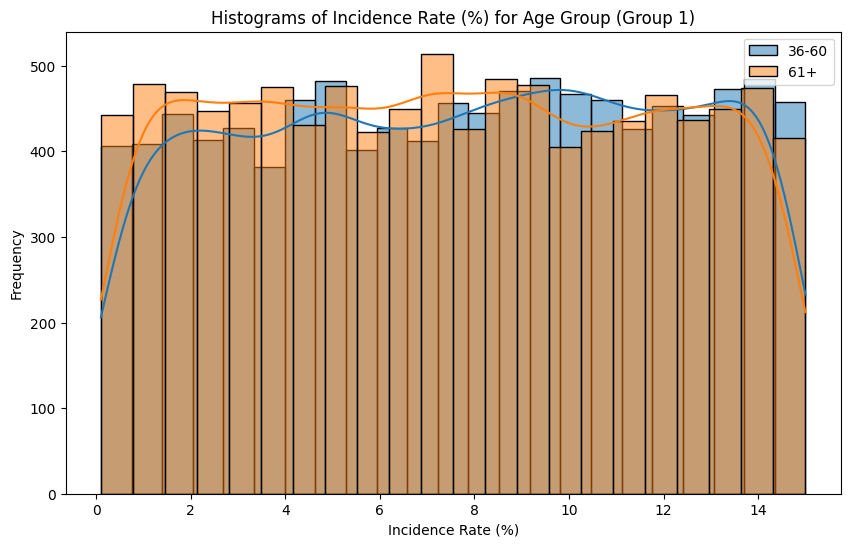

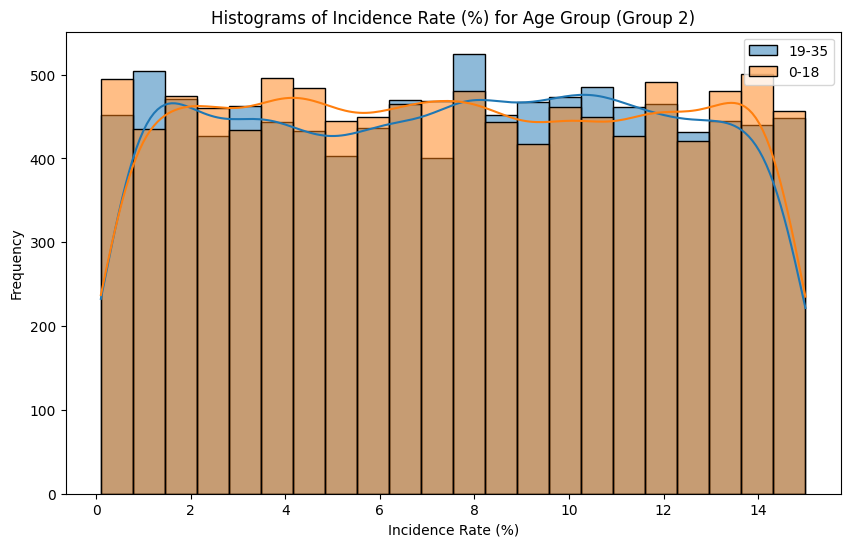

In [57]:
plot_grouped_histograms(df_2023,"Age Group", "Incidence Rate (%)", 2)

### INFORMACIÓN HASTA EL MOMENTO

NUESTRAS HIPÓTESIS:

1. *¿Cuáles son las enfermedades que prevalecen en cada país?* - En teoría a en países menos desarrollados deberían prevalecer las más mortales o erradicadas en países más desarrollados
2. *¿Cuáles son los tipos de transmisión de enfermedades que prevalencen en cada país?* - En teoría a en países menos desarrollados deberían prevalecer las más contagiosas
3. *¿Qué relación existe entre la enfermedad y los ingresos?* - En teoría a menores ingresos debería haber más enfermedades
4. *¿Qué relación existe entre la enfermedad y la educación?* - En teoría a menores ingresos, menor nivel adquisitivo y por ende más enfermedades
5. *¿Qué relación existe entre la edad de la población y la mortalidad de la misma?* - En edades más tempranas y gente más anciana debería haber un pico de mortalidad
6. *¿Qué relación existe entre el género de la población y la mortalidad de la misma?* - No tendría por qué haber relación
7. *¿Qué relación existe entre el coste del tratamiento y la mortalidad de la población?* - A mayor coste debería haber mayor mortalidad
8. *¿Qué relación existe entre el coste del tratamiento y la cantidad de población afectada?* - A mayor coste debería haber mayor cantidad de población afectada
9. *¿Qué relación existe entre el coste del tratamiento y el número de nuevos casos?* - A mayor coste debería haber mayor número de nuevos casos

CATEGÓRICA - CATEGÓRICA:

Hay relación entre los siguientes pares de variables:

- *Country - Treatment Type / P-Value: 0.013024860116452085*
- *Disease Name - Age Group / P-Value: 0.04297618952015073*
- *Disease Category - Age Group / P-Value: 0.07037861178404071*
- *Disease Category - Gender / P-Value: 0.016056993940592162*
- *Gender - Treatment Type / P-Value: 0.004678960791625932* 

CATEGÓRICA - NUMÉRICA:

Y hay relación entre los siguientes pares de variables:

- *Incidence Rate (%) - Age Group: Valor P-Value = 0.0012045760954002217*
- *Population Affected - Disease Name: Valor P-Value = 0.01727467911892992*
- *Healthcare Access (%) - Availability of Vaccines/Treatment: Valor P-Value = 0.07304463629507732*
- *Average Treatment Cost (USD) - Country: Valor P-Value = 0.05129812242384132*
- *Average Treatment Cost (USD) - Availability of Vaccines/Treatment: Valor P-Value = 0.03575292120614895*
- *Improvement in 5 Years (%) - Country: Valor P-Value = 0.046408325511299295*
- *Improvement in 5 Years (%) - Disease Category: Valor P-Value = 0.01505778230517735*
- *Per Capita Income (USD) - Disease Name: Valor P-Value = 0.034984215601241916*
- *Education Index - Country: Valor P-Value = 0.038265203336030604*
- *Urbanization Rate (%) - Gender: Valor P-Value = 0.07144203449285322*

NUMÉRICA - NUMÉRICA:

No hay relación entre ninguna de las variables según el 'heat map'

CONCLUSIONES HASTA EL MOMENTO (REVISAR):

1. *¿Cuáles son las enfermedades que prevalecen en cada país?* - Lo veremos más adelante
2. *¿Cuáles son los tipos de transmisión de enfermedades que prevalencen en cada país?* - Lo veremos más adelante
3. *¿Qué relación existe entre la enfermedad y los ingresos?* - Sí que hay relación
4. *¿Qué relación existe entre la enfermedad y la educación?* - No se ve relación a priori, pero lo analizaremos más adelante
5. *¿Qué relación existe entre la edad de la población y la mortalidad de la misma?* - No hay relación
6. *¿Qué relación existe entre el género de la población y la mortalidad de la misma?* - No hay relación
7. *¿Qué relación existe entre el coste del tratamiento y la mortalidad de la población?* - No hay relación
8. *¿Qué relación existe entre el coste del tratamiento y la cantidad de población afectada?* - No hay relación
9. *¿Qué relación existe entre el coste del tratamiento y el número de nuevos casos?* - No se ve relación a priori, pero lo analizaremos más adelante

#### RESPUESTA PREGUNTA 1

*Vamos a obtener la respuesta a la primera hipótesis: "¿Cuáles son las enfermedades que prevalecen en cada país?"*

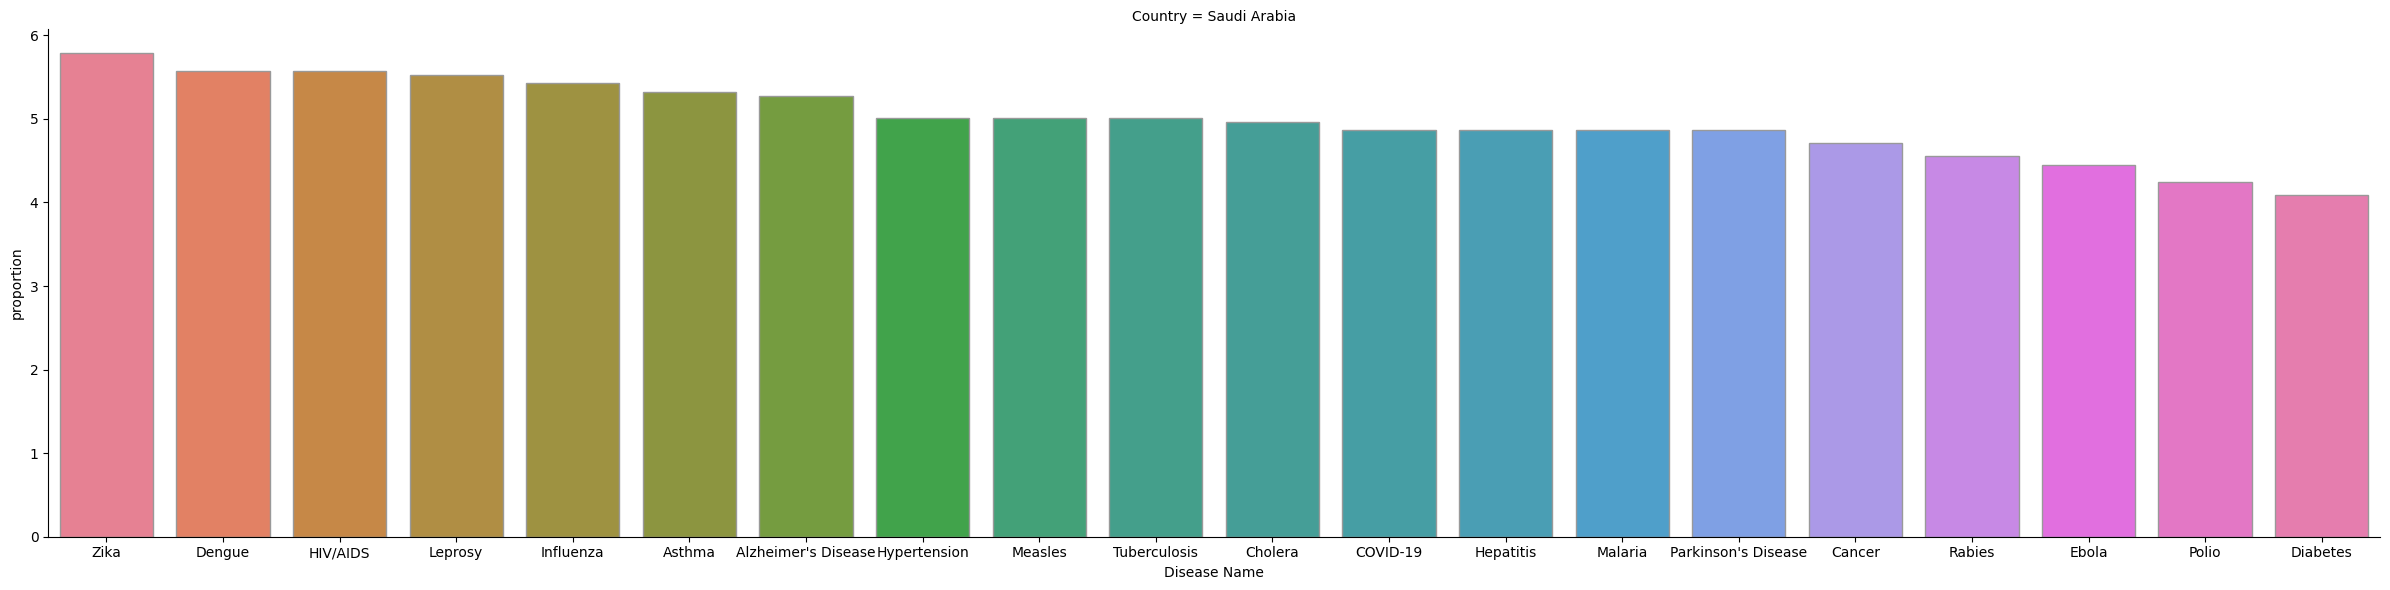

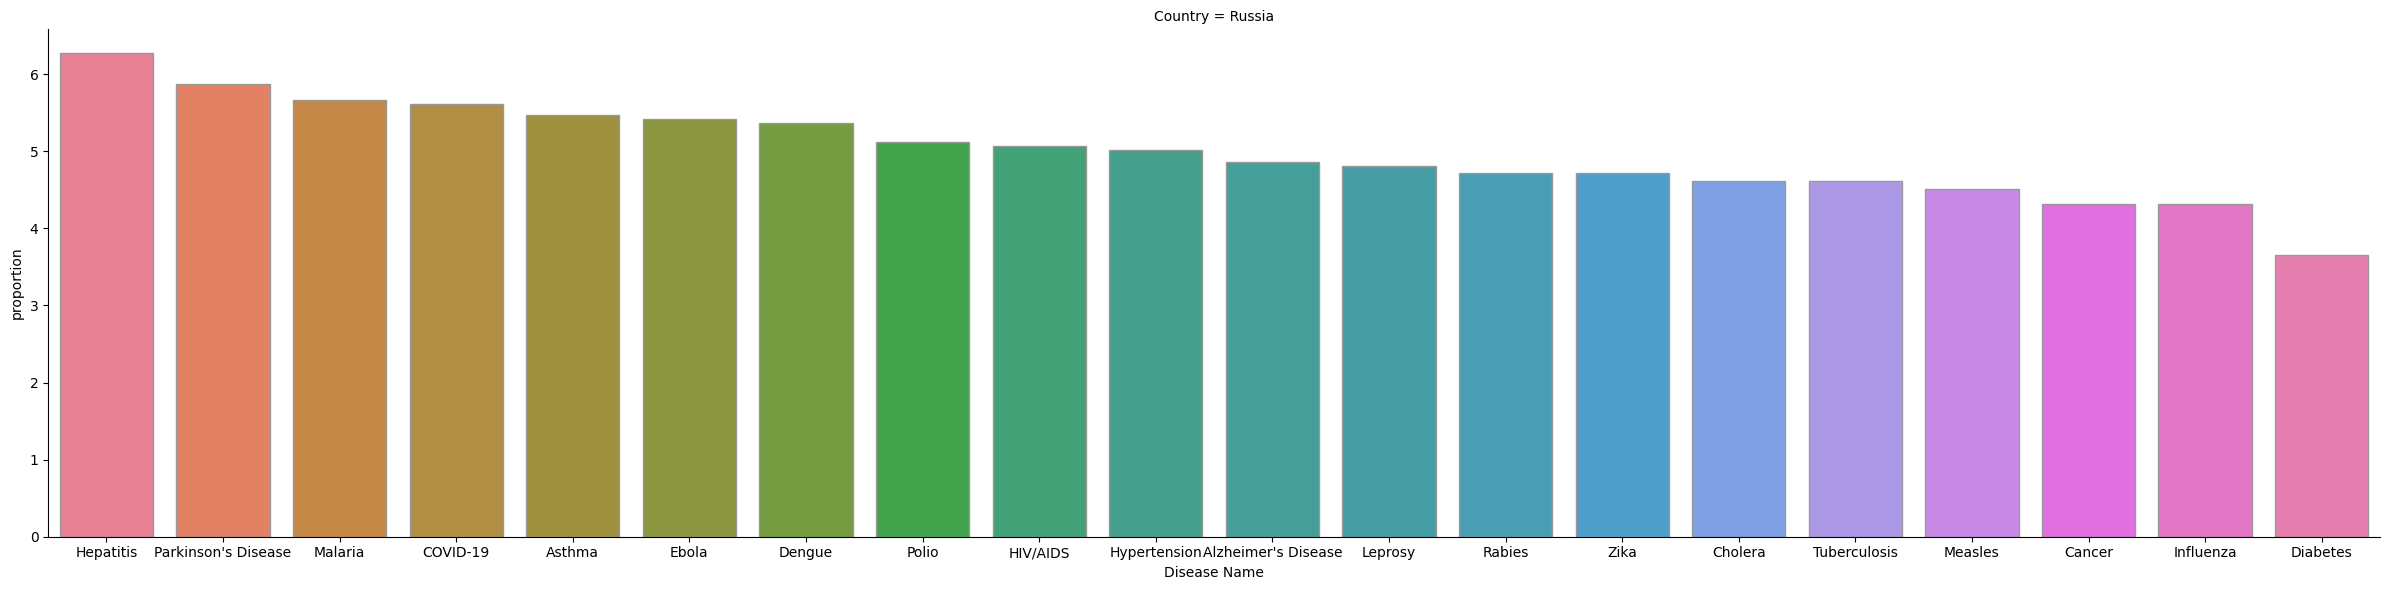

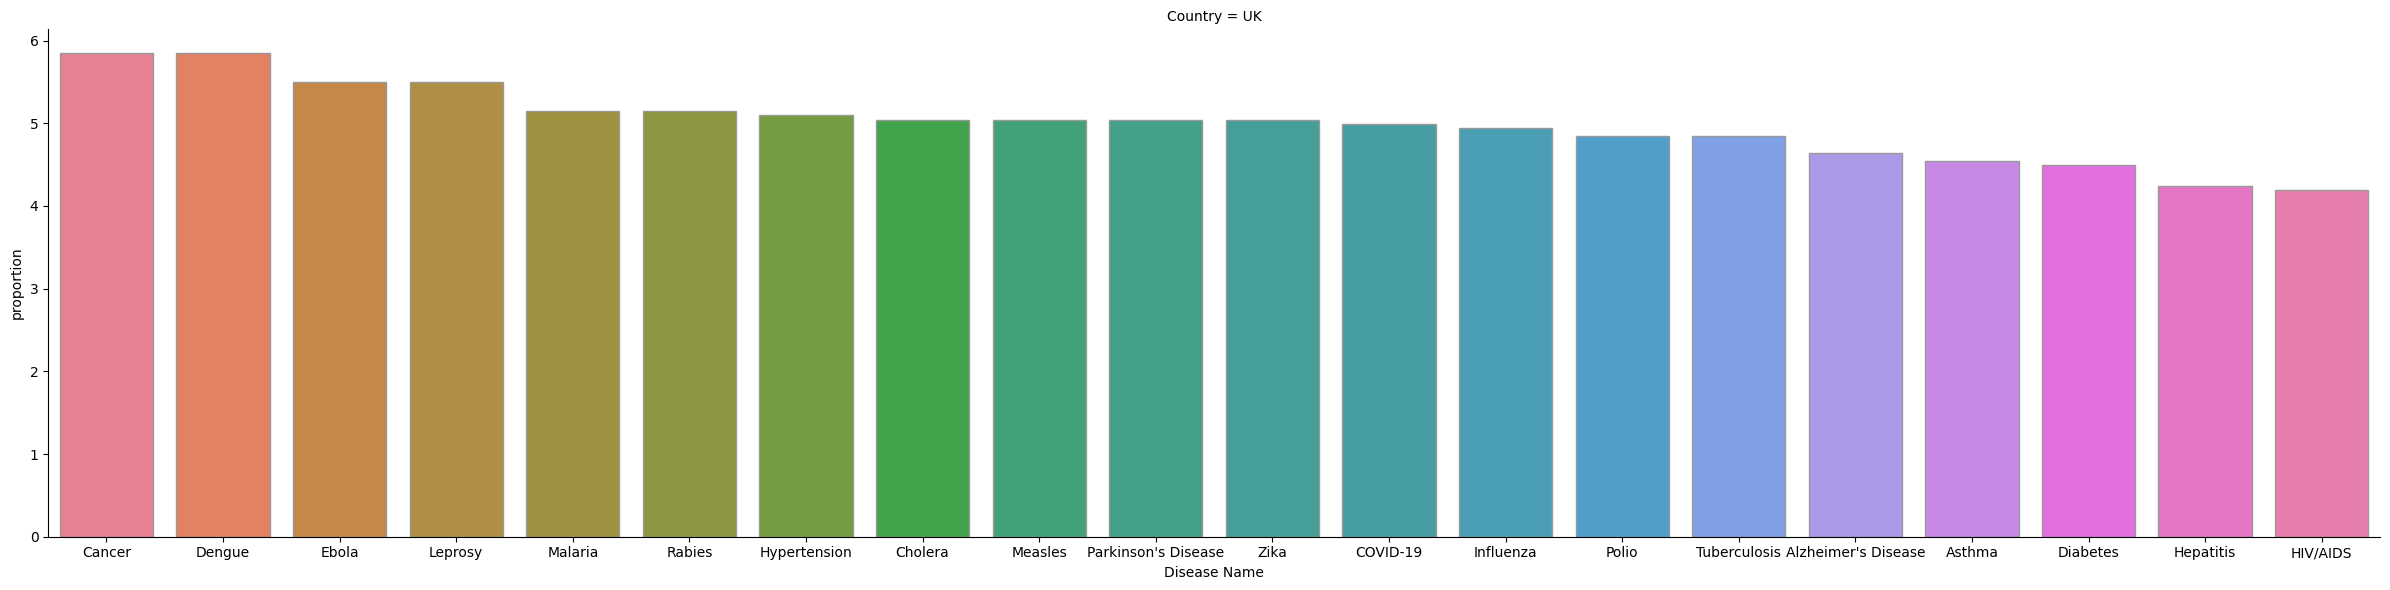

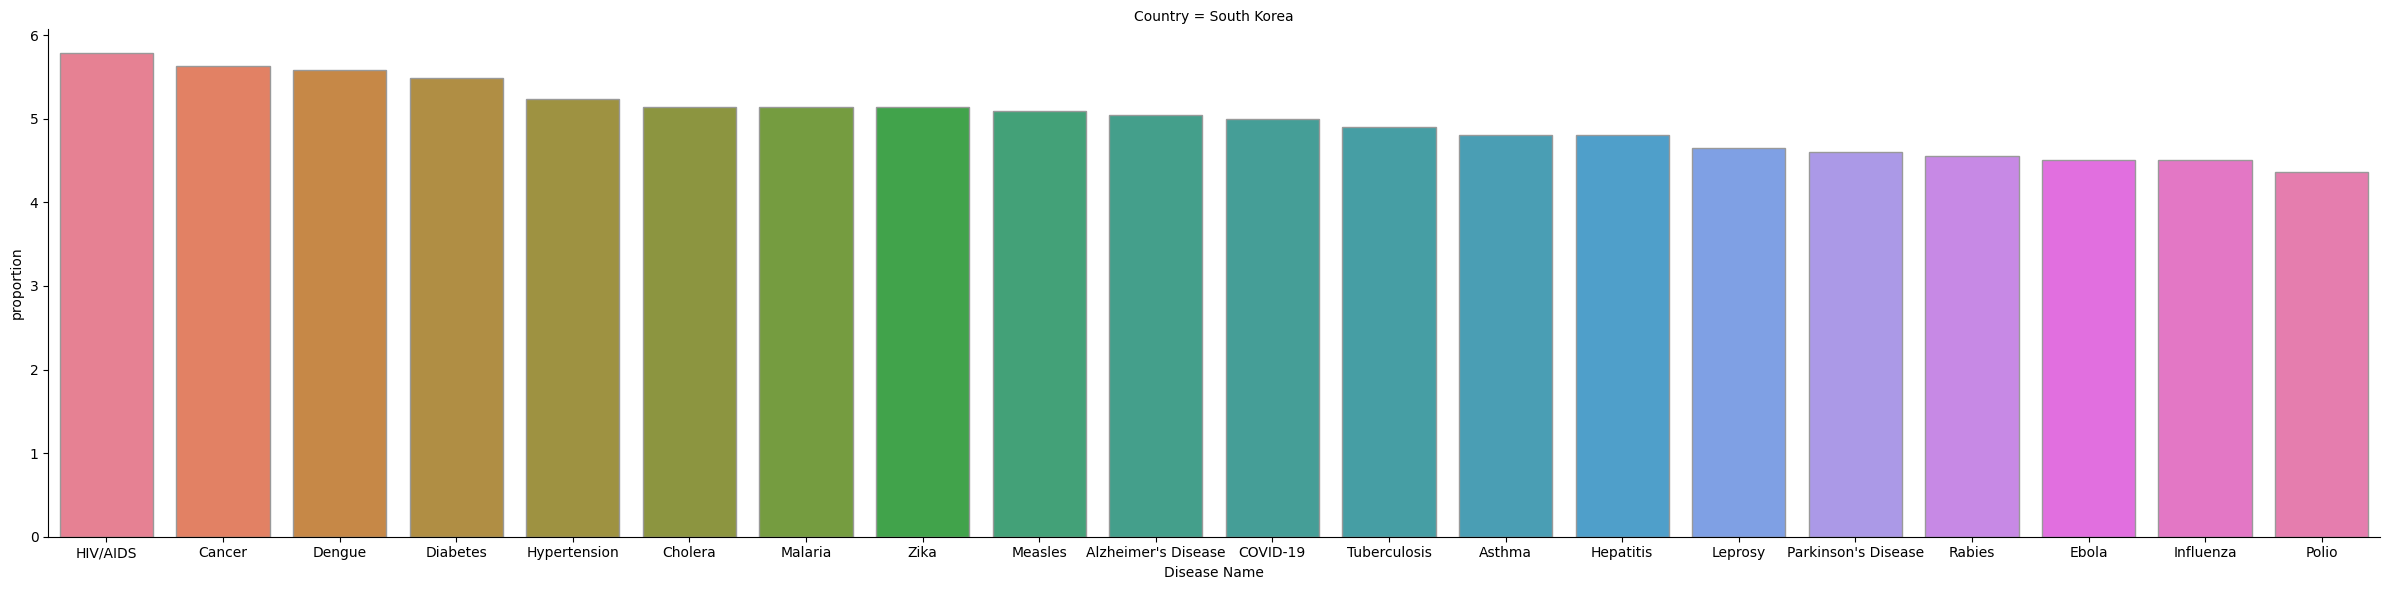

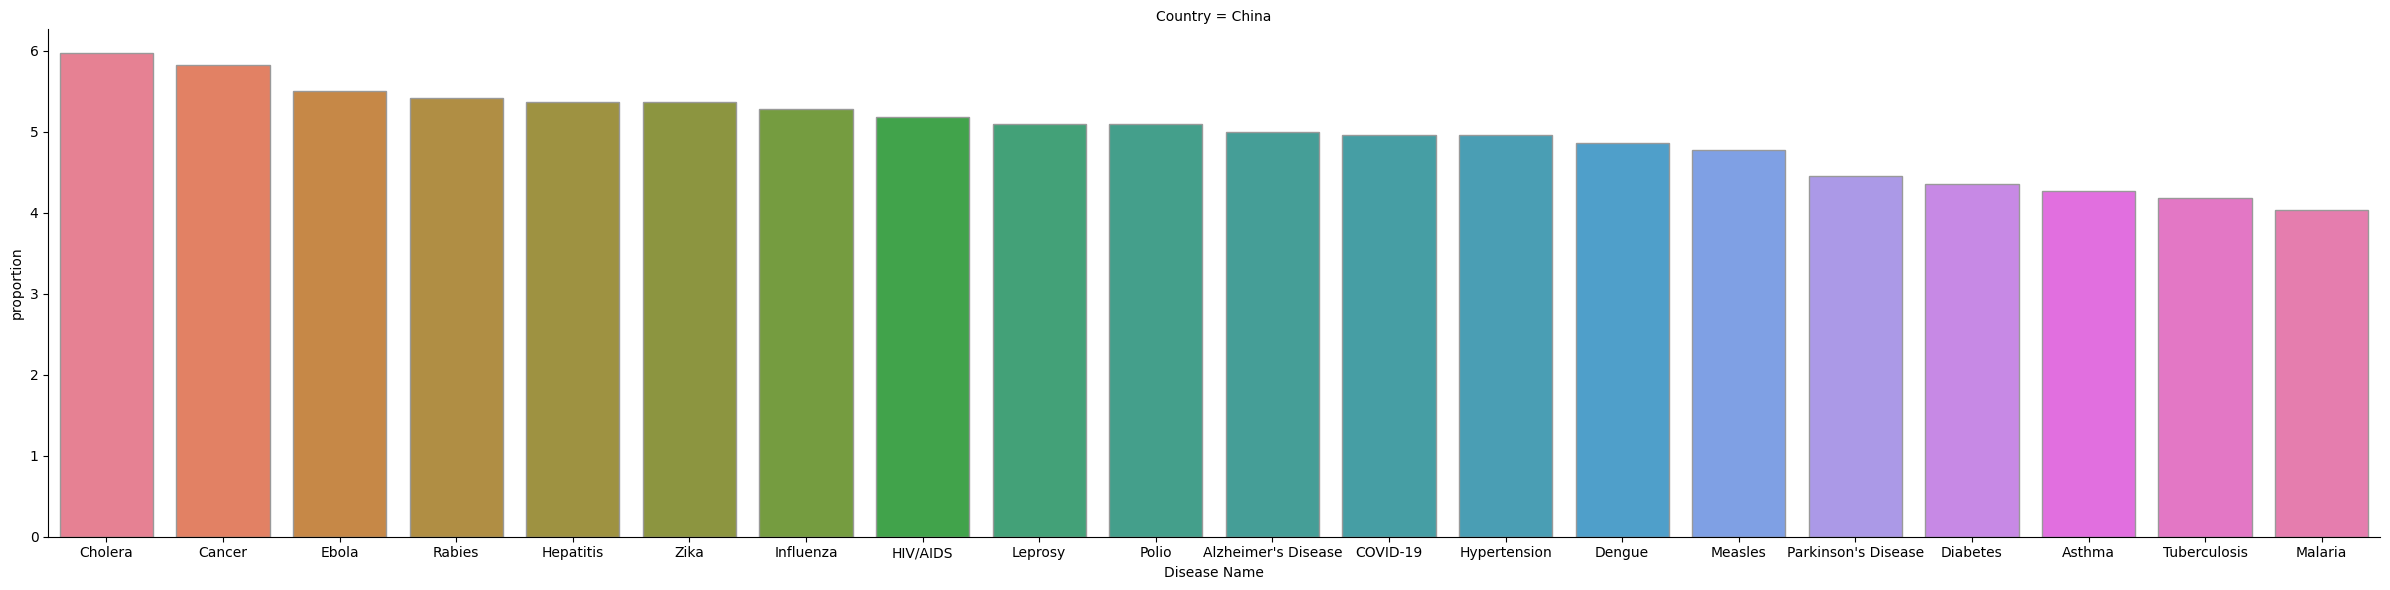

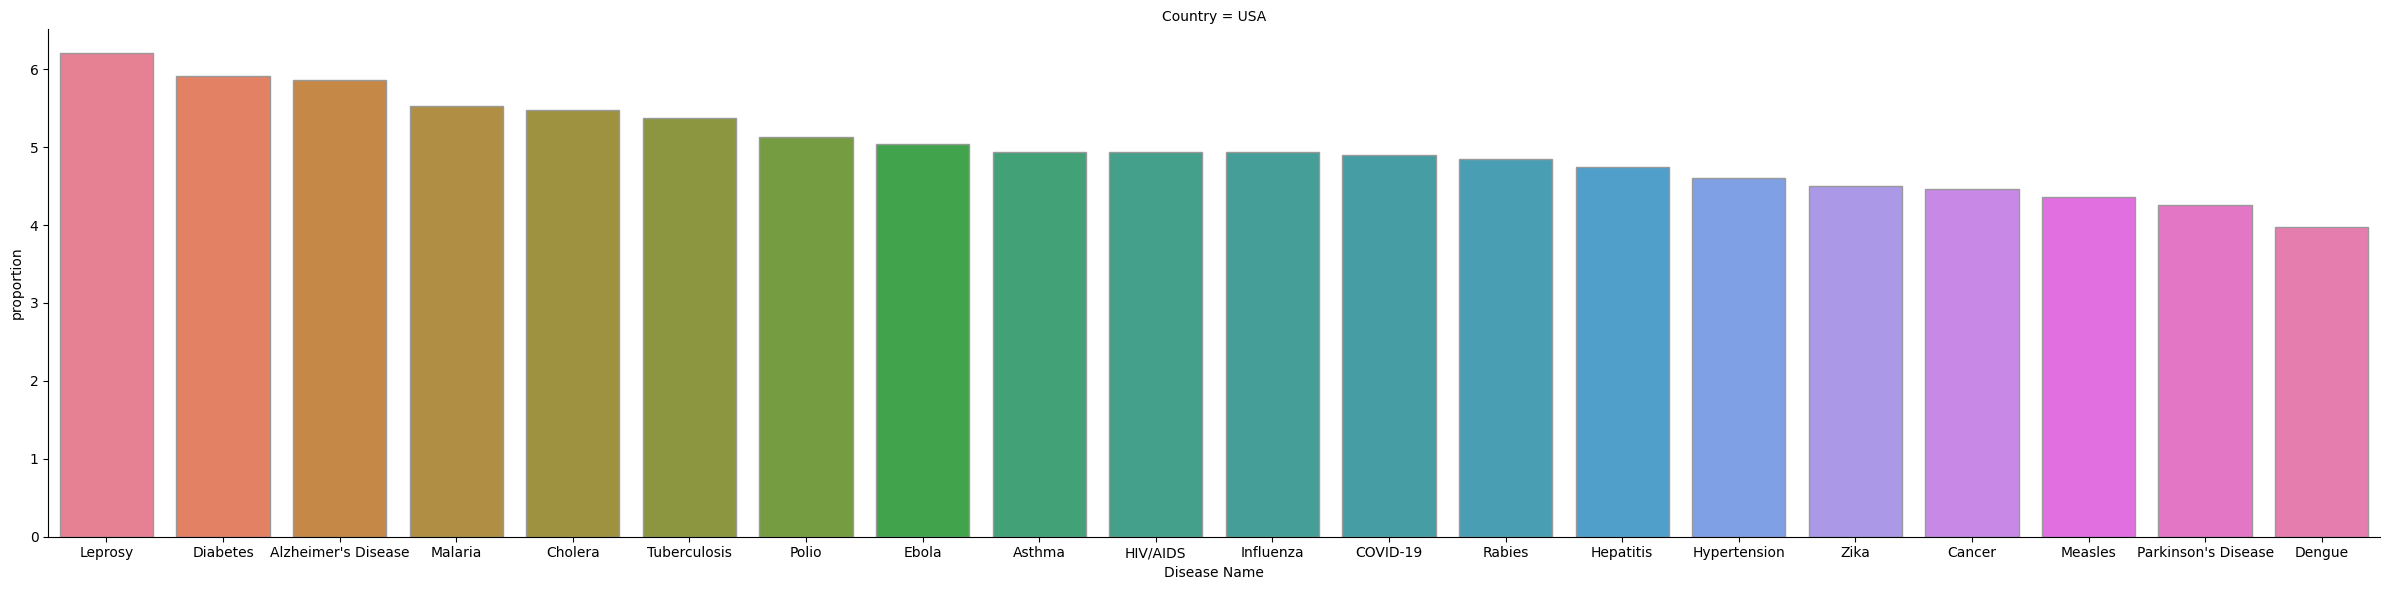

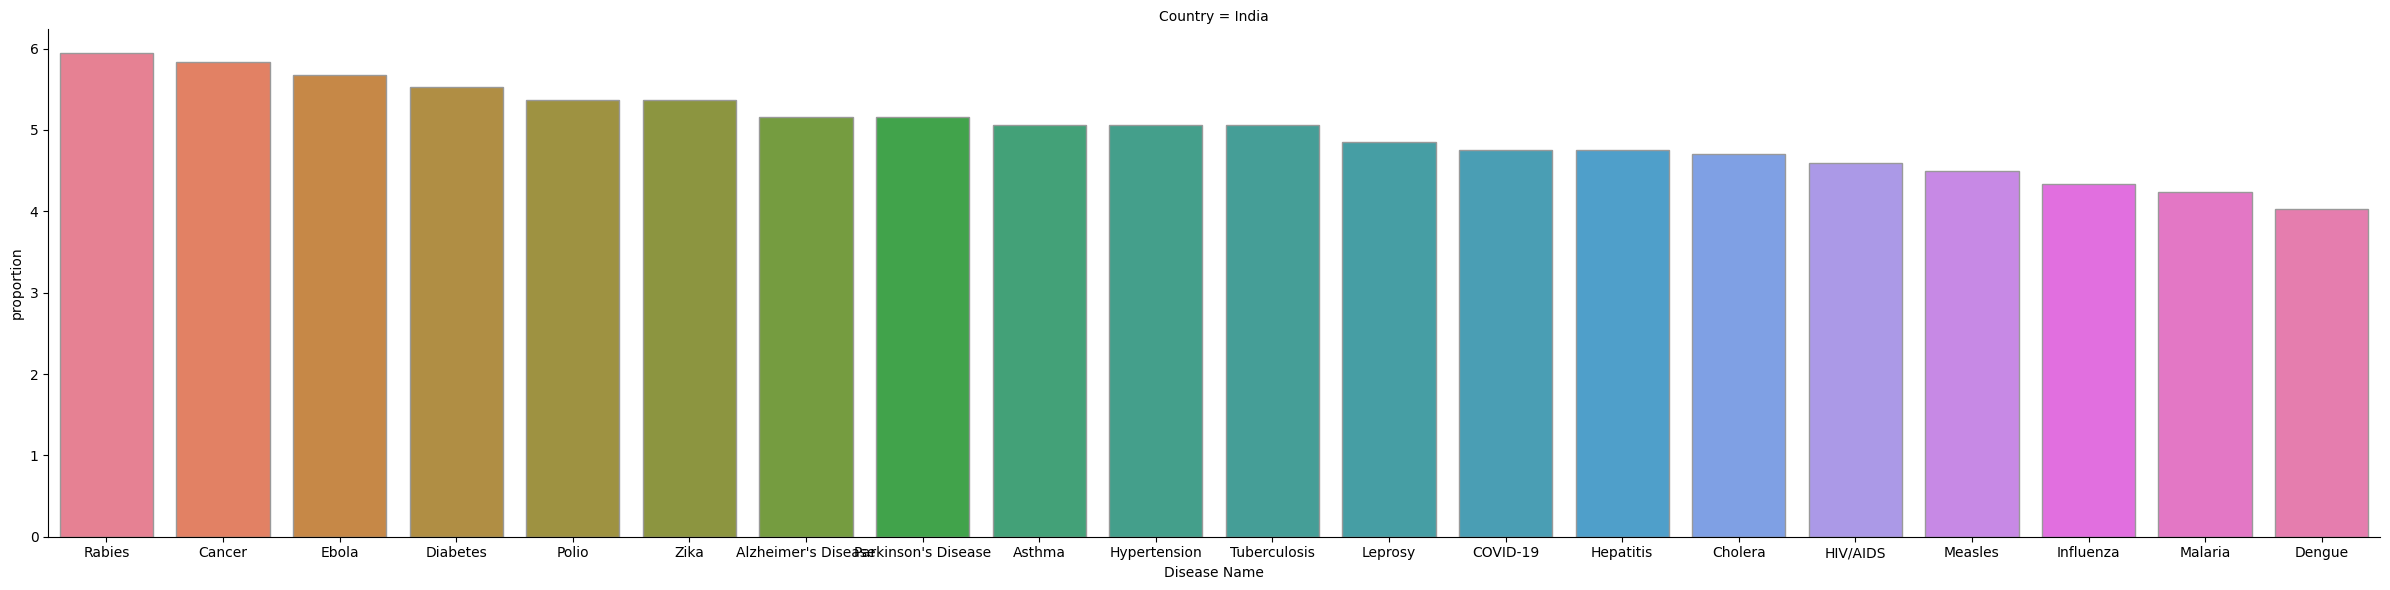

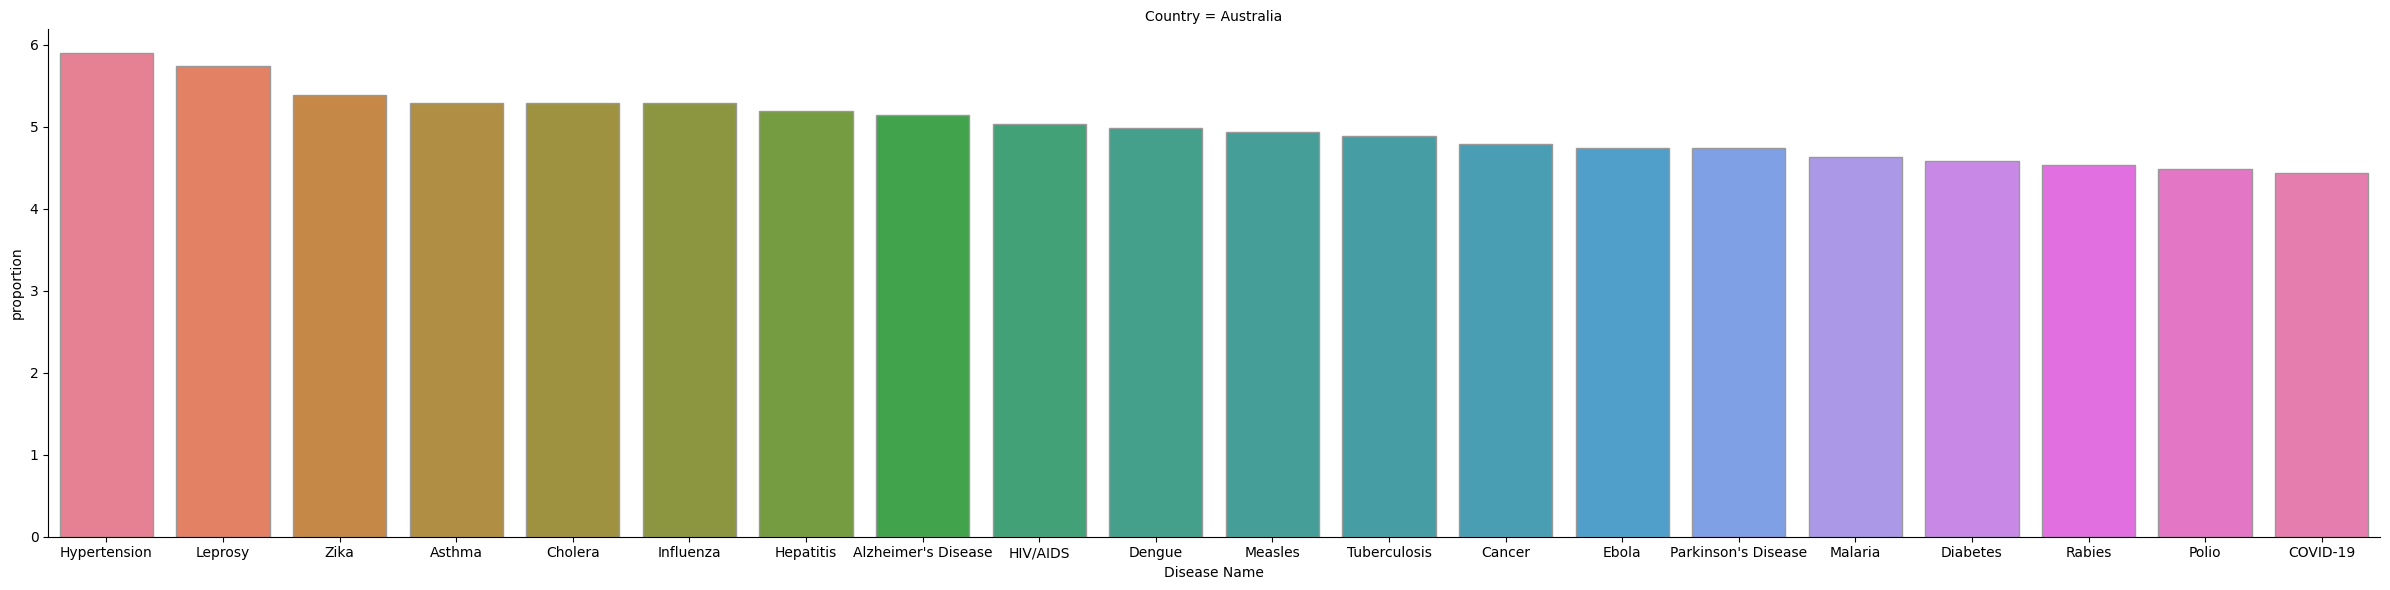

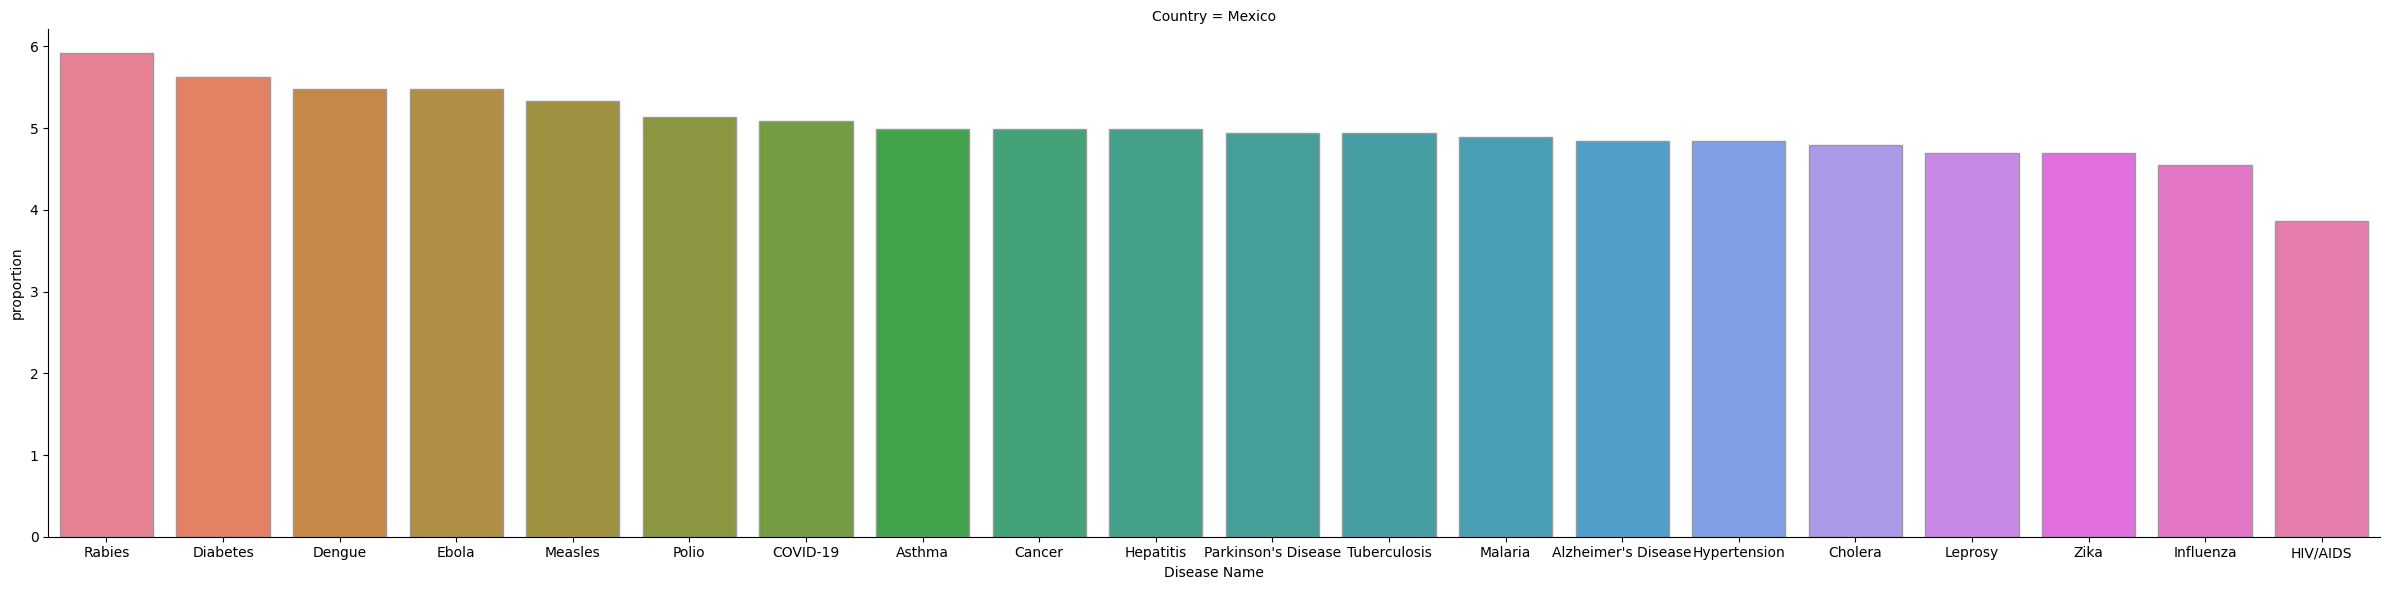

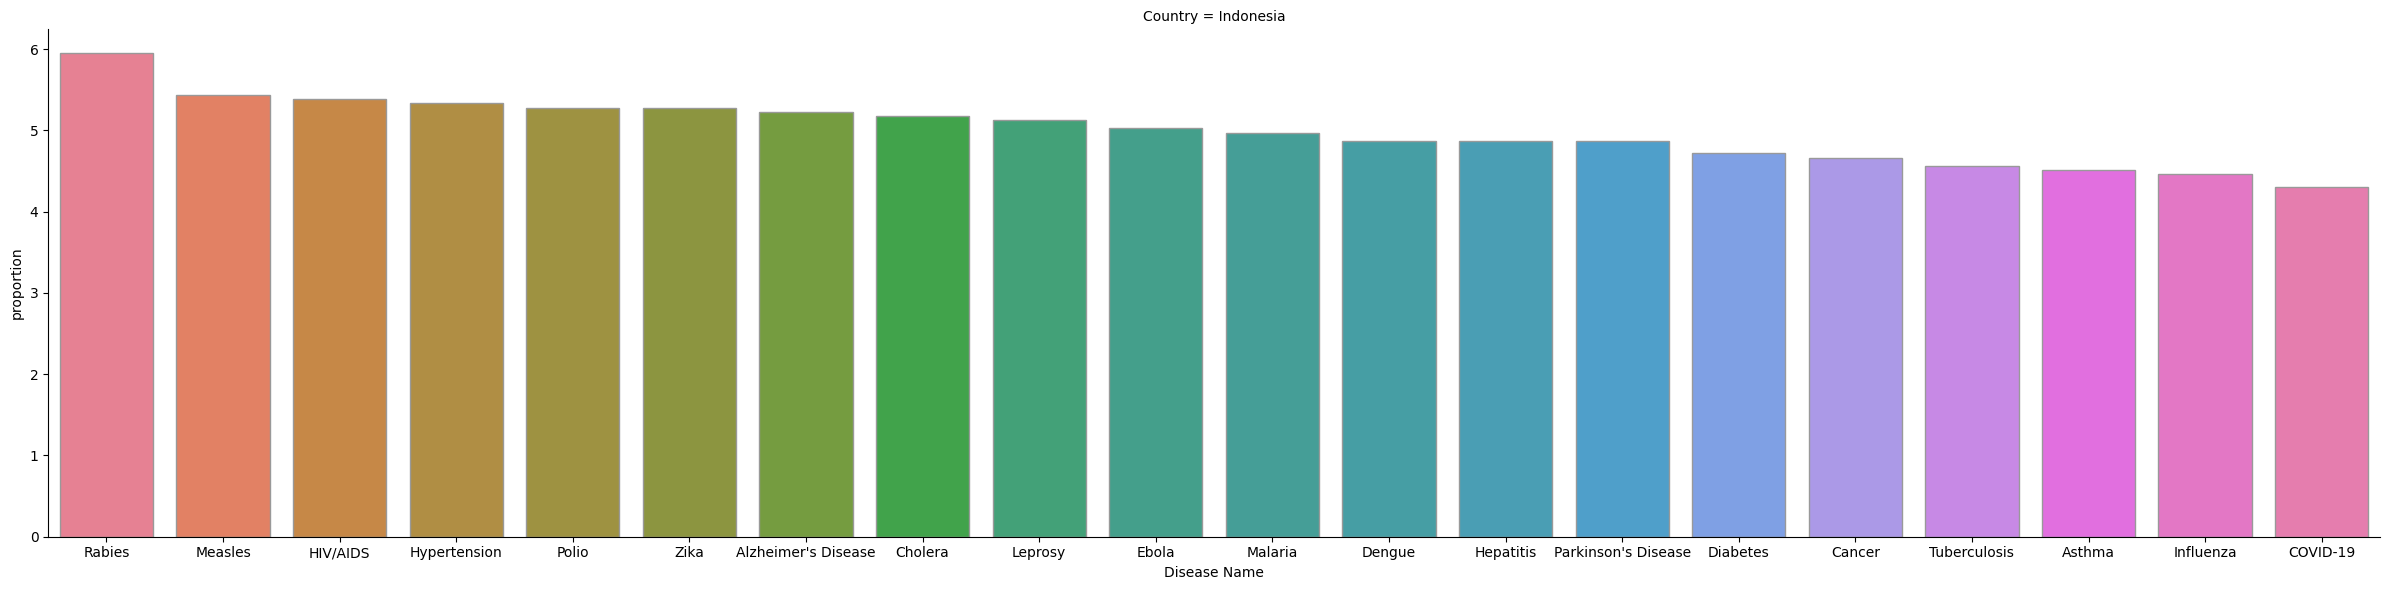

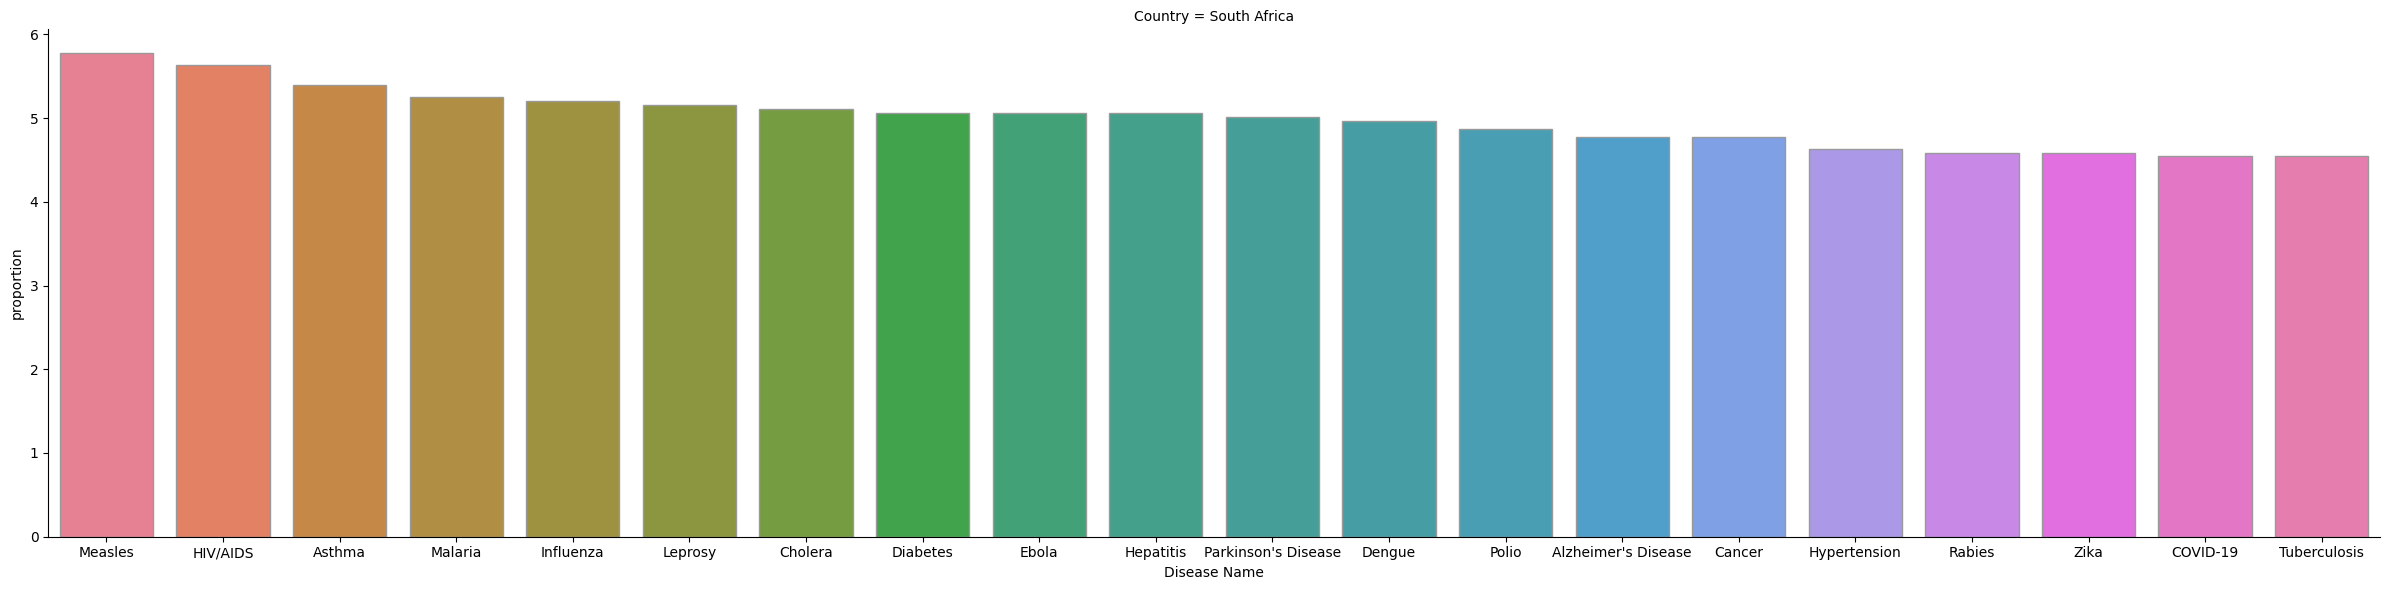

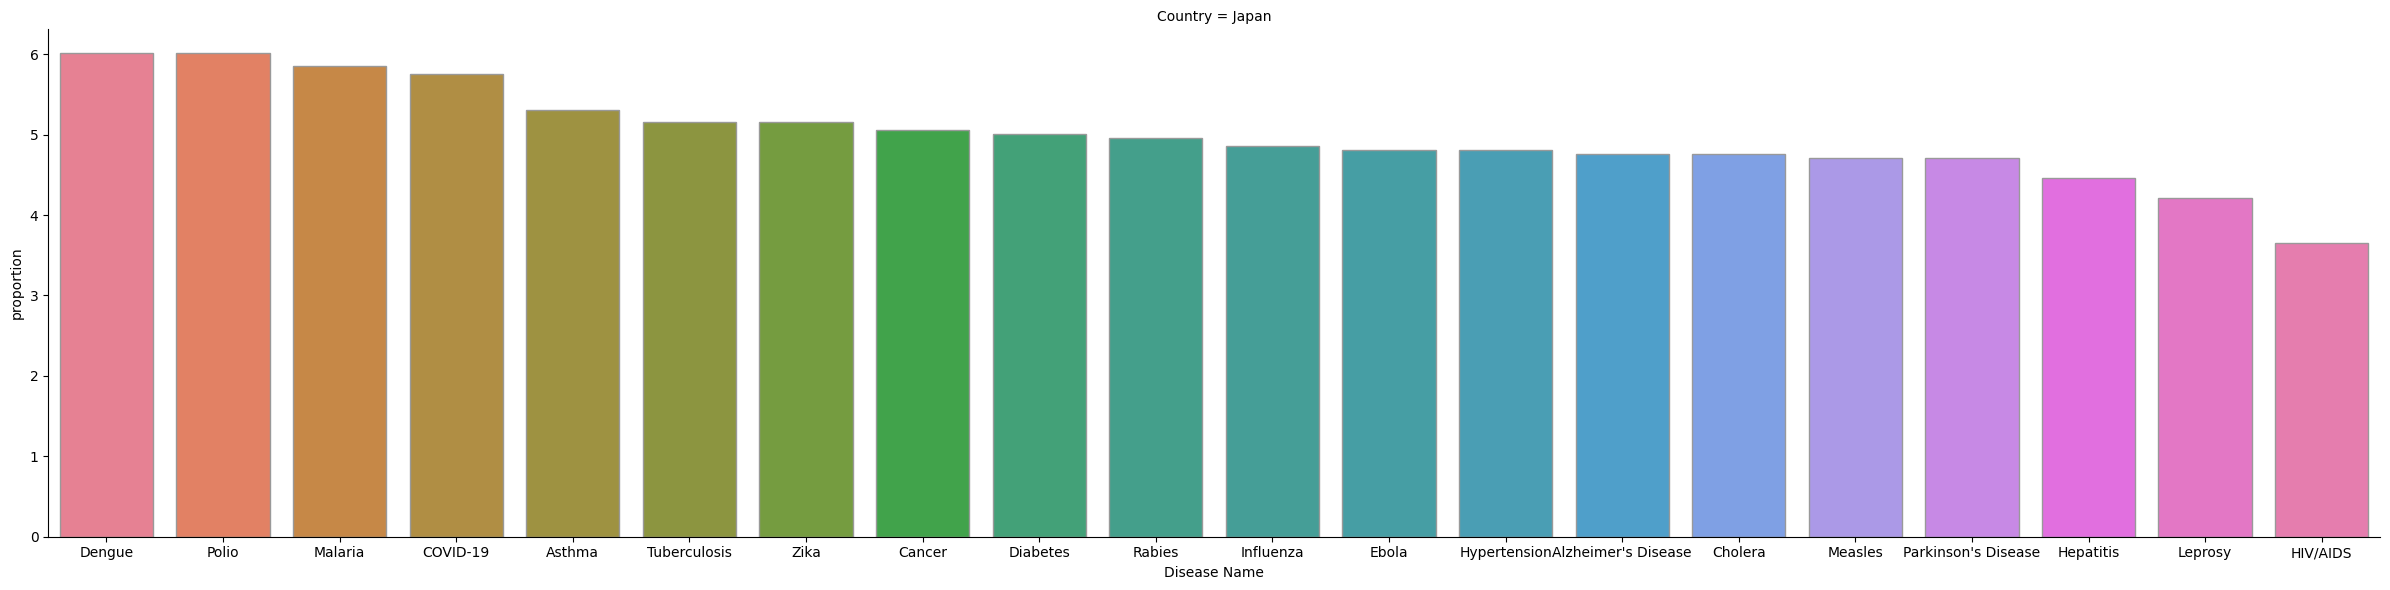

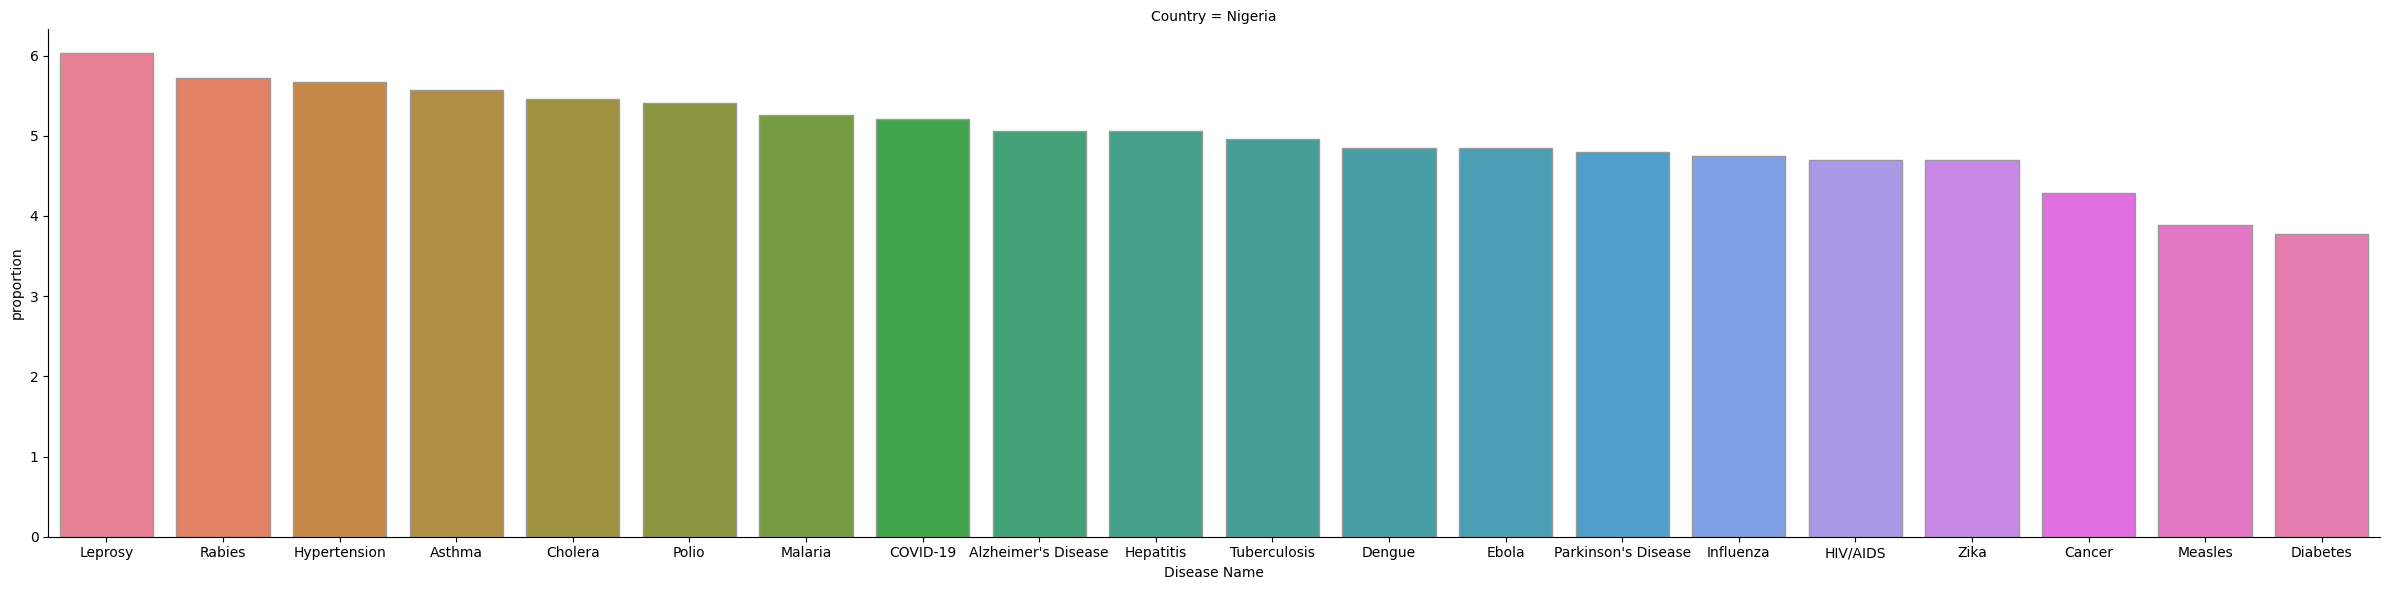

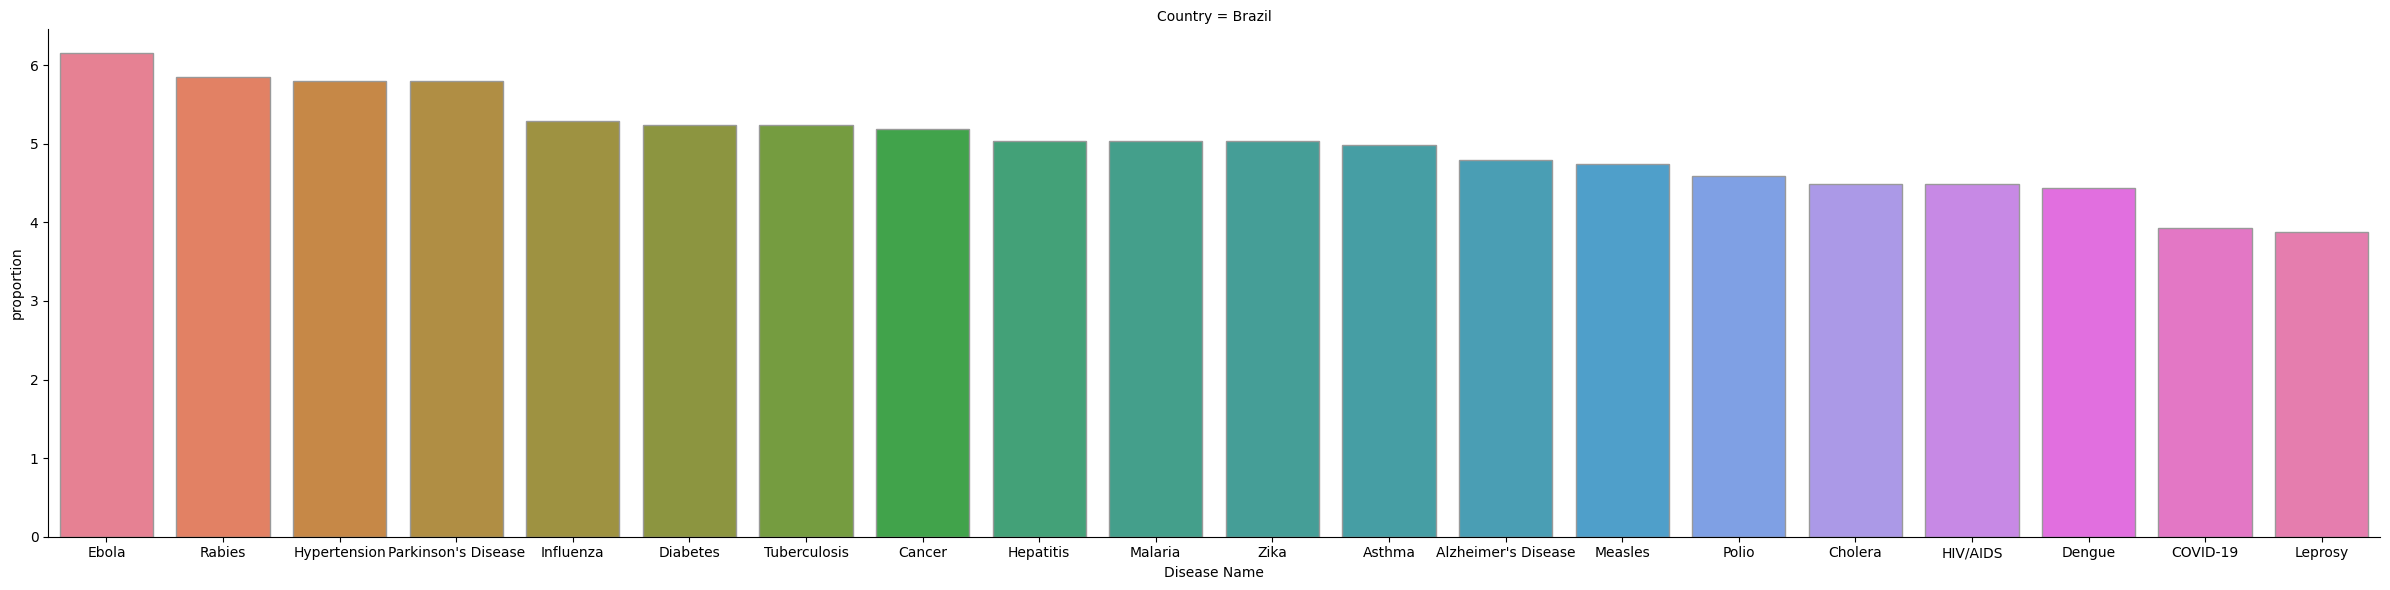

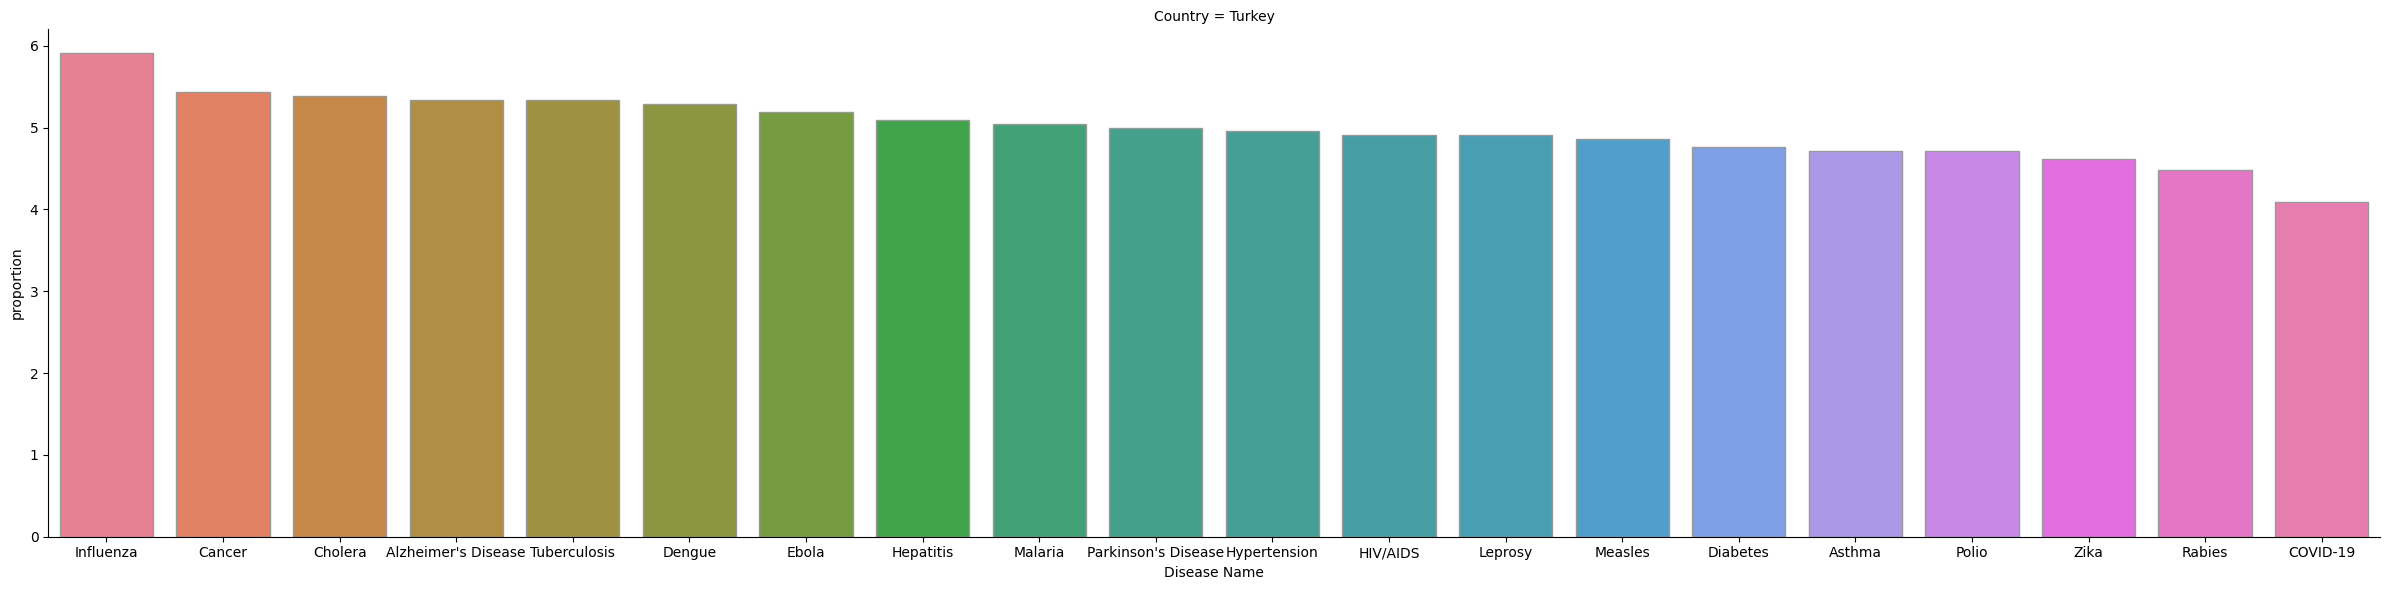

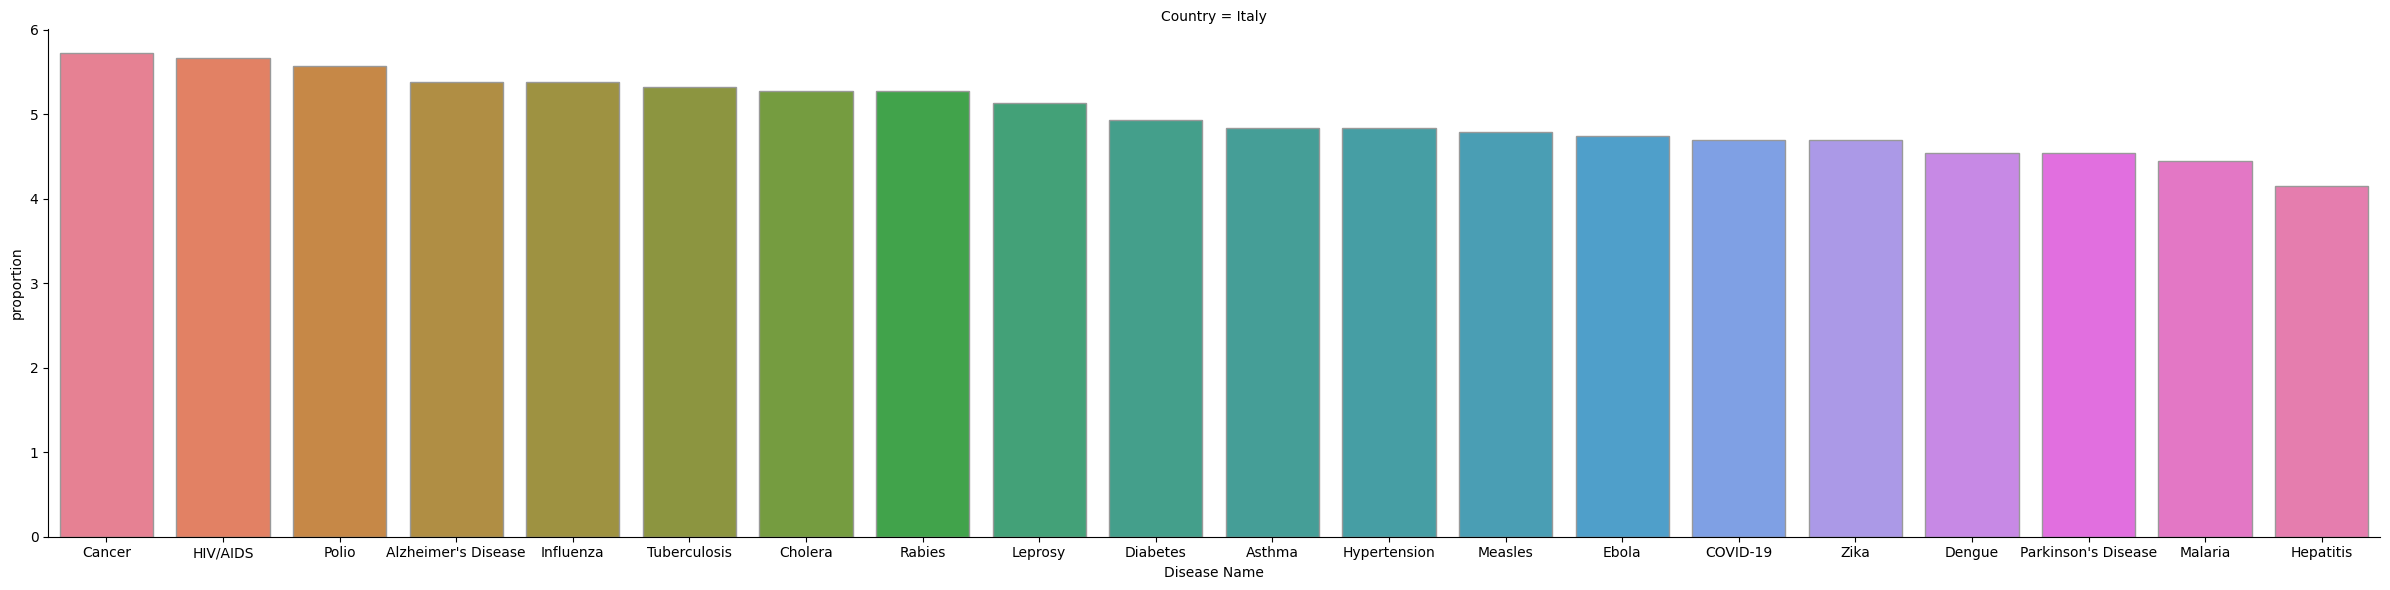

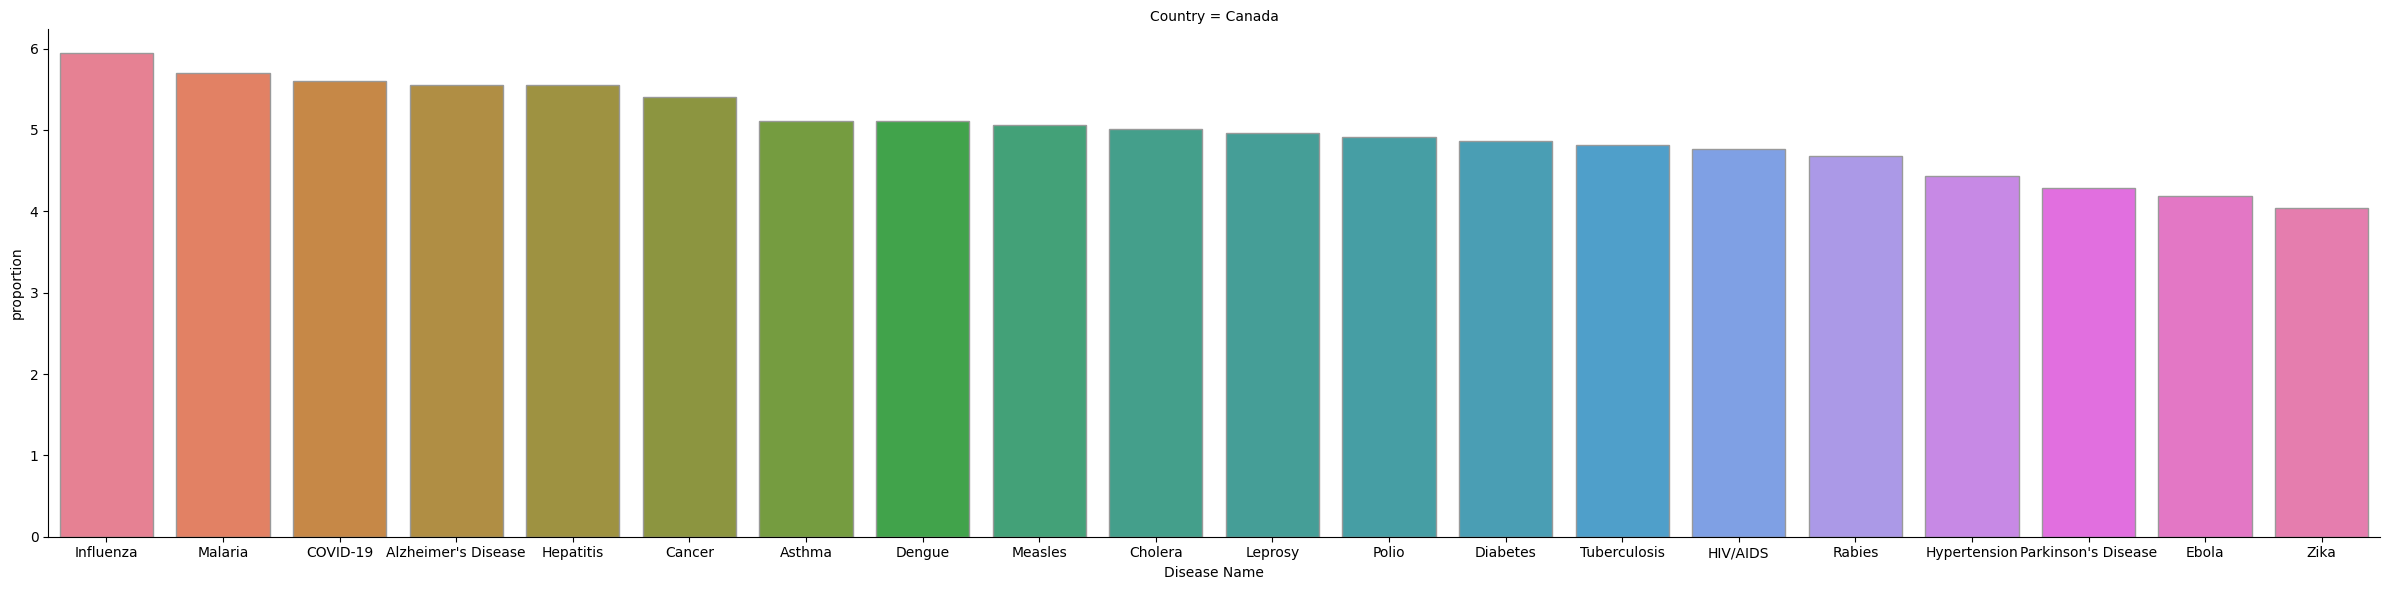

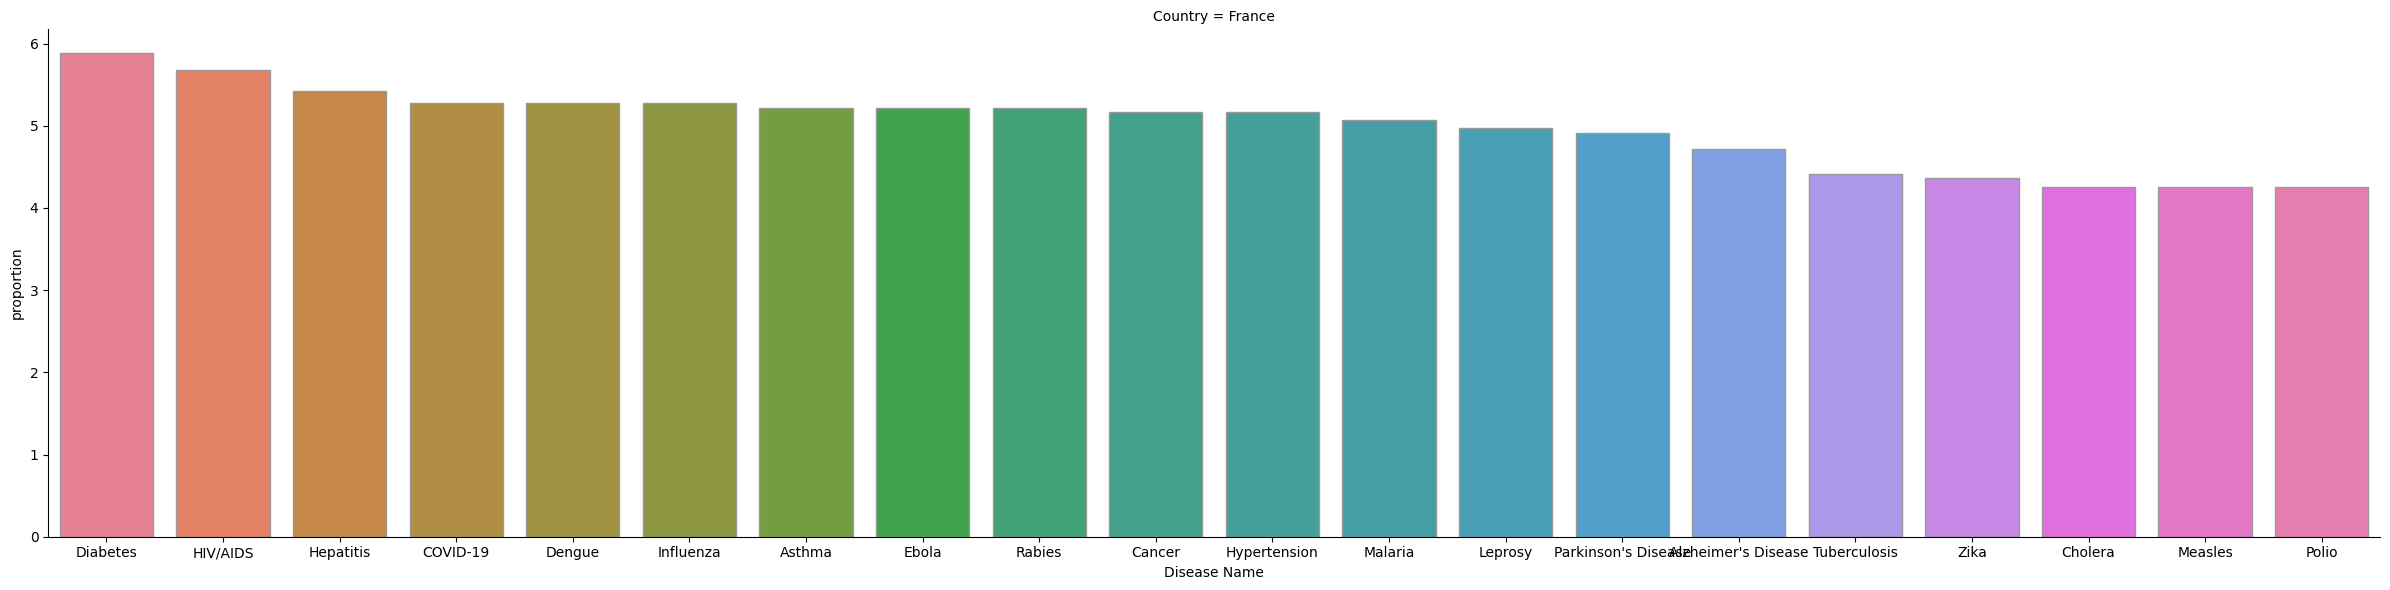

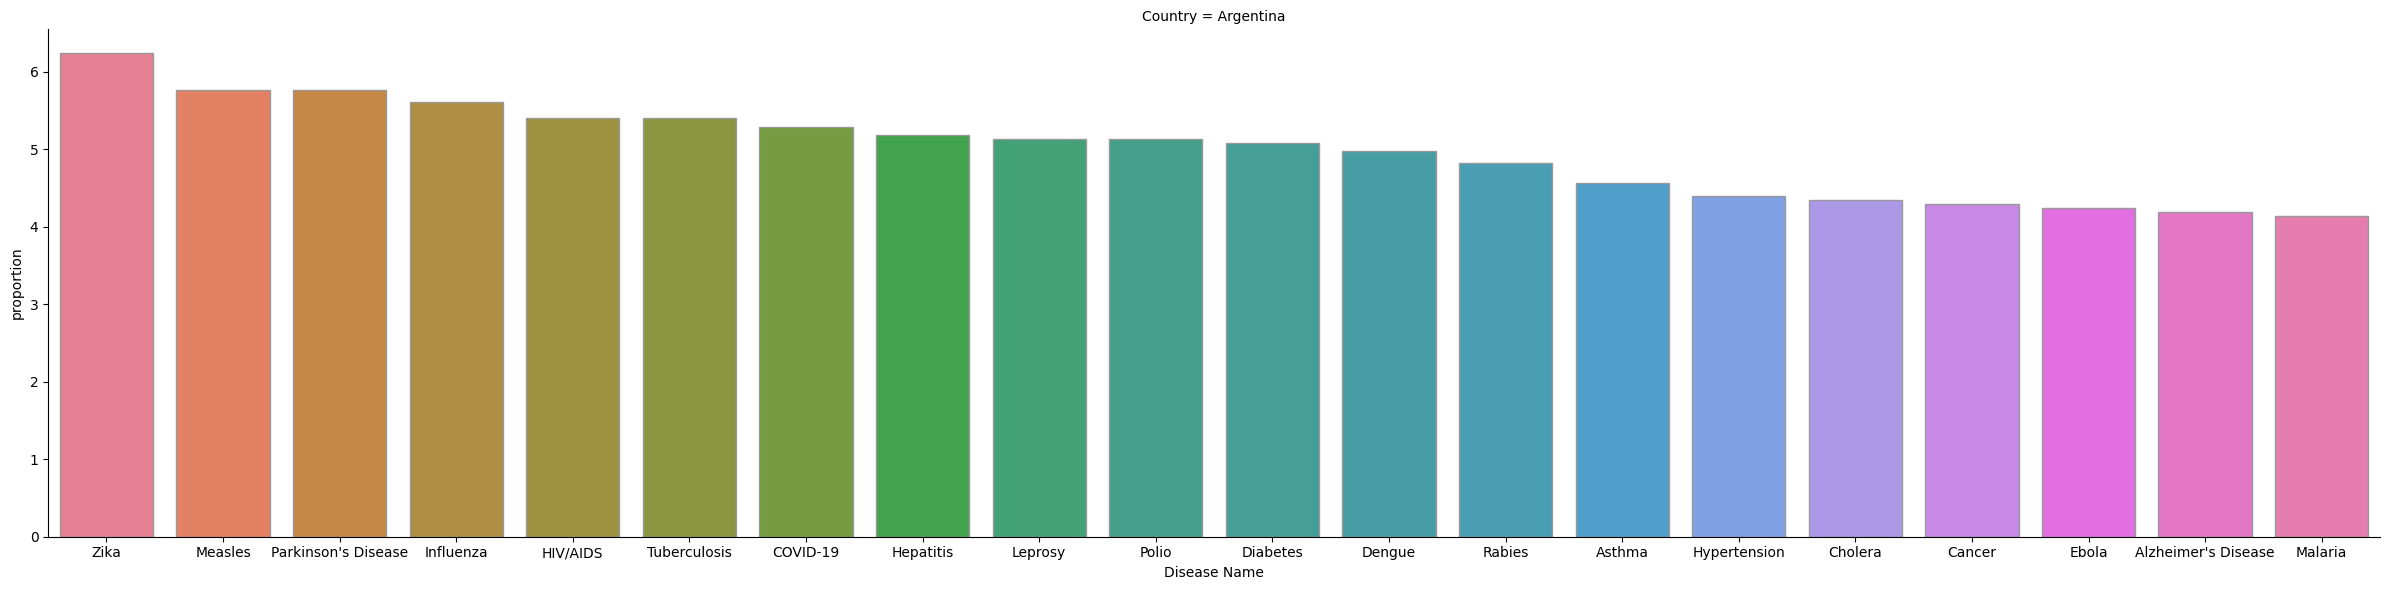

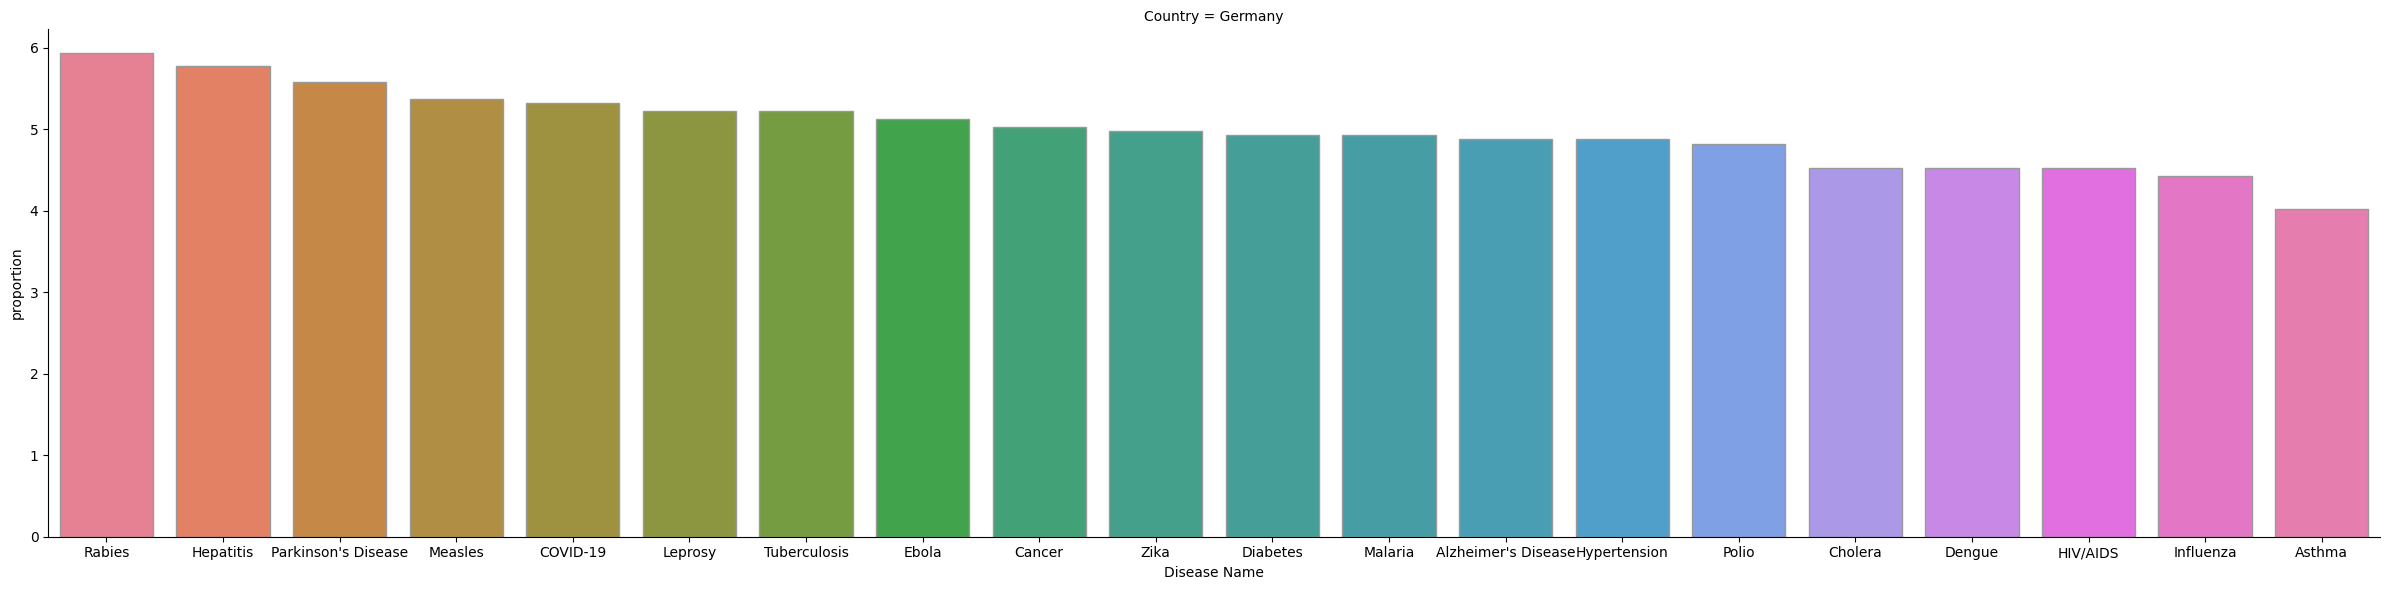

In [ ]:
# Para ello vamos a hacer un bucle en el que vamos a plotear, para los diferentes países, en qué % aparece cada enfermedad

for coly in df_2023["Country"].unique():
      cat_colx = "Disease Name"
      cat_coly = "Country"
      frecuencias_absolutas = df_2023[df_2023["Country"] == coly].groupby(cat_coly, as_index = False)[cat_colx].value_counts()
      frecuencias_relativas = df_2023[df_2023["Country"] == coly].groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize=True)
      
      frecuencias_relativas["proportion"] *= 100
      
      sns.catplot(x = "Disease Name",
                y = "proportion",
                col = "Country",
                hue = "Disease Name",
                kind = "bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
                edgecolor = ".6",
                data = frecuencias_relativas,
                height = 6,    # Ajusta la altura de cada gráfico
                aspect = 4); # Ajusta la relación de aspecto (más ancho que alto)

proporcion_enfermedad_pais = df_2023.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True).values


In [48]:
for valor in proporcion_enfermedad_pais:
    print(valor)

['Argentina' 'Zika' 0.062368972746331235]
['Argentina' 'Measles' 0.057651991614255764]
['Argentina' "Parkinson's Disease" 0.057651991614255764]
['Argentina' 'Influenza' 0.05607966457023061]
['Argentina' 'HIV/AIDS' 0.053983228511530396]
['Argentina' 'Tuberculosis' 0.053983228511530396]
['Argentina' 'COVID-19' 0.05293501048218029]
['Argentina' 'Hepatitis' 0.05188679245283019]
['Argentina' 'Leprosy' 0.051362683438155136]
['Argentina' 'Polio' 0.051362683438155136]
['Argentina' 'Diabetes' 0.05083857442348008]
['Argentina' 'Dengue' 0.04979035639412998]
['Argentina' 'Rabies' 0.04821802935010482]
['Argentina' 'Asthma' 0.04559748427672956]
['Argentina' 'Hypertension' 0.0440251572327044]
['Argentina' 'Cholera' 0.04350104821802935]
['Argentina' 'Cancer' 0.0429769392033543]
['Argentina' 'Ebola' 0.04245283018867924]
['Argentina' "Alzheimer's Disease" 0.041928721174004195]
['Argentina' 'Malaria' 0.04140461215932914]
['Australia' 'Hypertension' 0.05894206549118388]
['Australia' 'Leprosy' 0.0574307304

*Las enfermedades que prevalencen en cada país, aunque no por mucho, serían:

Argentina:
- Zika: 6.24%
- Measles: 5.88%
- Parkinson's Disease: 5.77%

Australia:
- Leprosy: 0.05743073047858942]
- Zika: 0.05390428211586902]
- Asthma: 0.05289672544080604]

Brasil:
['Brazil' 'Ebola' 0.06149193548387097]
['Brazil' 'Rabies' 0.05846774193548387]
['Brazil' 'Hypertension' 0.05796370967741935]

Canada:
['Canada' 'Influenza' 0.05939629990262902]
['Canada' 'Malaria' 0.056962025316455694]
['Canada' 'COVID-19' 0.05598831548198637]

China:
['China' 'Cholera' 0.05968778696051423]
['China' 'Cancer' 0.05831037649219467]
['China' 'Ebola' 0.05509641873278237]

Francia:
['France' 'Diabetes' 0.05879371515458692]
['France' 'HIV/AIDS' 0.05676634566649772]
['France' 'Hepatitis' 0.05423213380638622]

['Germany' 'Rabies' 0.0592964824120603]
['Germany' 'Hepatitis' 0.05778894472361809]
['Germany' "Parkinson's Disease" 0.05577889447236181]

['India' 'Rabies' 0.059400826446280995]
['India' 'Cancer' 0.05836776859504132]
['India' 'Ebola' 0.056818181818181816]

['Indonesia' 'Rabies' 0.05945668887749872]
['Indonesia' 'Measles' 0.05433111225012814]
['Indonesia' 'HIV/AIDS' 0.053818554587391085]

['Italy' 'Cancer' 0.05721271393643032]
['Italy' 'HIV/AIDS' 0.05672371638141809]
['Italy' 'Polio' 0.05574572127139364]

['Japan' 'Dengue' 0.06009013520280421]
['Japan' 'Polio' 0.06009013520280421]
['Japan' 'Malaria' 0.058587881822734104]

['Mexico' 'Rabies' 0.05913978494623656]
['Mexico' 'Diabetes' 0.056207233626588464]
['Mexico' 'Dengue' 0.05474095796676442]

['Nigeria' 'Leprosy' 0.0602655771195097]
['Nigeria' 'Rabies' 0.05720122574055159]
['Nigeria' 'Hypertension' 0.05669050051072523]

['Russia' 'Hepatitis' 0.06268806419257773]
['Russia' "Parkinson's Disease" 0.058676028084252756]
['Russia' 'Malaria' 0.05667001003009027]

['Saudi Arabia' 'Zika' 0.05783009211873081]
['Saudi Arabia' 'Dengue' 0.05578300921187308]
['Saudi Arabia' 'HIV/AIDS' 0.05578300921187308]

['South Africa' 'Measles' 0.05771050141911069]
['South Africa' 'HIV/AIDS' 0.056291390728476824]
['South Africa' 'Asthma' 0.05392620624408704]

['South Korea' 'HIV/AIDS' 0.057814796668299855]
['South Korea' 'Cancer' 0.056344928956393925]
['South Korea' 'Dengue' 0.05585497305242528]

['Turkey' 'Influenza' 0.05904761904761905]
['Turkey' 'Cancer' 0.054285714285714284]
['Turkey' 'Cholera' 0.05380952380952381]

['UK' 'Cancer' 0.05844155844155844]
['UK' 'Dengue' 0.05844155844155844]
['UK' 'Ebola' 0.054945054945054944]

['USA' 'Leprosy' 0.06201550387596899]
['USA' 'Diabetes' 0.05910852713178295]
['USA' "Alzheimer's Disease" 0.05862403100775194]

#### RESPUESTA PREGUNTA 2


*Vamos a obtener la respuesta a la segunda hipótesis: "¿Cuáles son los tipos de transmisión de enfermedades que prevalencen en cada país?"*

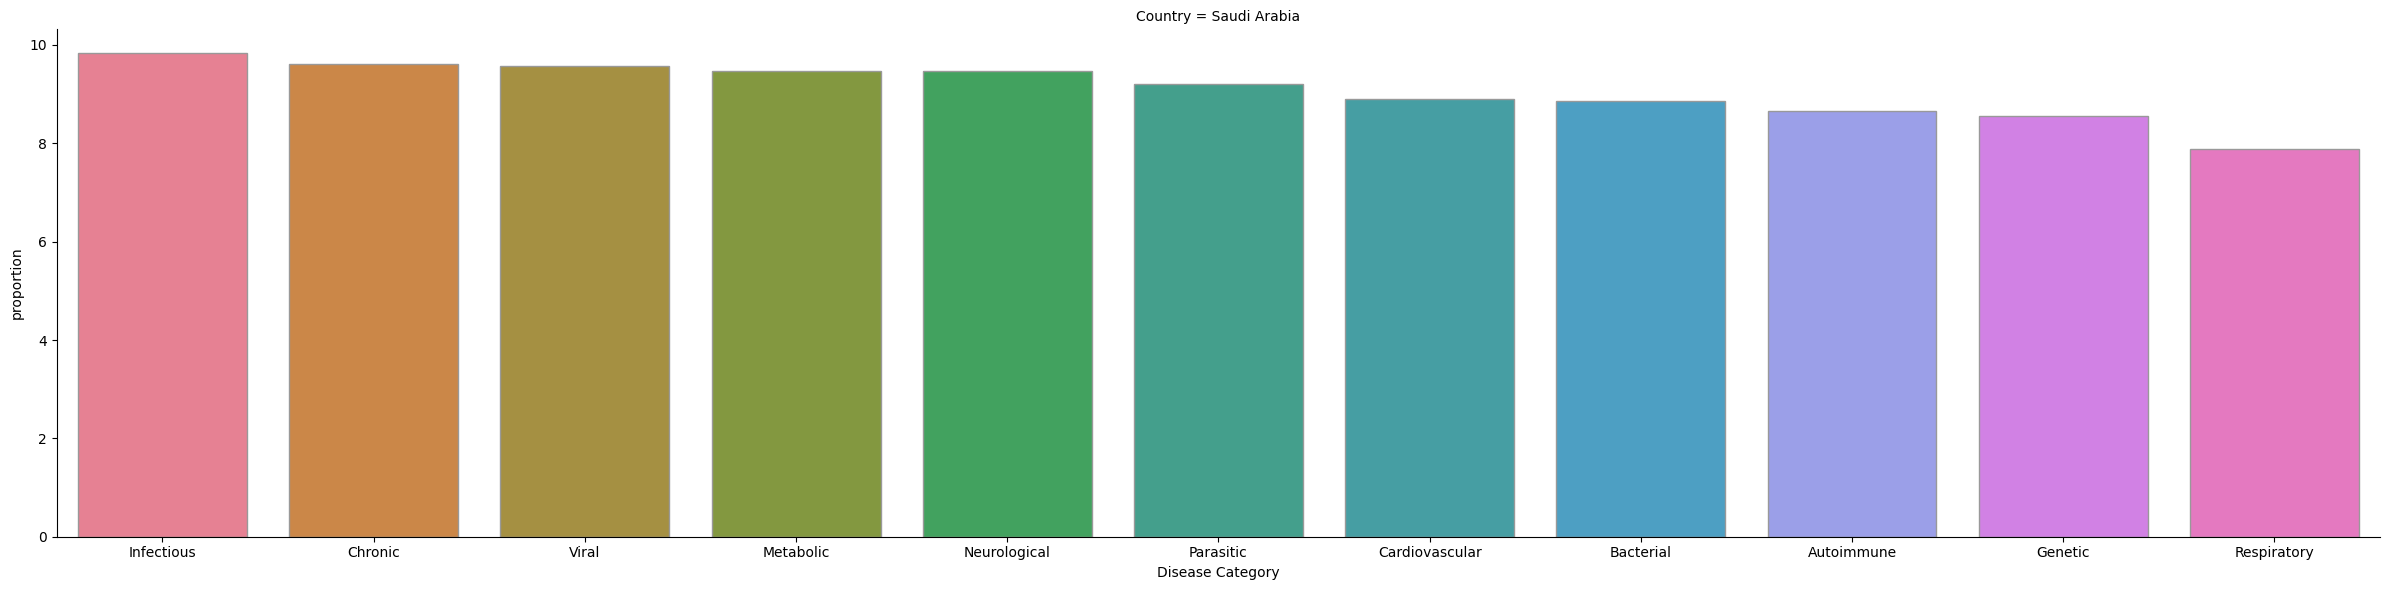

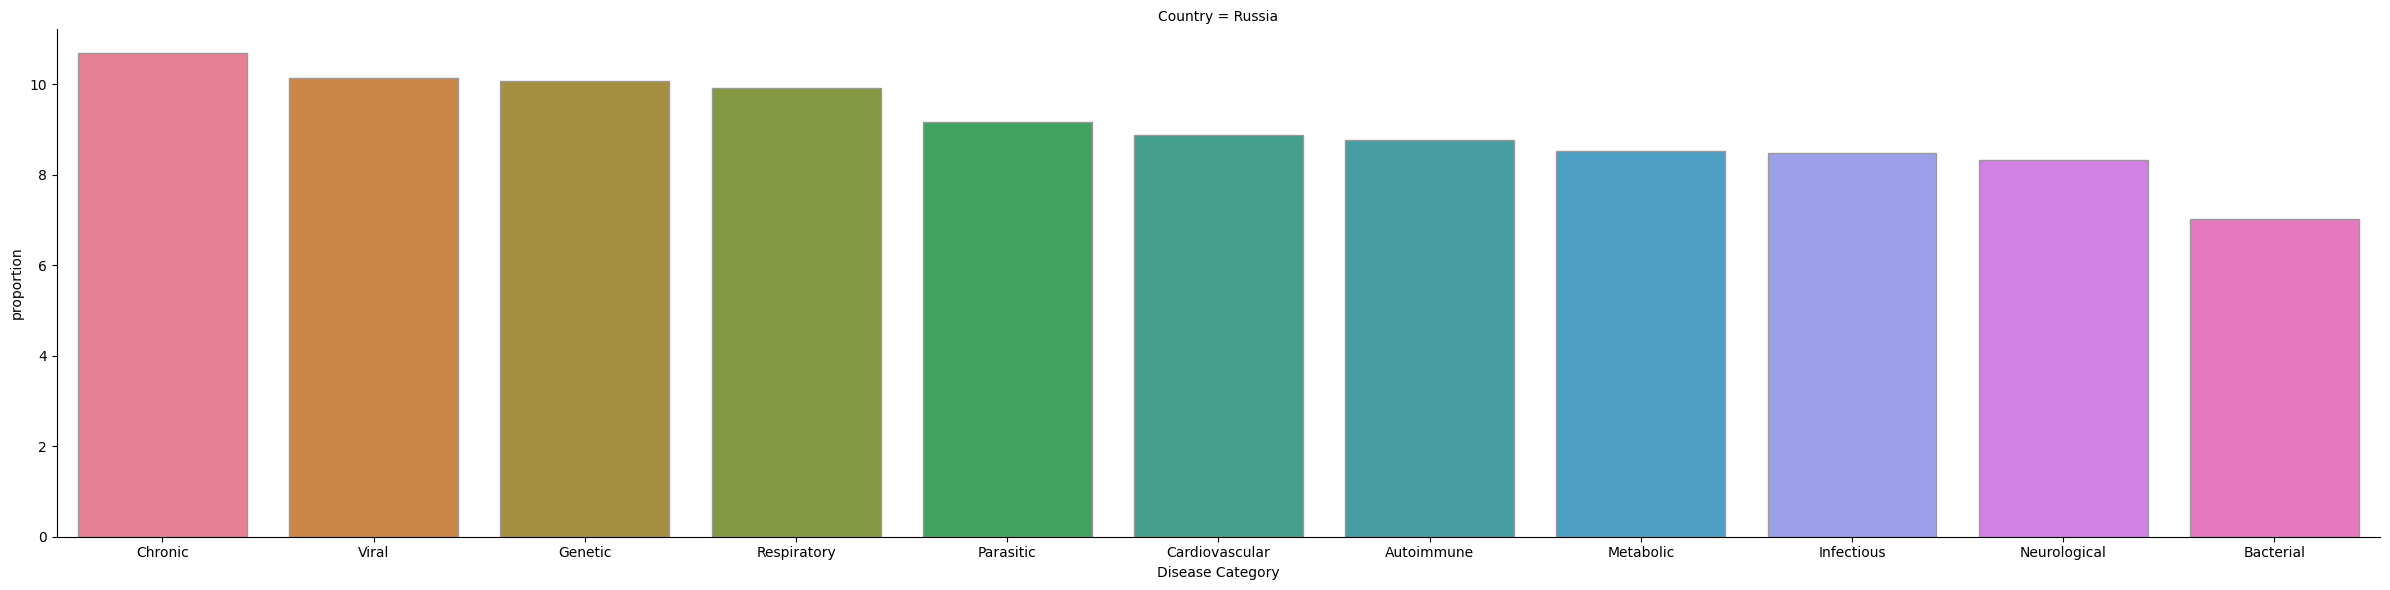

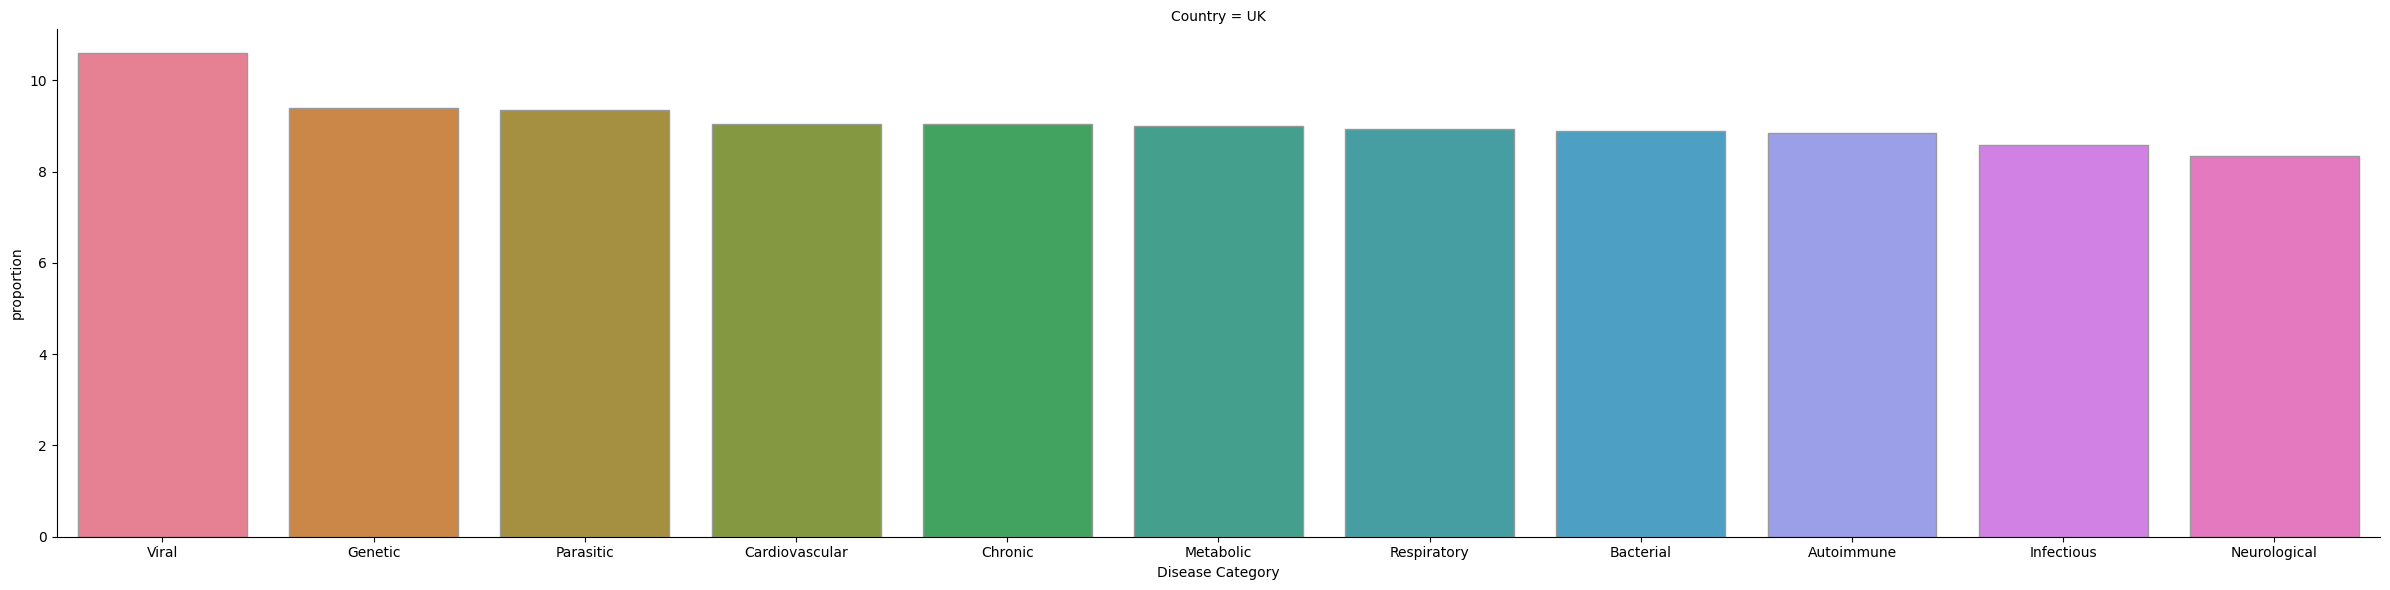

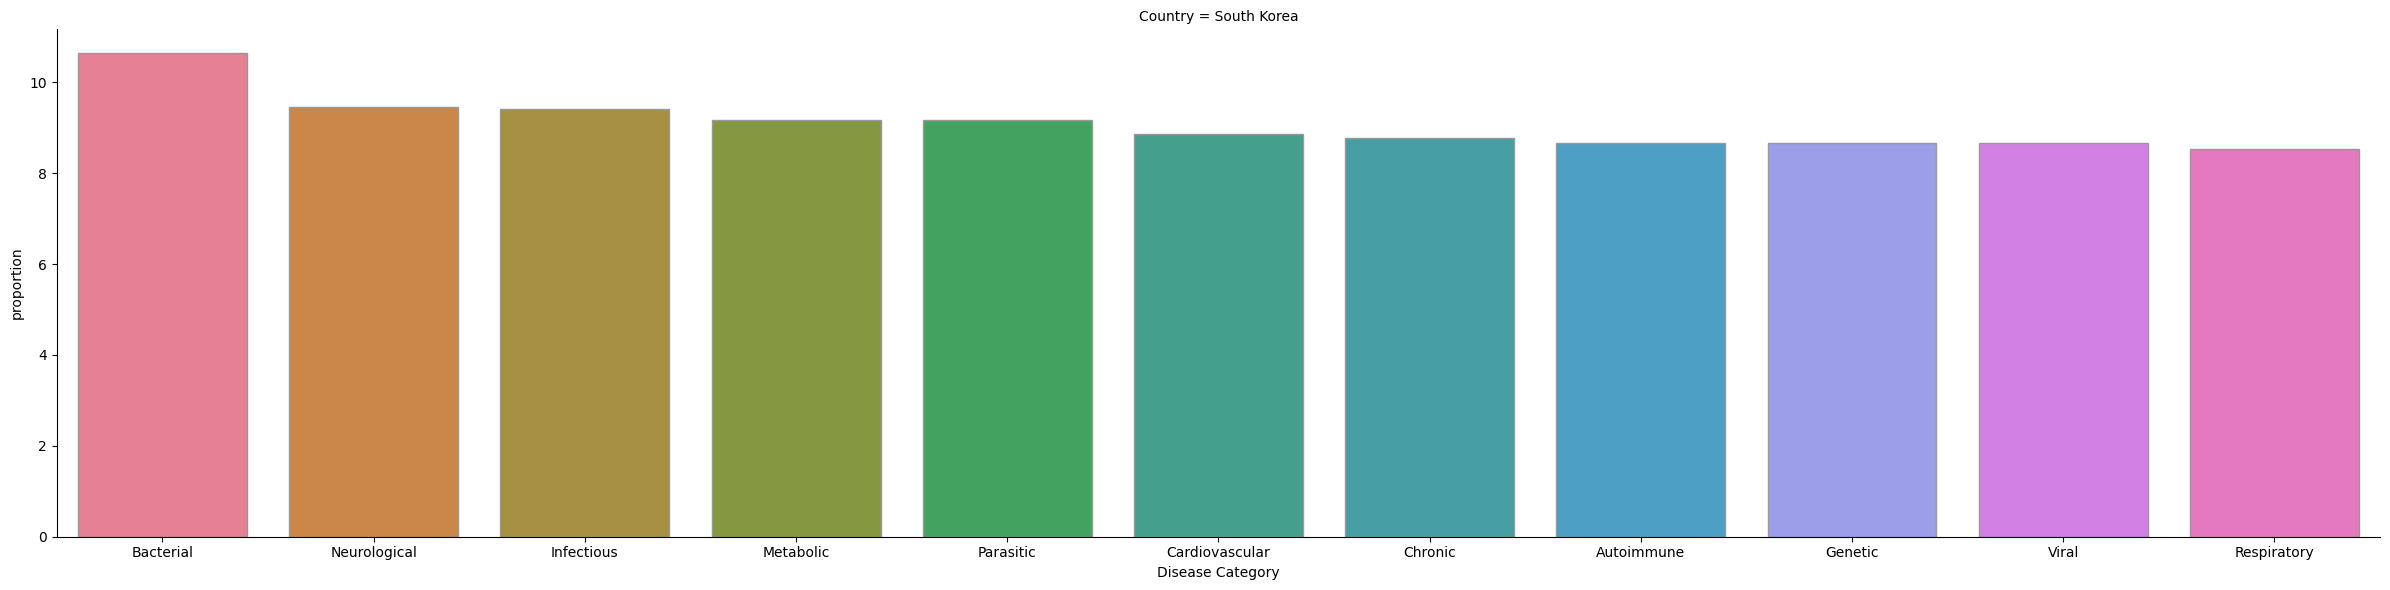

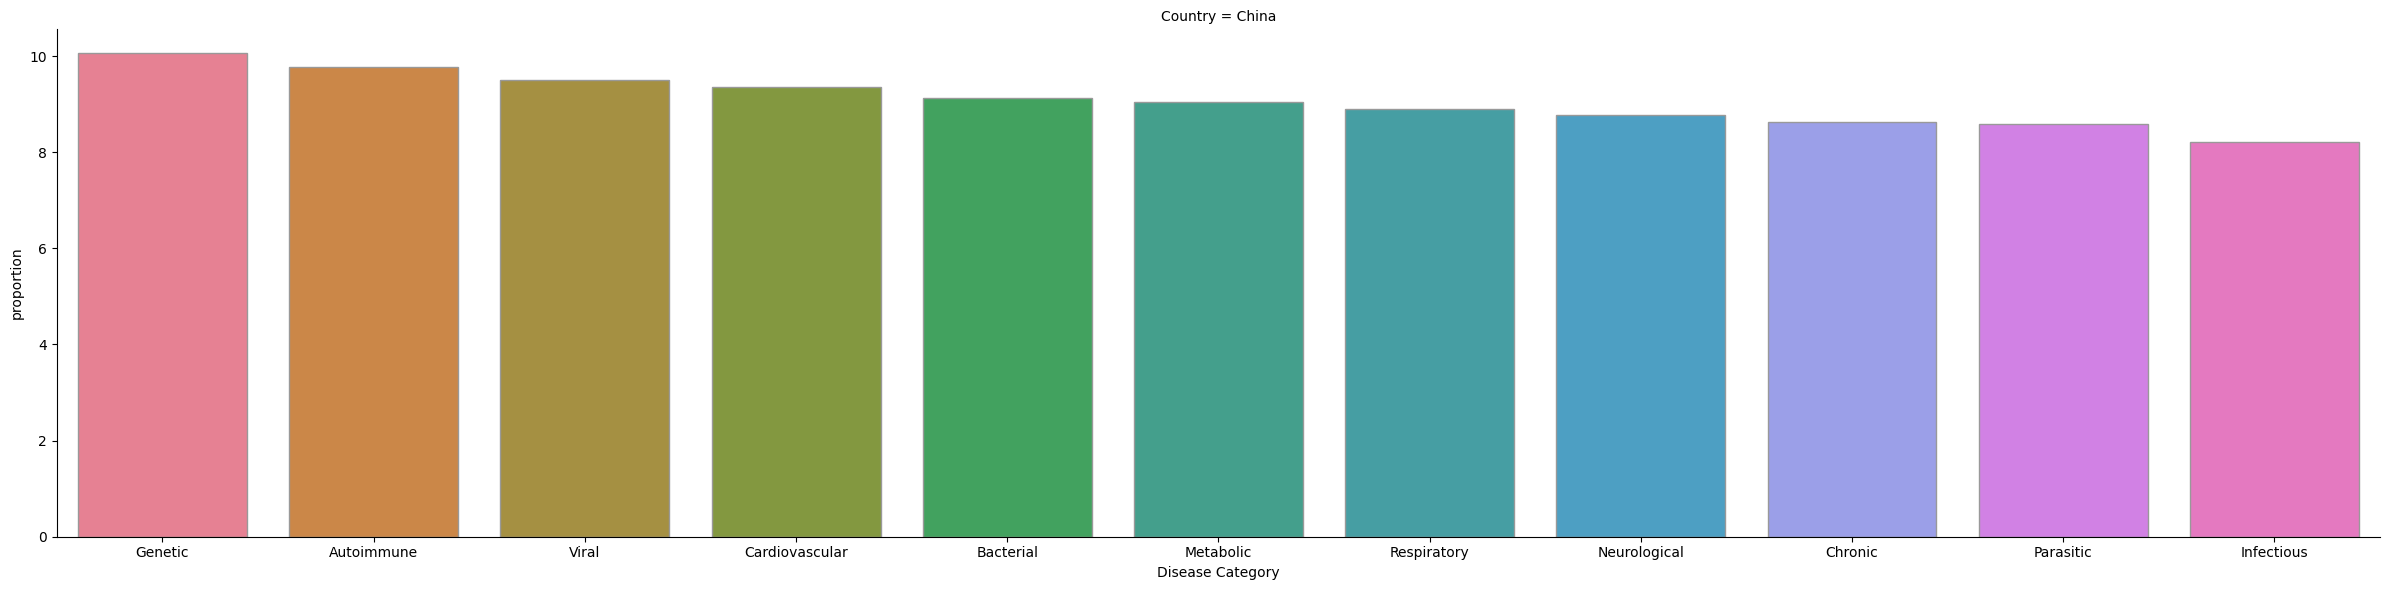

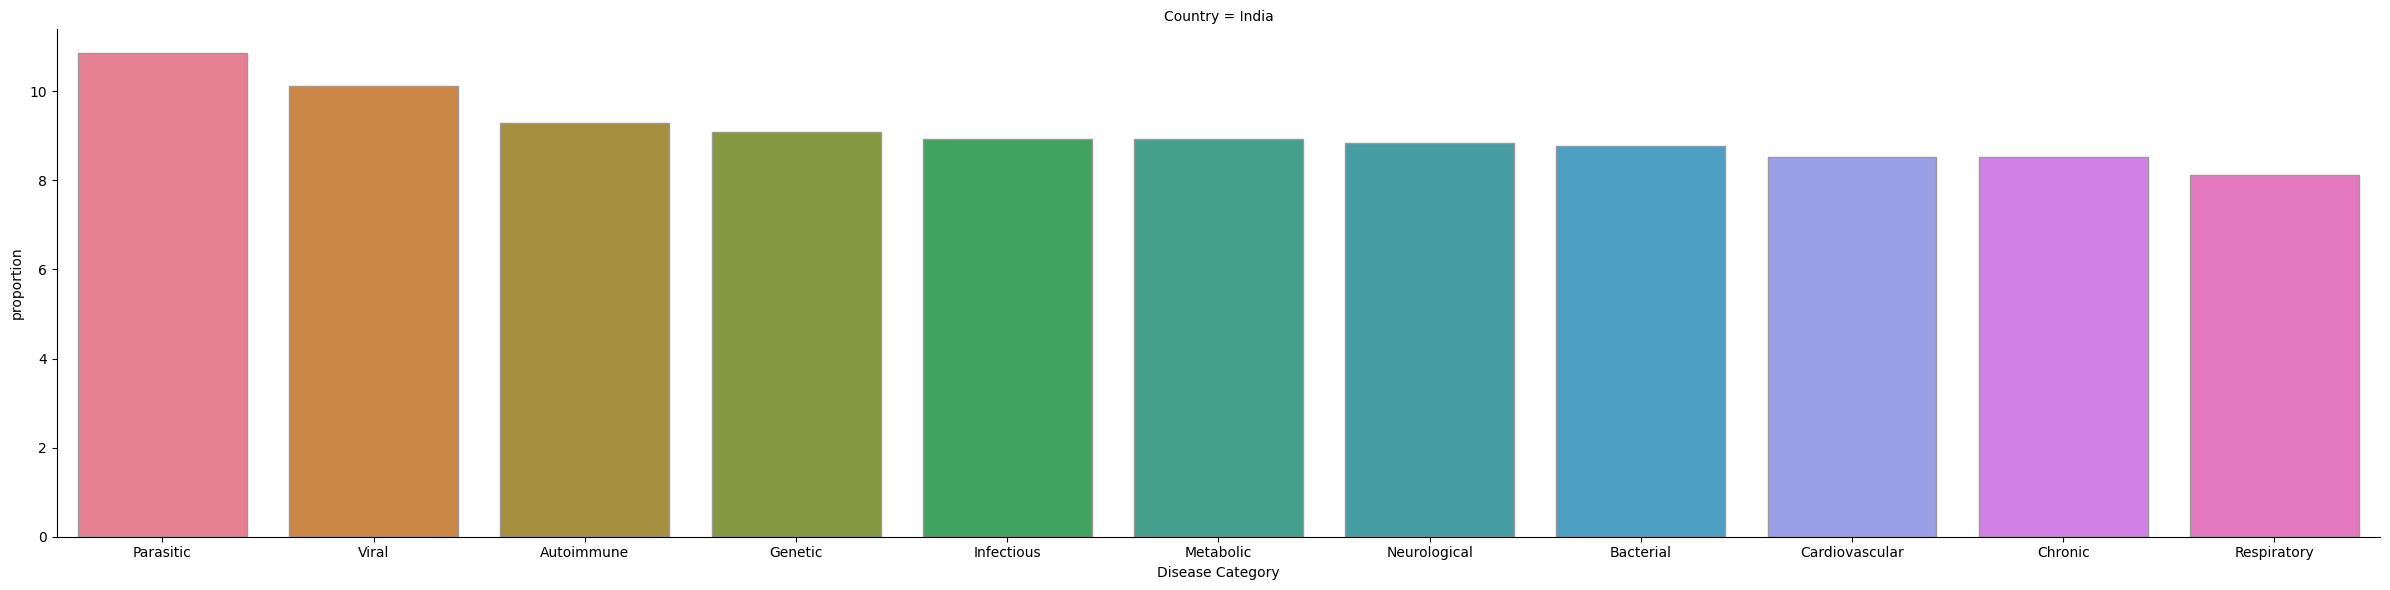

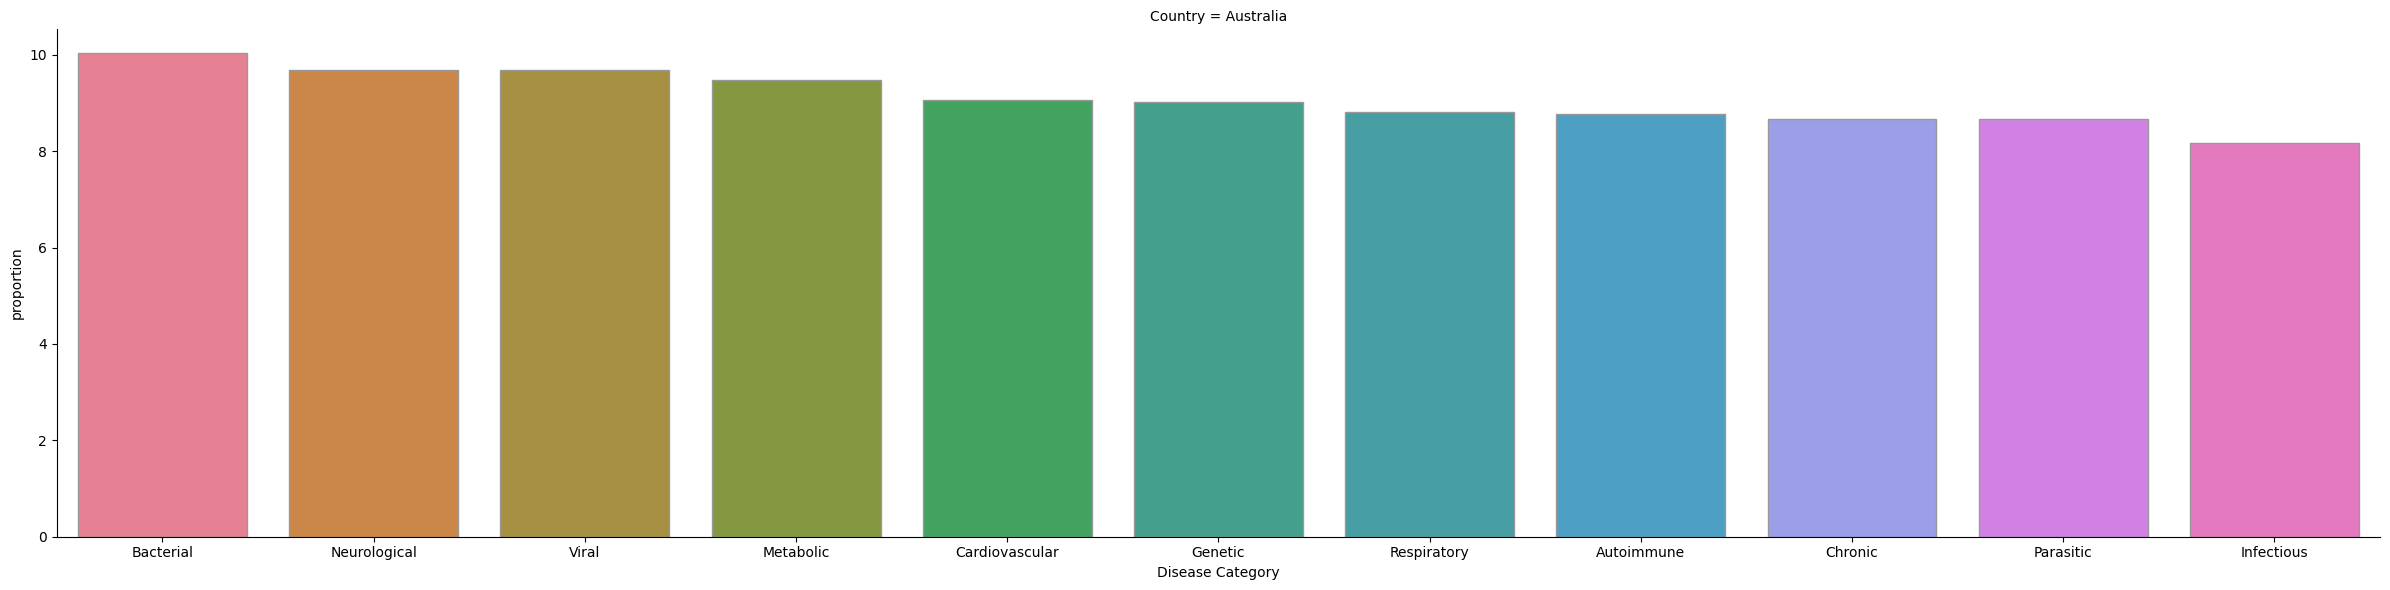

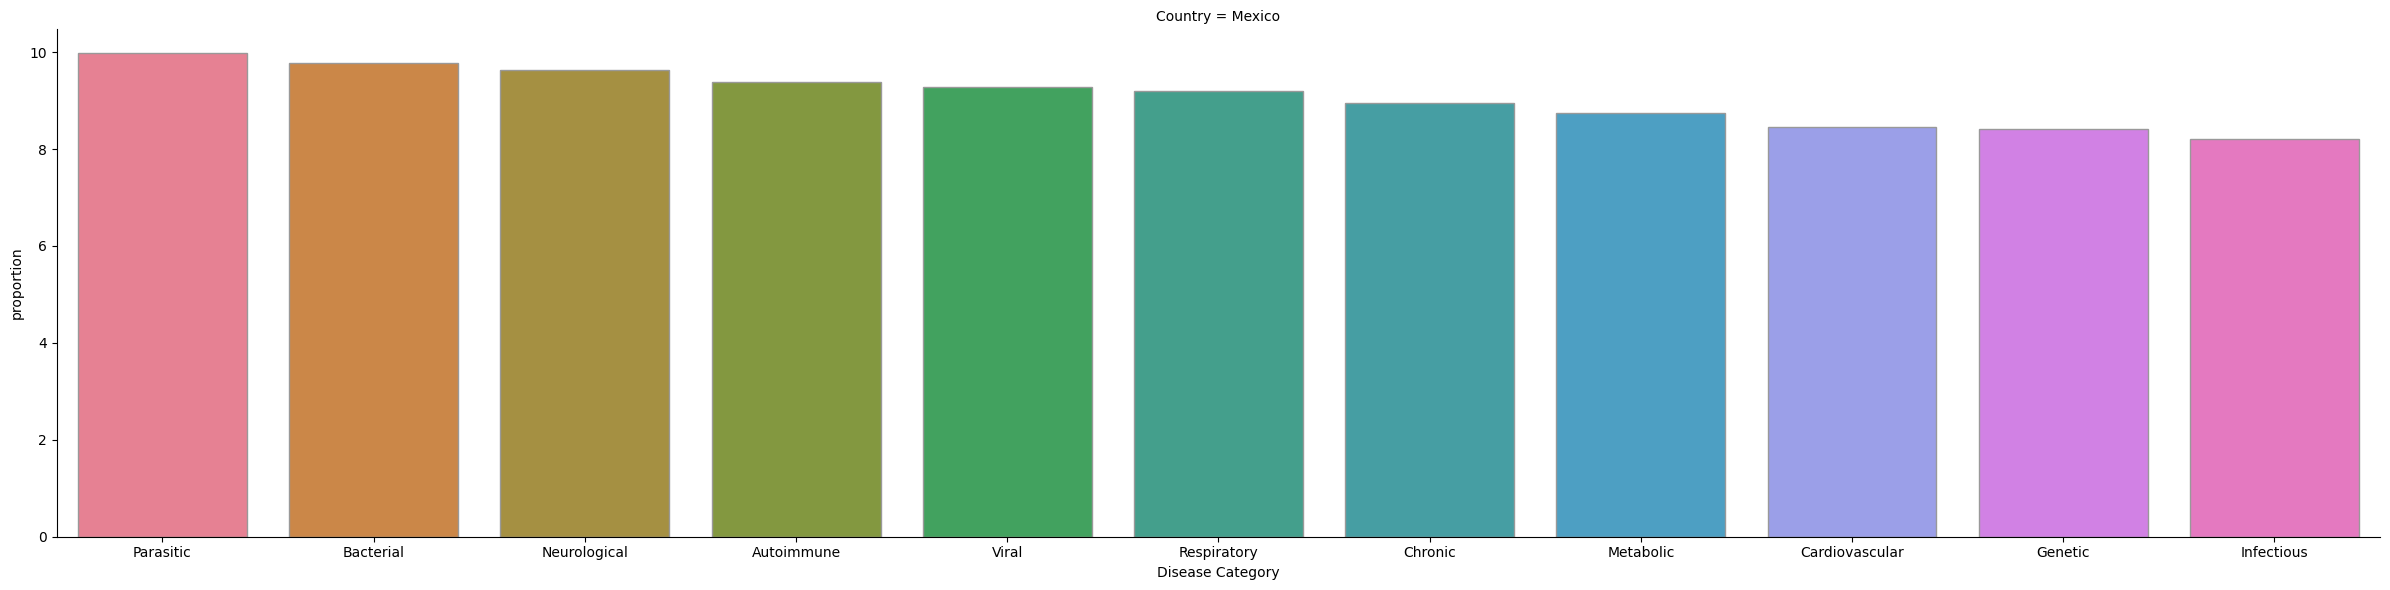

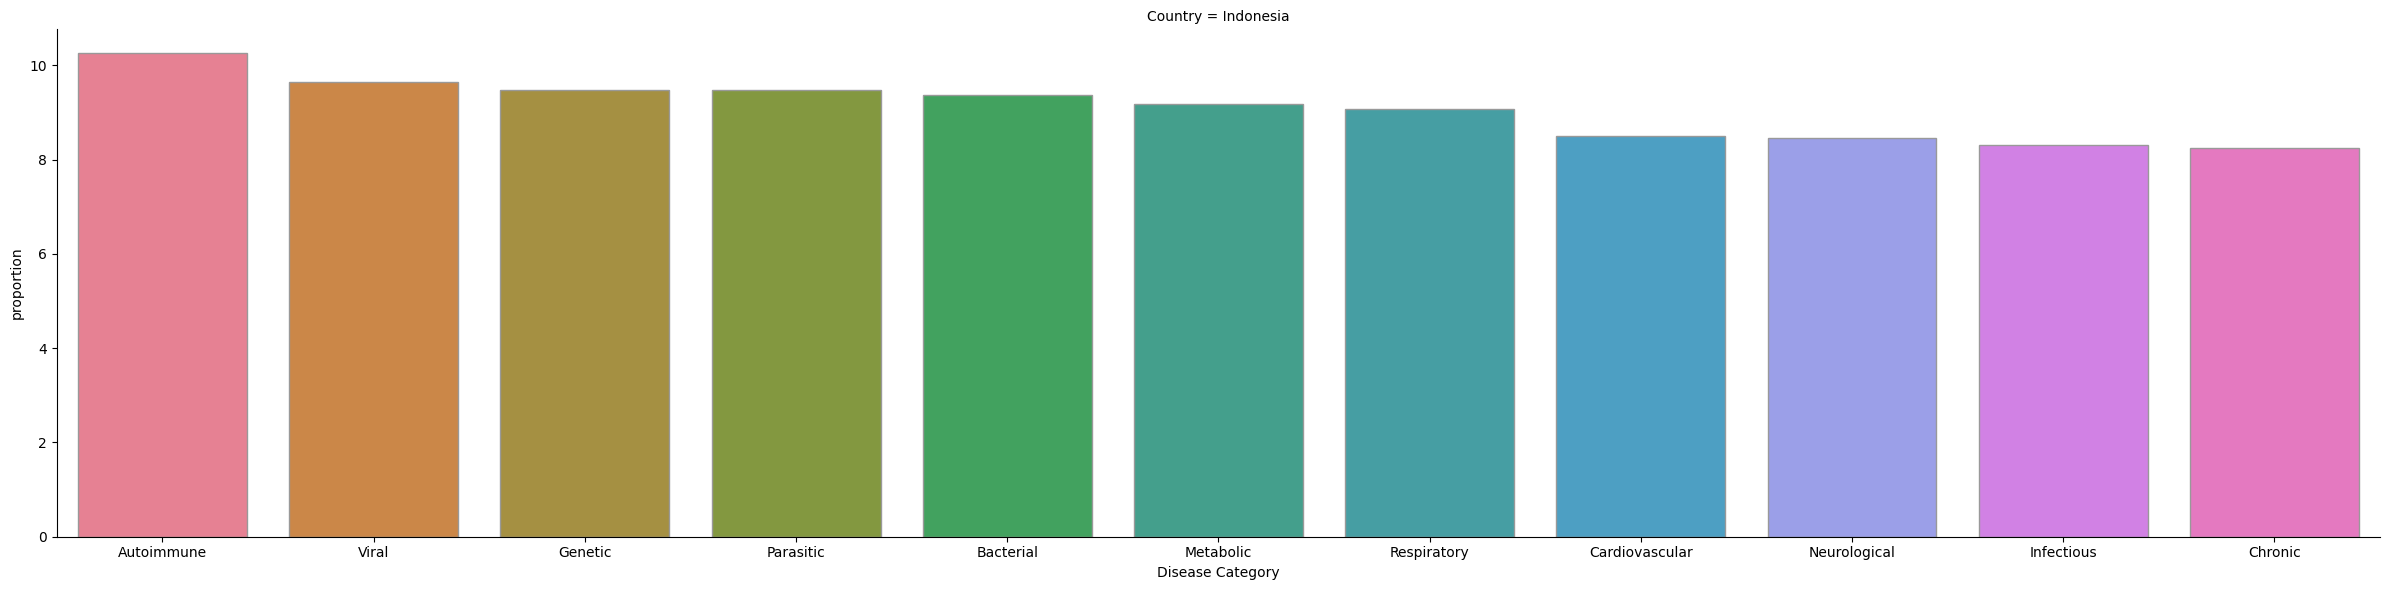

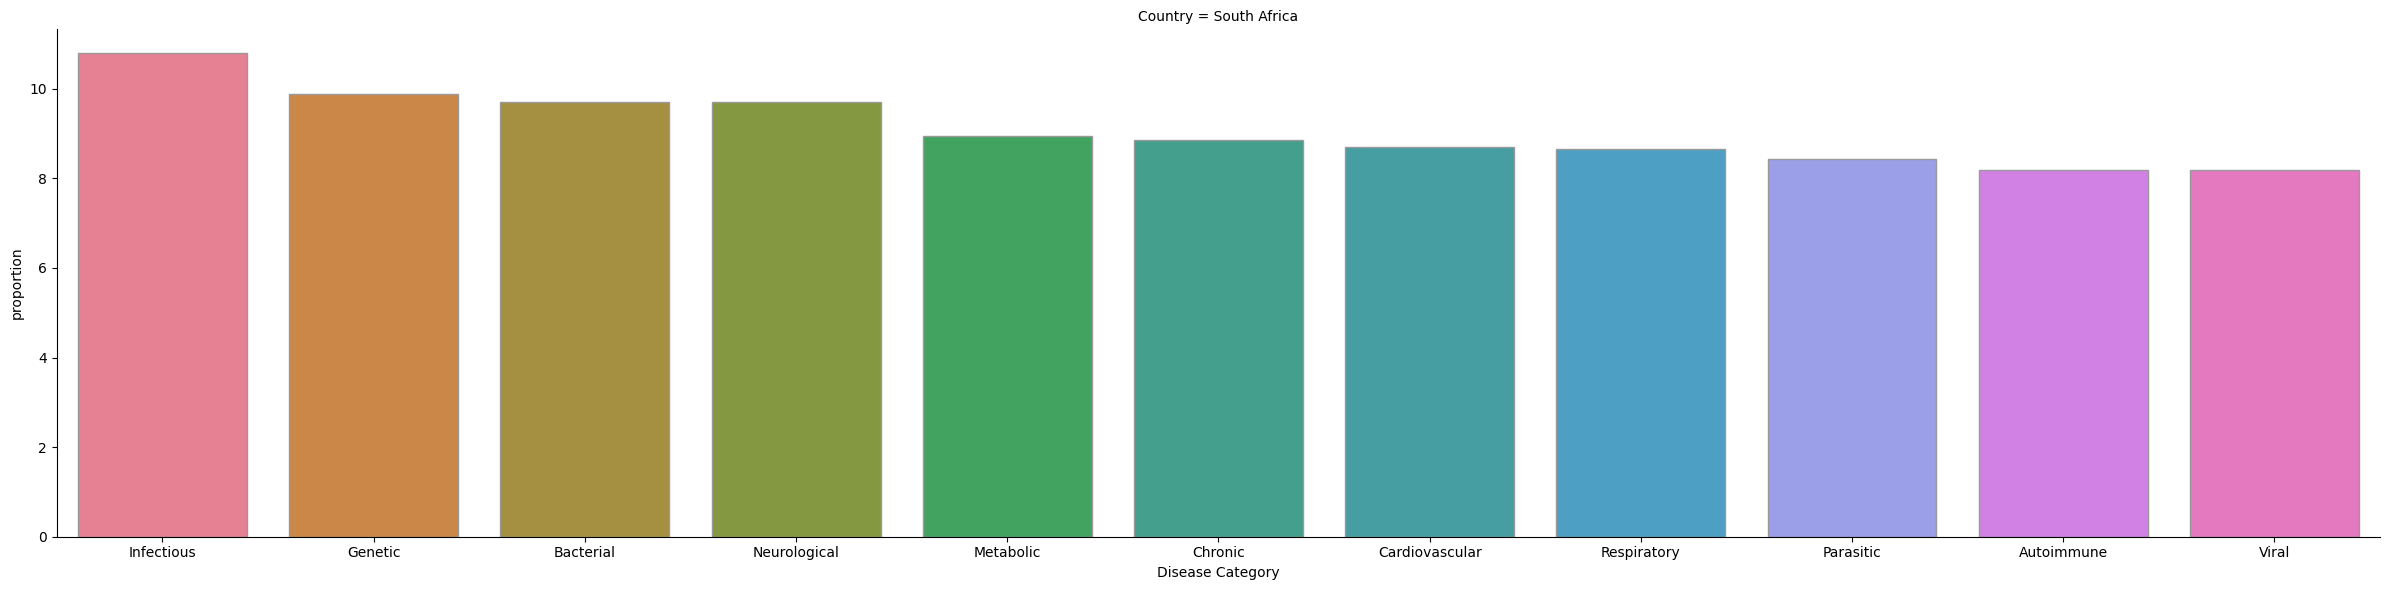

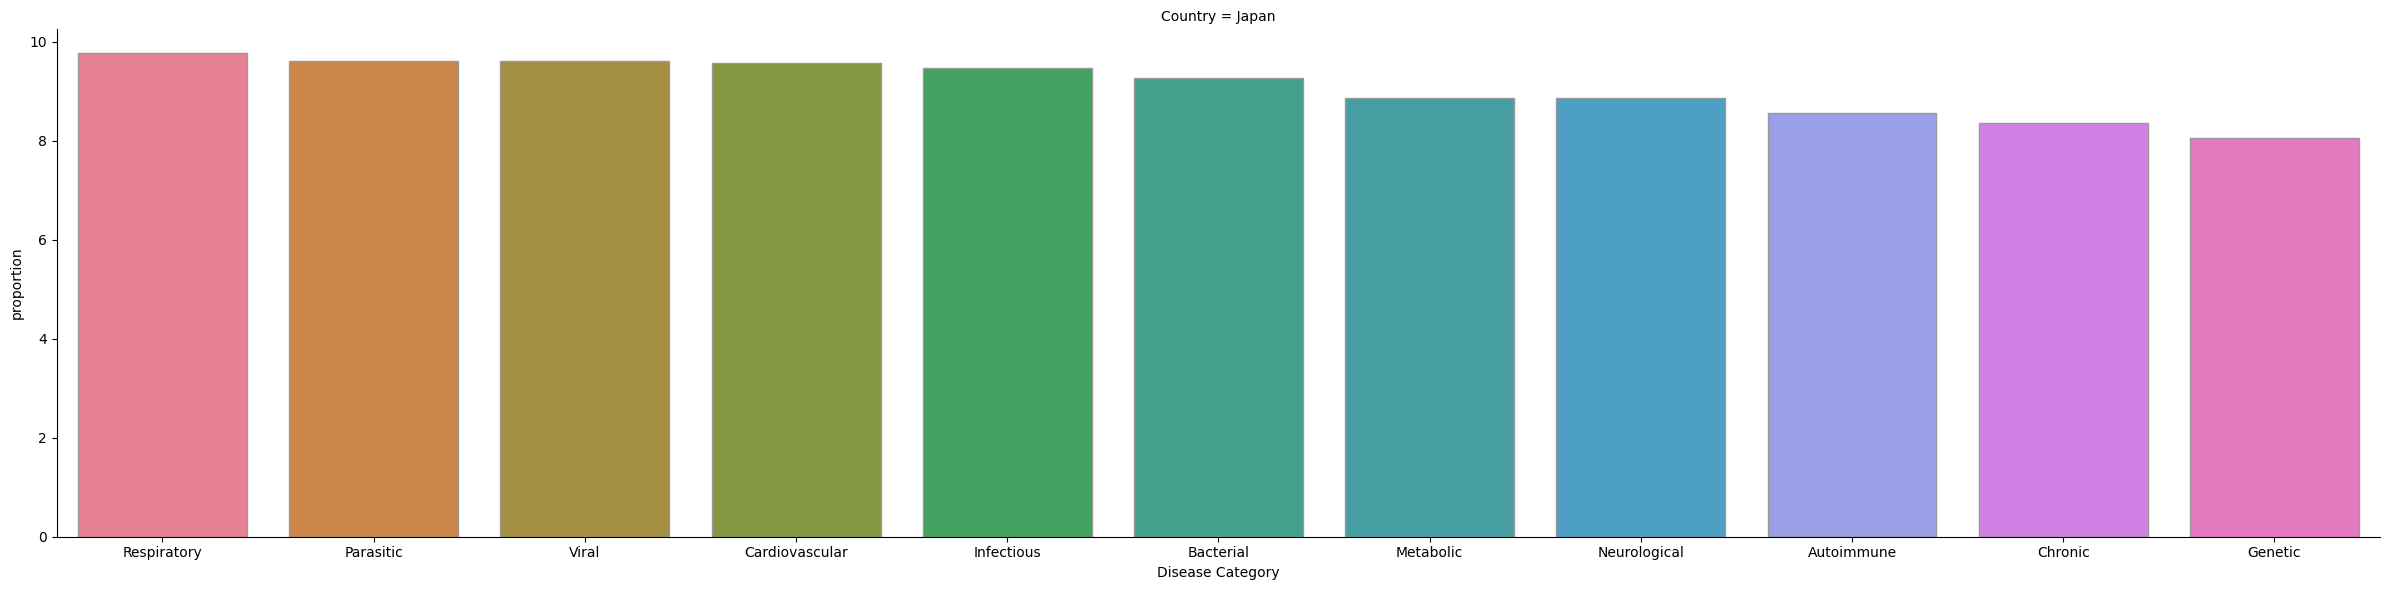

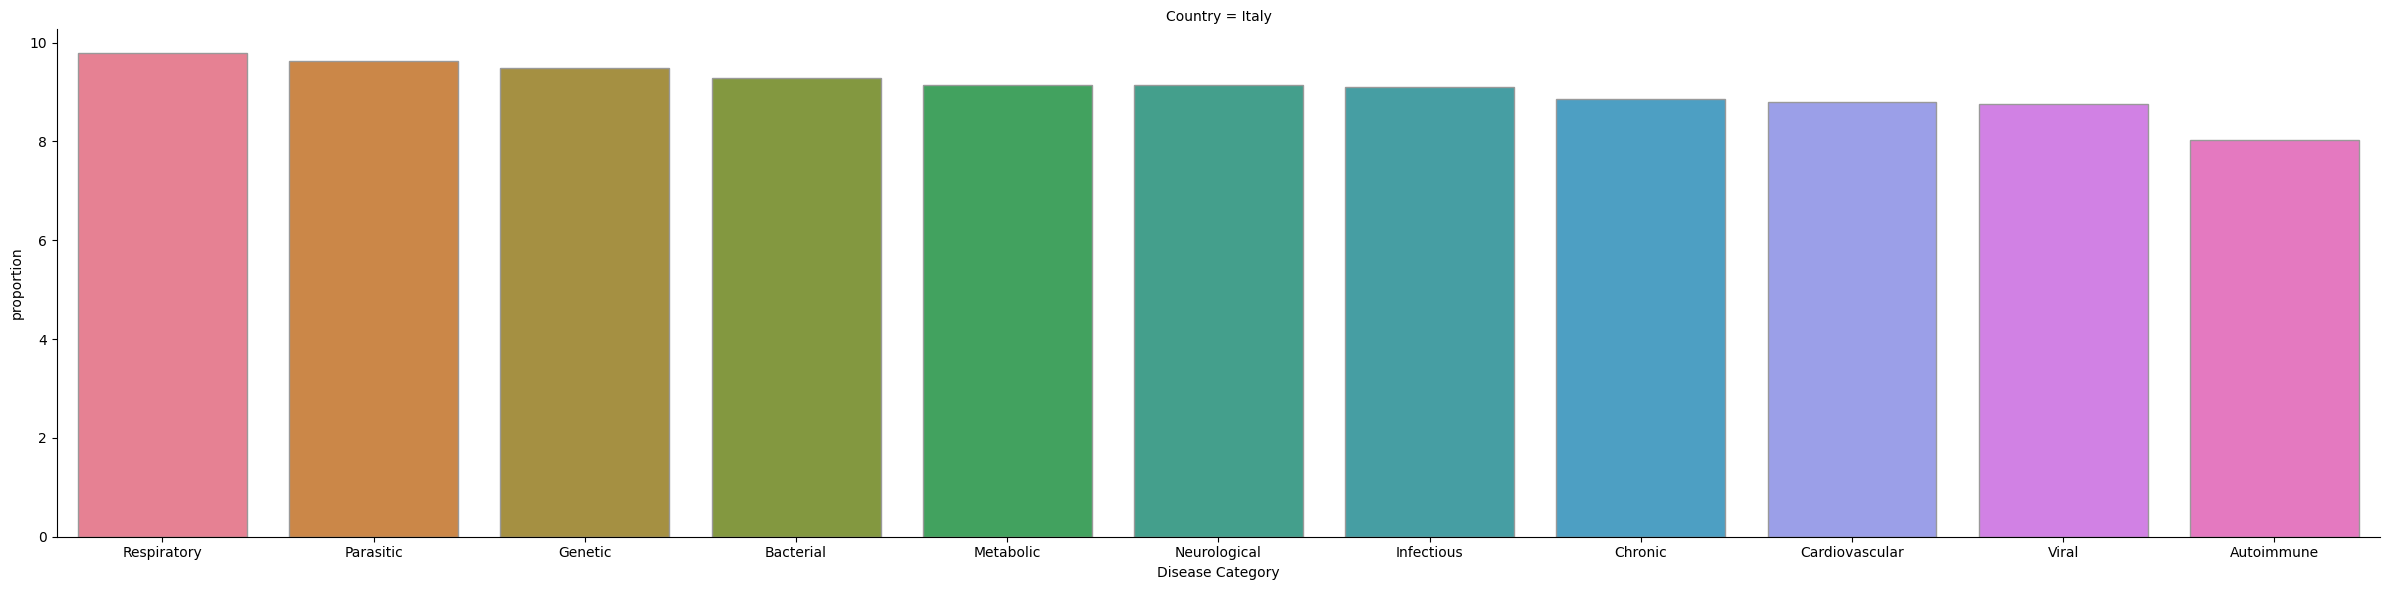

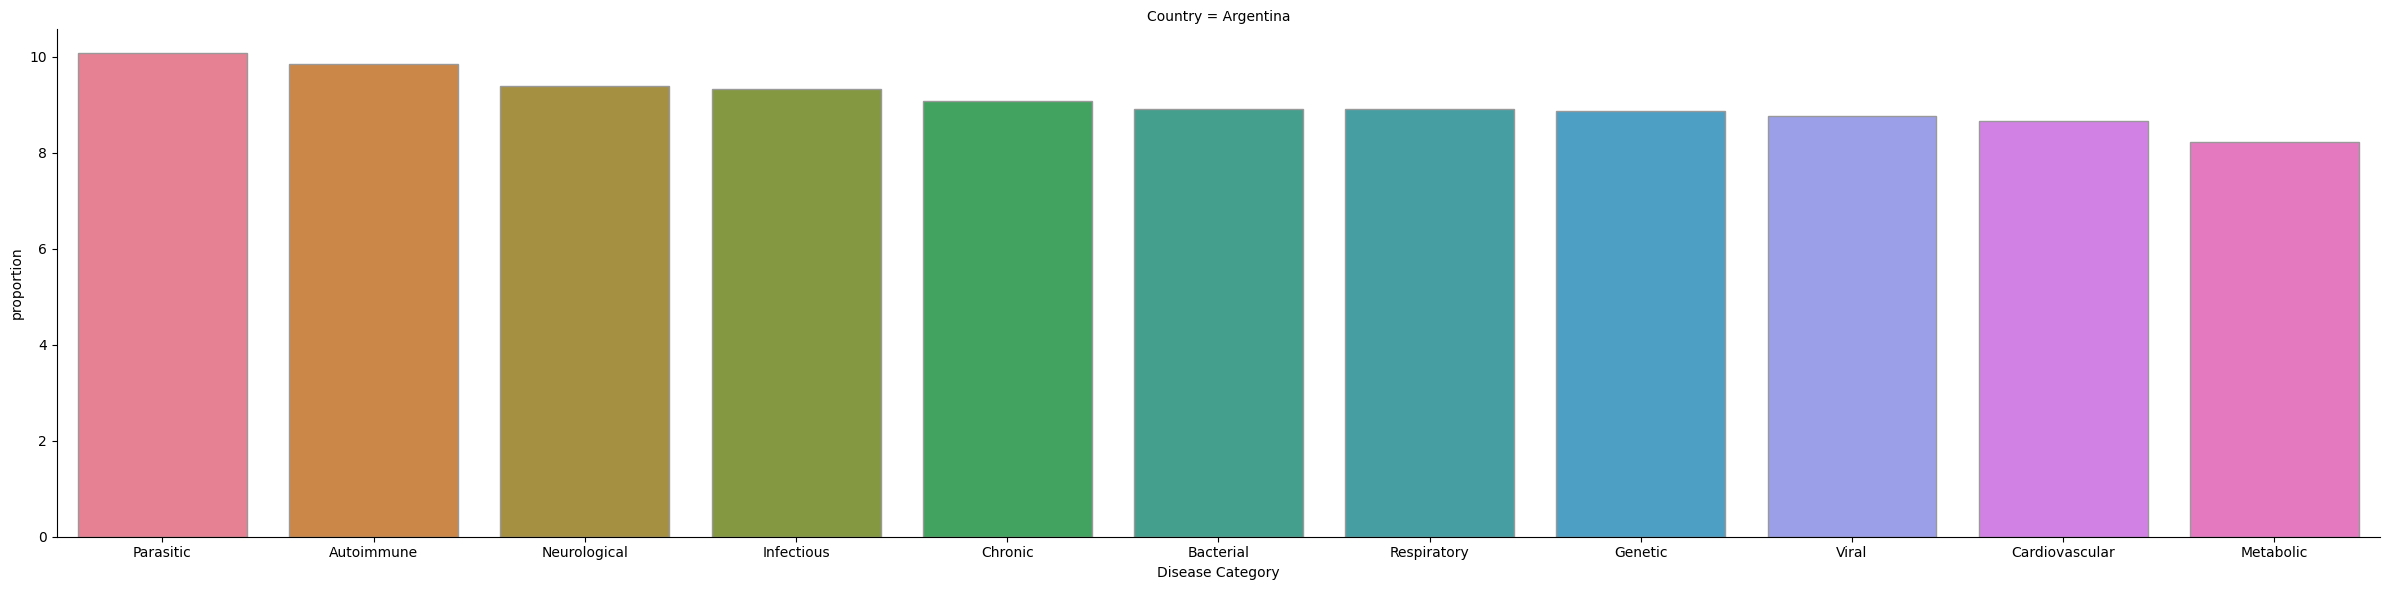

In [ ]:
# Para ello vamos a hacer un bucle en el que vamos a plotear, para los diferentes países, en qué % aparece cada medio de transmisión

for coly in df_2023["Country"].unique():
      cat_colx = "Disease Category"
      cat_coly = "Country"
      frecuencias_absolutas = df_2023[df_2023["Country"] == coly].groupby(cat_coly, as_index = False)[cat_colx].value_counts()
      frecuencias_relativas = df_2023[df_2023["Country"] == coly].groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize=True)
      
      frecuencias_relativas["proportion"] *= 100
      
      sns.catplot(x = "Disease Category",
                y = "proportion",
                col = "Country",
                hue = "Disease Category",
                kind = "bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
                edgecolor = ".6",
                data = frecuencias_relativas,
                height = 6,    # Ajusta la altura de cada gráfico
                aspect = 4); # Ajusta la relación de aspecto (más ancho que alto)

proporcion_transmision_pais = df_2023.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True).values


In [50]:
# Poner aquí los datos como en el punto anterior

#### RESPUESTA PREGUNTA 3

*Vamos a obtener la visualización a la tercera hipótesis: "- *¿Qué relación existe entre la enfermedad y los ingresos?"*

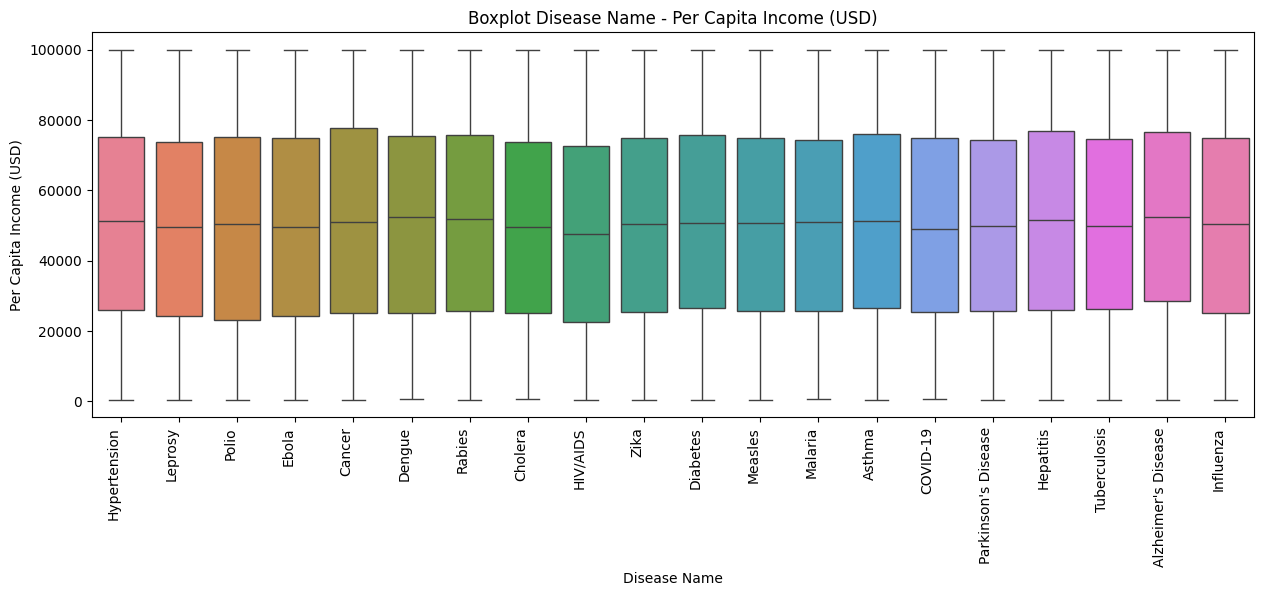

In [ ]:
variable_categorica = "Disease Name"
variable_numerica = "Per Capita Income (USD)"
df_2023.groupby(variable_categorica, as_index = False)[variable_numerica].describe()

plt.figure(figsize=(15,5))
sns.boxplot(x = "Disease Name",
            y = "Per Capita Income (USD)",
            hue = "Disease Name",
            data = df_2023);

plt.title('Boxplot Disease Name - Per Capita Income (USD)')

plt.xticks(rotation=90, ha='right')  # Rotar y alinear las etiquetas de las X

plt.show()

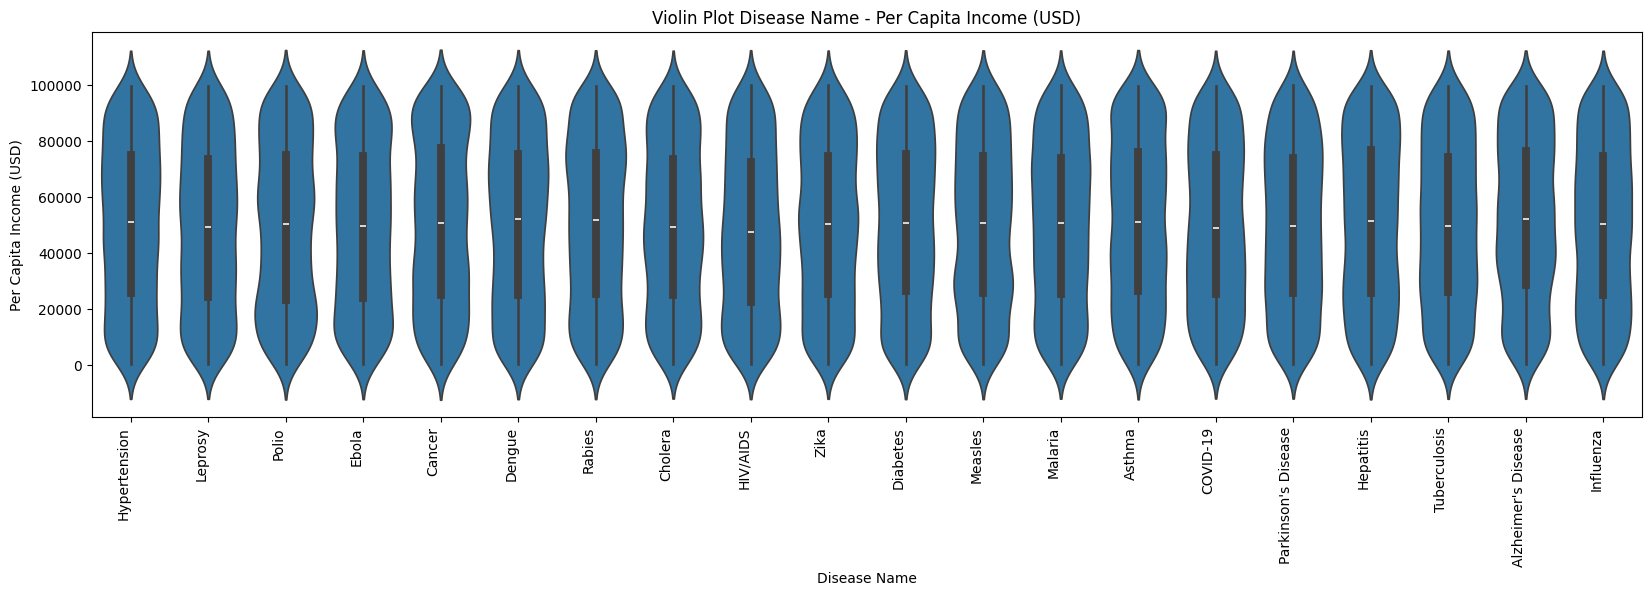

In [ ]:
variable_categorica = "Disease Name"
variable_numerica = "Per Capita Income (USD)"

plt.figure(figsize=(20,5))
sns.violinplot(x = "Disease Name",
               y = "Per Capita Income (USD)",
            #    hue = "Disease Name",
               data = df_2023);

plt.title('Violin Plot Disease Name - Per Capita Income (USD)')

plt.xticks(rotation=90, ha='right')  # Rotar y alinear las etiquetas de las X

plt.show()

In [ ]:
variable_categorica = "Disease Name"
variable_numerica = "Per Capita Income (USD)"

plt.figure(figsize=(20,5))
sns.barplot(x = "Disease Name",
            y = "Per Capita Income (USD)",
            hue = "Disease Name",
            data = df_2023);

plt.title('Bar Plot Disease Name - Per Capita Income (USD)')

plt.xticks(rotation=90, ha='right')  # Rotar y alinear las etiquetas de las X

plt.show()

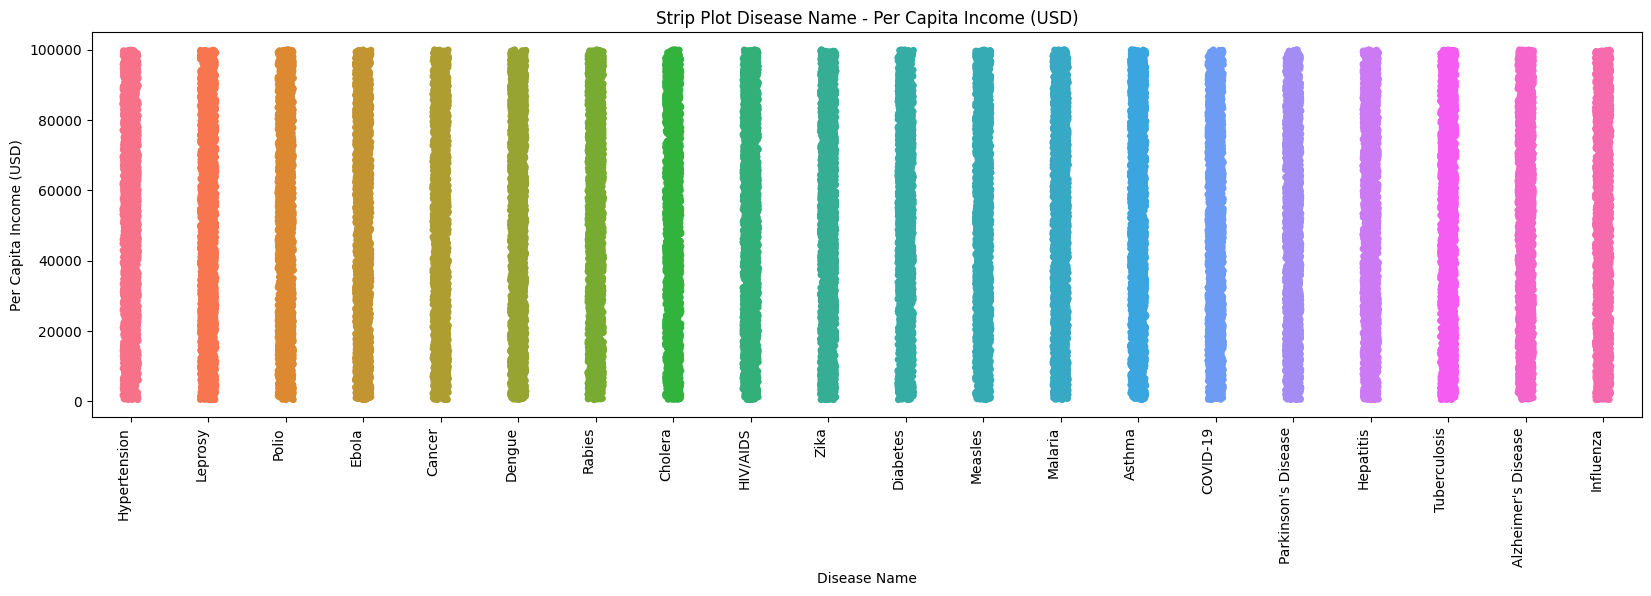

In [ ]:
variable_categorica = "Disease Name"
variable_numerica = "Per Capita Income (USD)"

plt.figure(figsize=(20,5))
sns.stripplot(x = "Disease Name",
            y = "Per Capita Income (USD)",
            hue = "Disease Name",
            data = df_2023,
            jitter = True);

plt.title('Strip Plot Disease Name - Per Capita Income (USD)')

plt.xticks(rotation=90, ha='right')  # Rotar y alinear las etiquetas de las X

plt.show()

C:\Users\ancar\AppData\Local\Temp\ipykernel_10988\2329166469.py:9: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  datos = df_2023.groupby(variable_categorica, as_index = False).agg({variable_numerica: operacion_agregacion})


(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

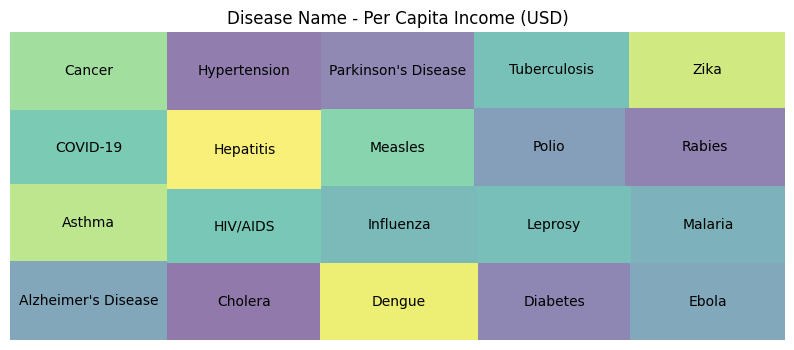

In [ ]:
import squarify # Primero importamos squarify

# Obtenemos los datos, haciendo la agregación que queramos:

variable_categorica = "Disease Name"
variable_numerica = "Per Capita Income (USD)"
operacion_agregacion = sum

datos = df_2023.groupby(variable_categorica, as_index = False).agg({variable_numerica: operacion_agregacion})

plt.figure(figsize = (10,4))
squarify.plot(sizes = datos[variable_numerica], label = datos[variable_categorica], alpha = 0.6)
plt.title("Disease Name - Per Capita Income (USD)")
plt.axis("off")

#### RESPUESTA PREGUNTA 4

In [ ]:
variable_categorica = "Disease Name"
variable_numerica = "Education Index"
df_2023.groupby(variable_categorica, as_index = False)[variable_numerica].describe()

plt.figure(figsize=(15,5))
sns.boxplot(x = "Disease Name",
            y = "Education Index",
            hue = "Disease Name",
            data = df_2023);

plt.title('Boxplot Disease Name - Education Index')

plt.xticks(rotation=90, ha='right')  # Rotar y alinear las etiquetas de las X

plt.show()

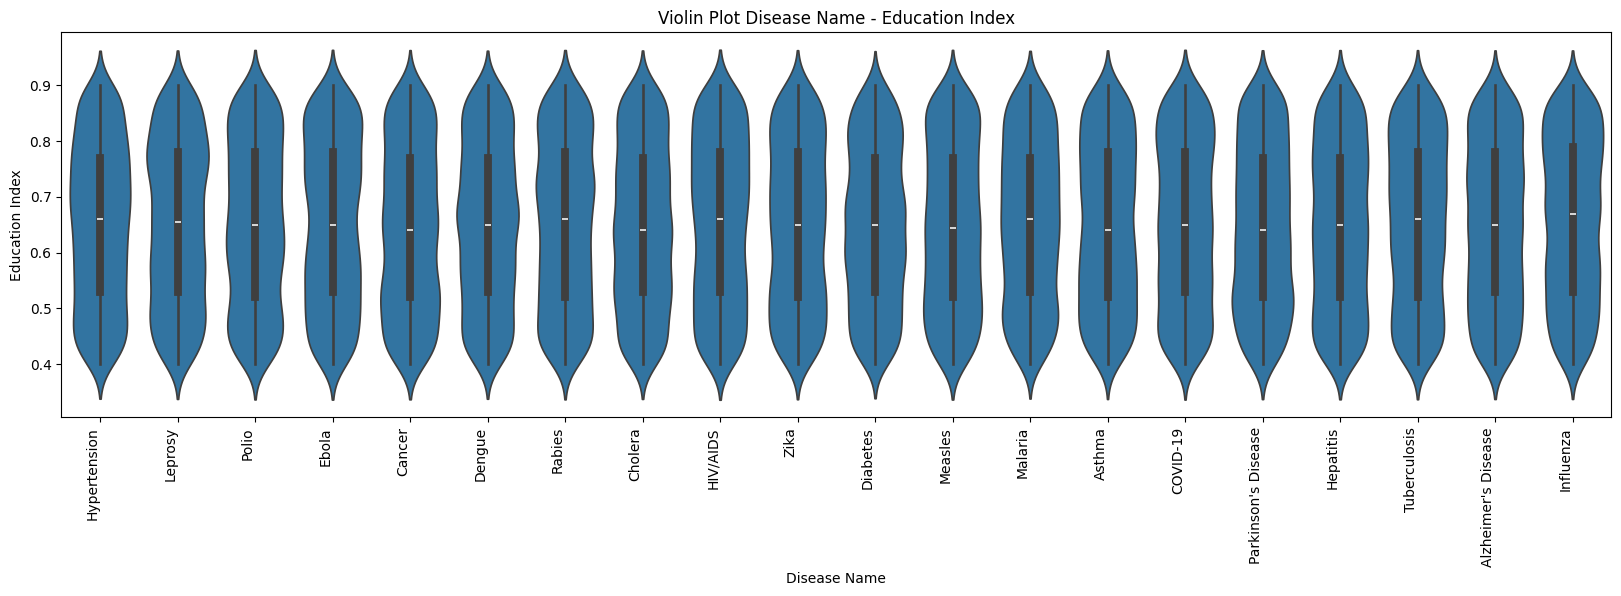

In [ ]:
variable_categorica = "Disease Name"
variable_numerica = "Education Index"

plt.figure(figsize=(20,5))
sns.violinplot(x = "Disease Name",
               y = "Education Index",
            #    hue = "Disease Name",
               data = df_2023);

plt.title('Violin Plot Disease Name - Education Index')

plt.xticks(rotation=90, ha='right')  # Rotar y alinear las etiquetas de las X

plt.show()

In [ ]:
variable_categorica = "Disease Name"
variable_numerica = "Education Index"

plt.figure(figsize=(20,5))
sns.barplot(x = "Disease Name",
            y = "Education Index",
            hue = "Disease Name",
            data = df_2023);

plt.title('Bar Plot Disease Name - Education Index')

plt.xticks(rotation=90, ha='right')  # Rotar y alinear las etiquetas de las X

plt.show()

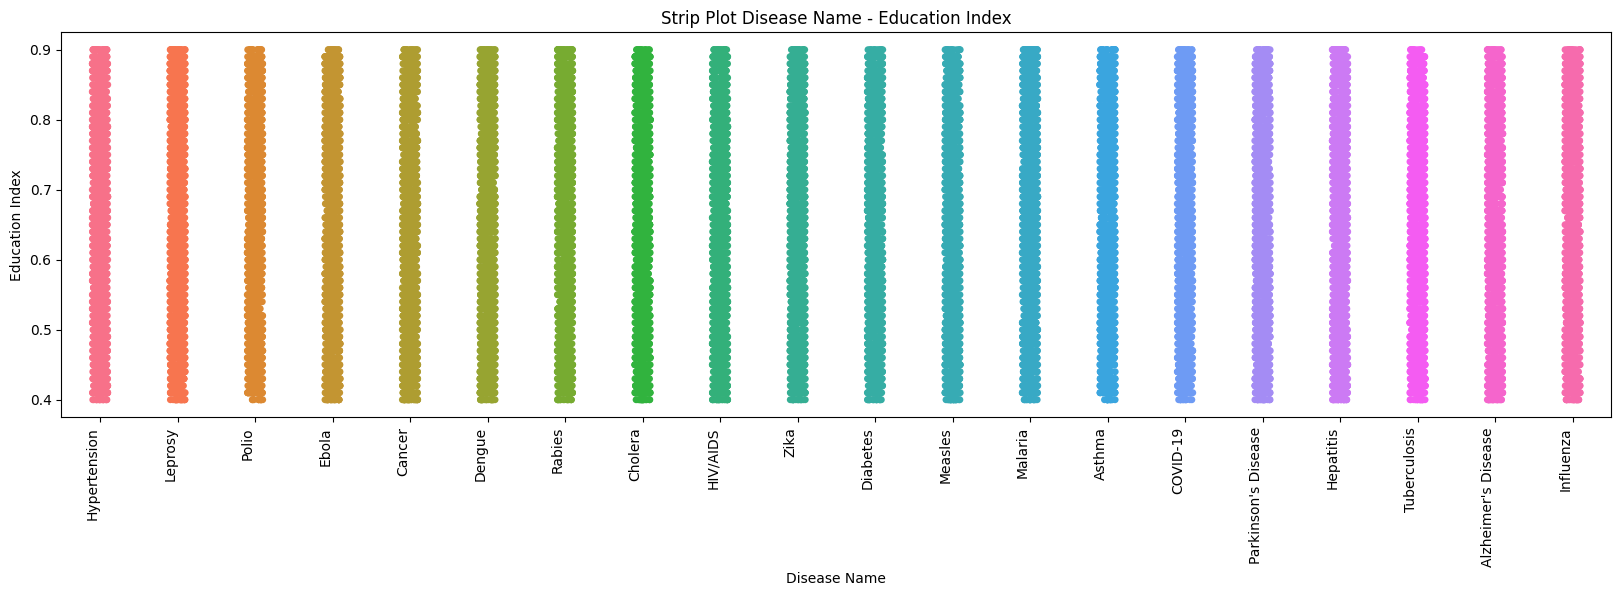

In [ ]:
variable_categorica = "Disease Name"
variable_numerica = "Education Index"

plt.figure(figsize=(20,5))
sns.stripplot(x = "Disease Name",
            y = "Education Index",
            hue = "Disease Name",
            data = df_2023,
            jitter = True);

plt.title('Strip Plot Disease Name - Education Index')

plt.xticks(rotation=90, ha='right')  # Rotar y alinear las etiquetas de las X

plt.show()

C:\Users\ancar\AppData\Local\Temp\ipykernel_10988\328894089.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  datos = df_2023.groupby(variable_categorica, as_index = False).agg({variable_numerica: operacion_agregacion})


(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

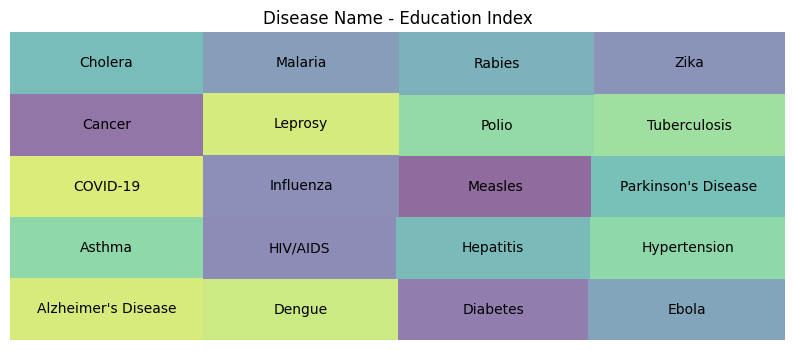

In [ ]:
variable_categorica = "Disease Name"
variable_numerica = "Education Index"
operacion_agregacion = sum

datos = df_2023.groupby(variable_categorica, as_index = False).agg({variable_numerica: operacion_agregacion})

plt.figure(figsize = (10,4))
squarify.plot(sizes = datos[variable_numerica], label = datos[variable_categorica], alpha = 0.6)
plt.title("Disease Name - Education Index")
plt.axis("off")

#### VAMOS A SEGUIR CON LAS RELACIONES QUE SÍ QUE EXISTEN

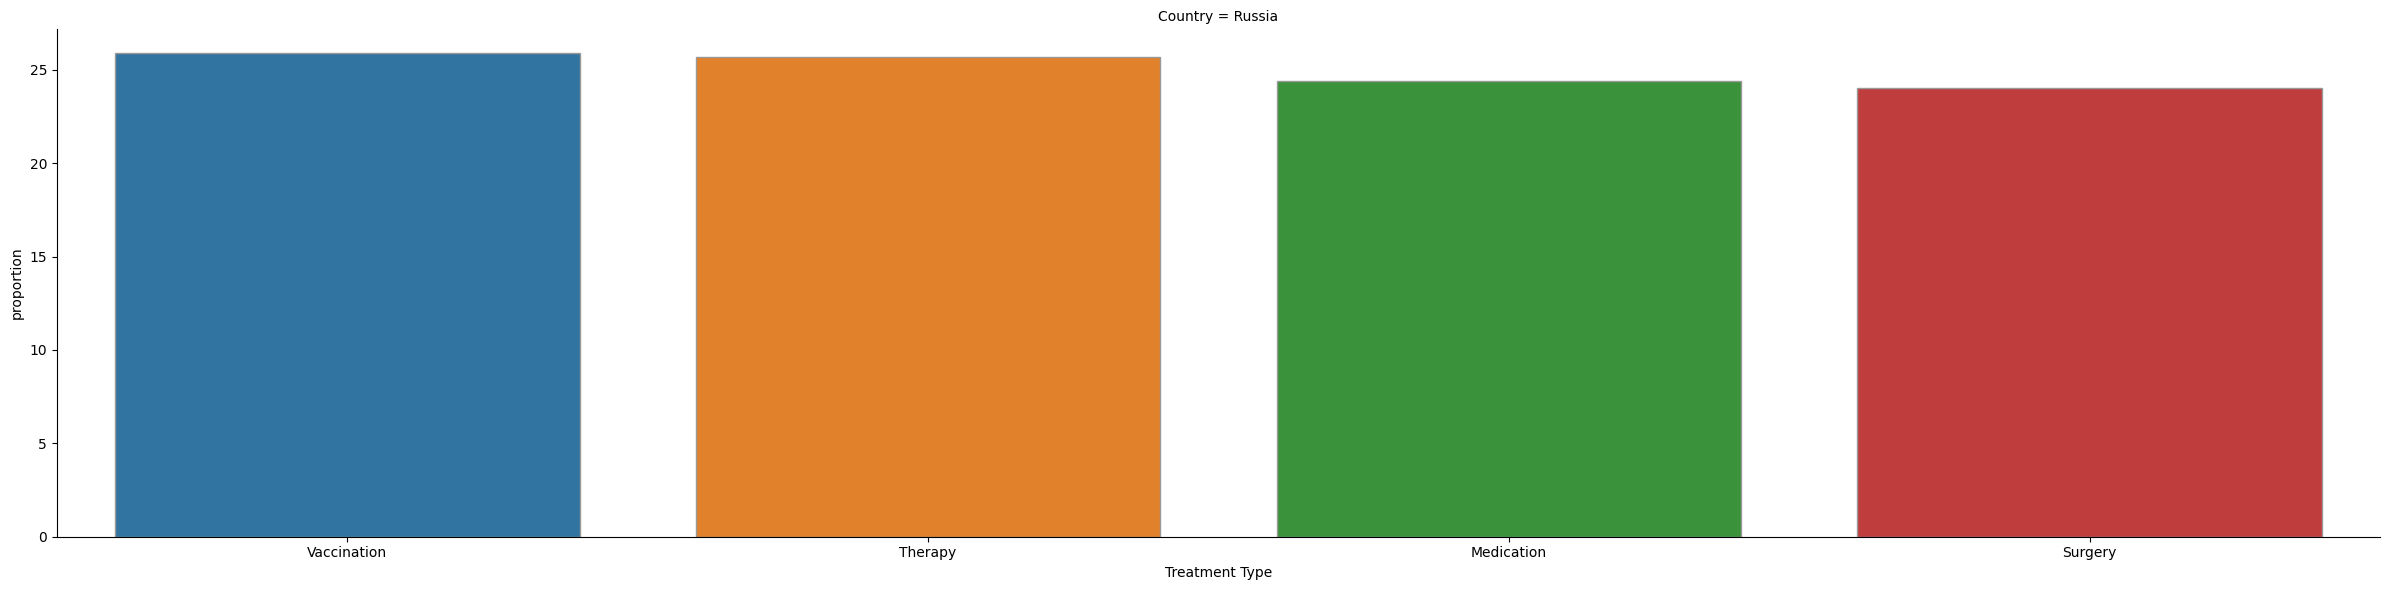

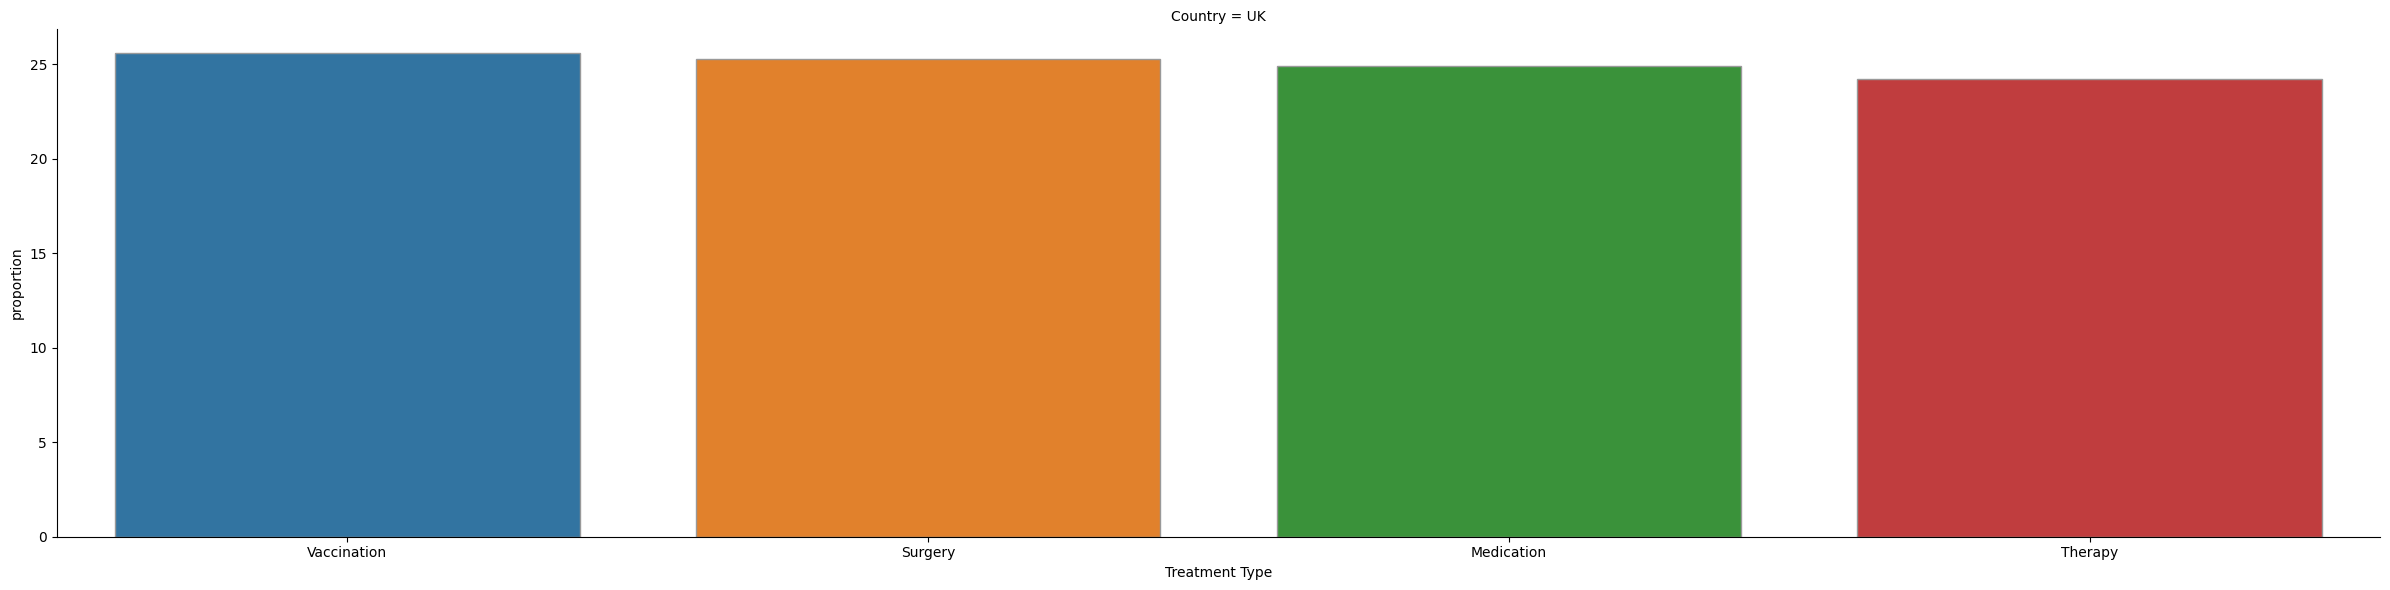

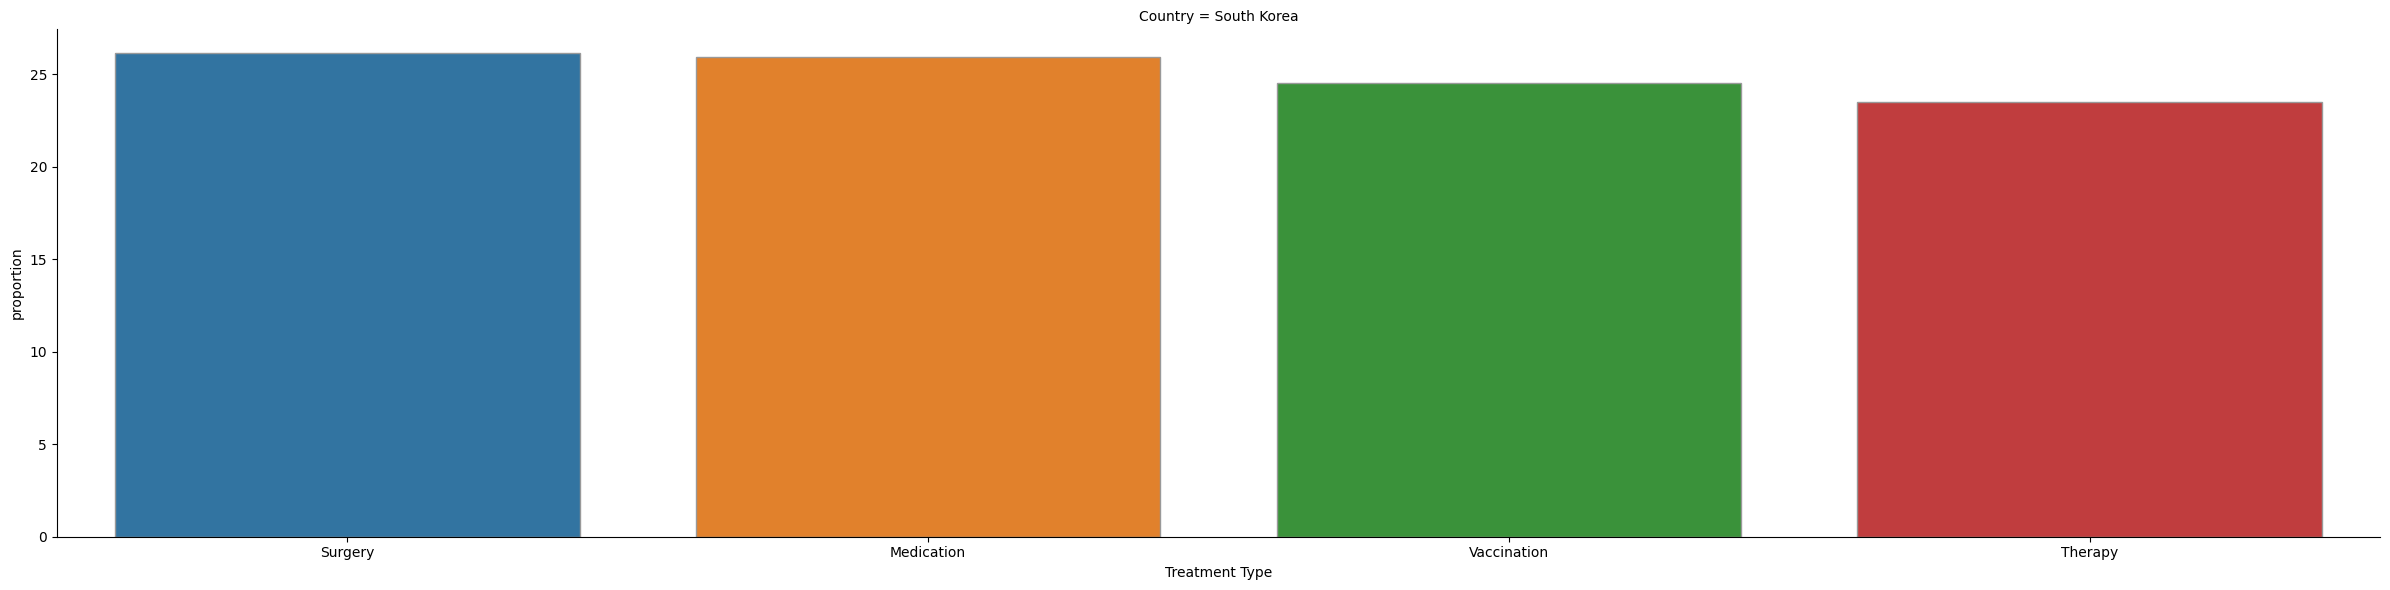

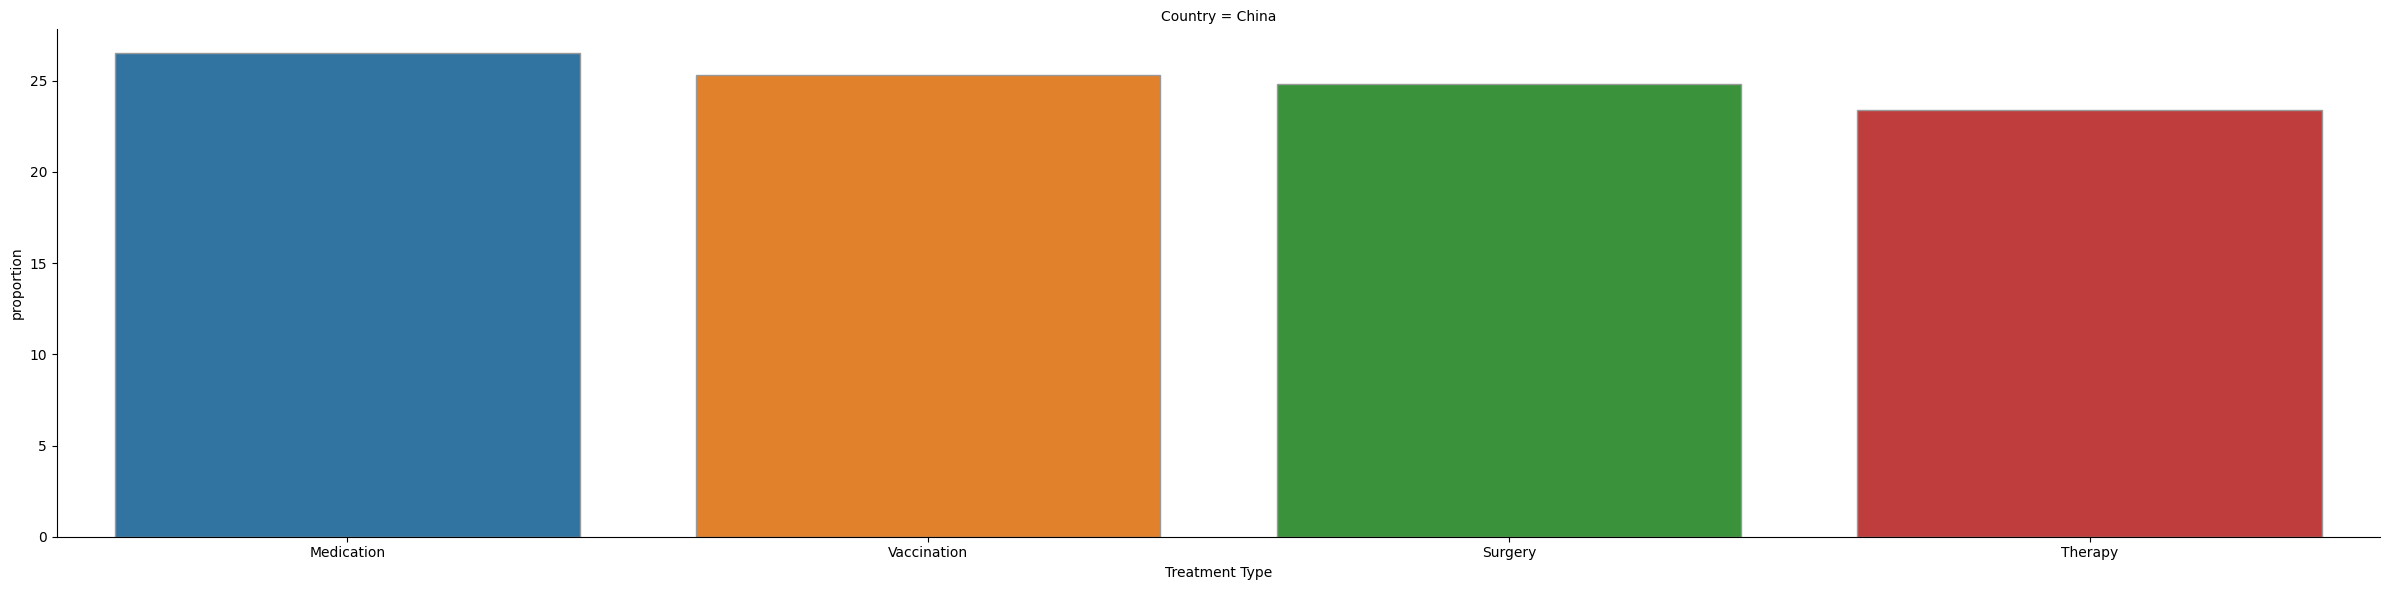

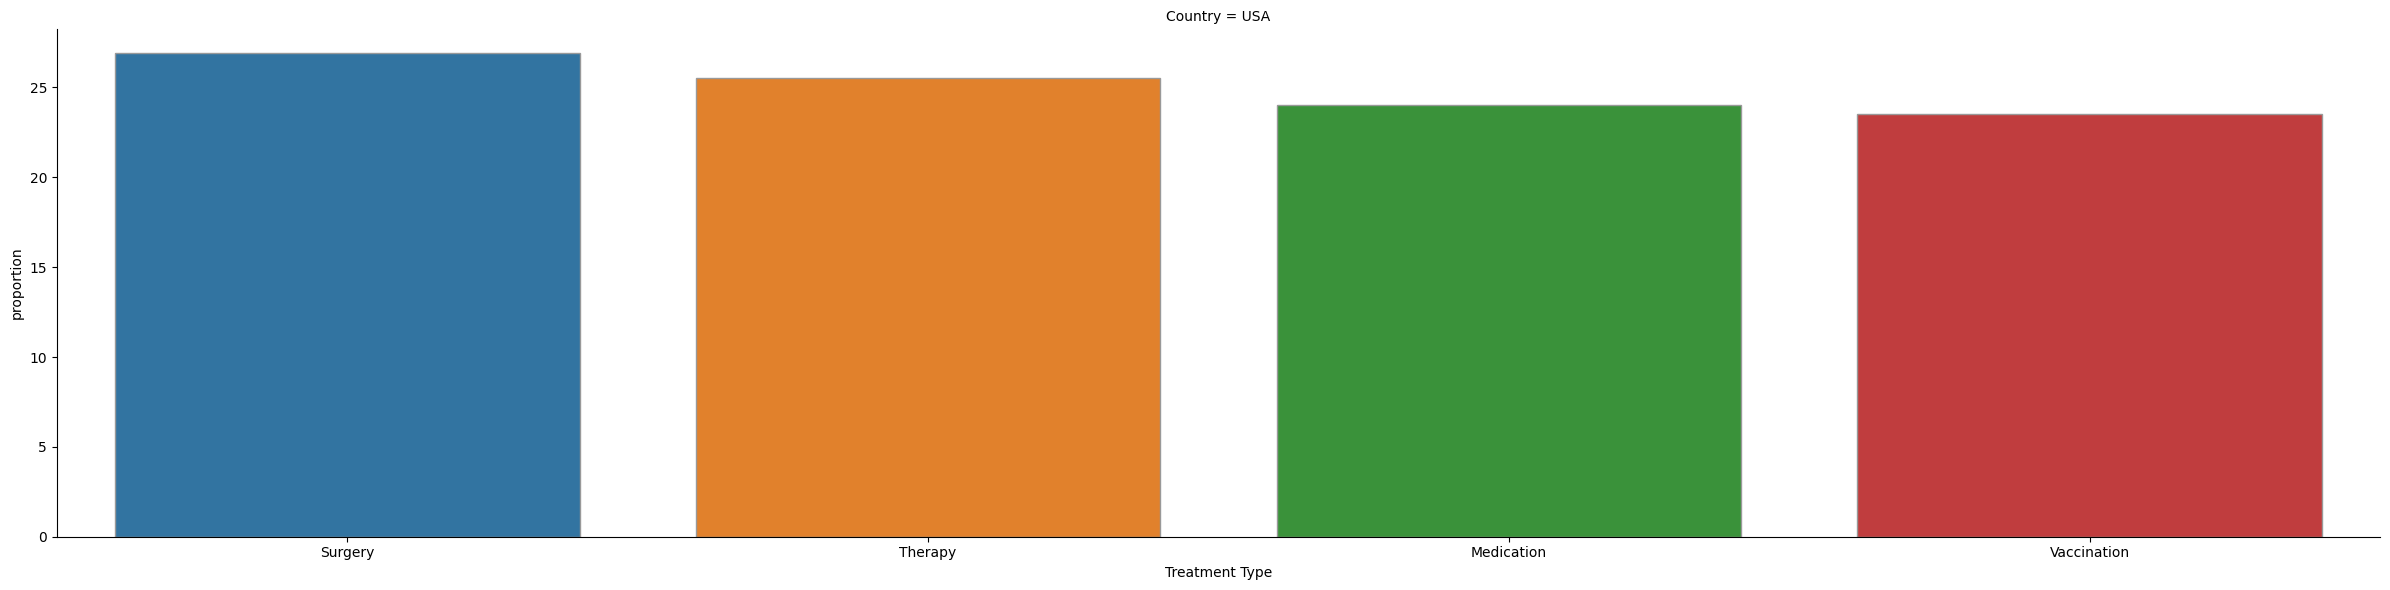

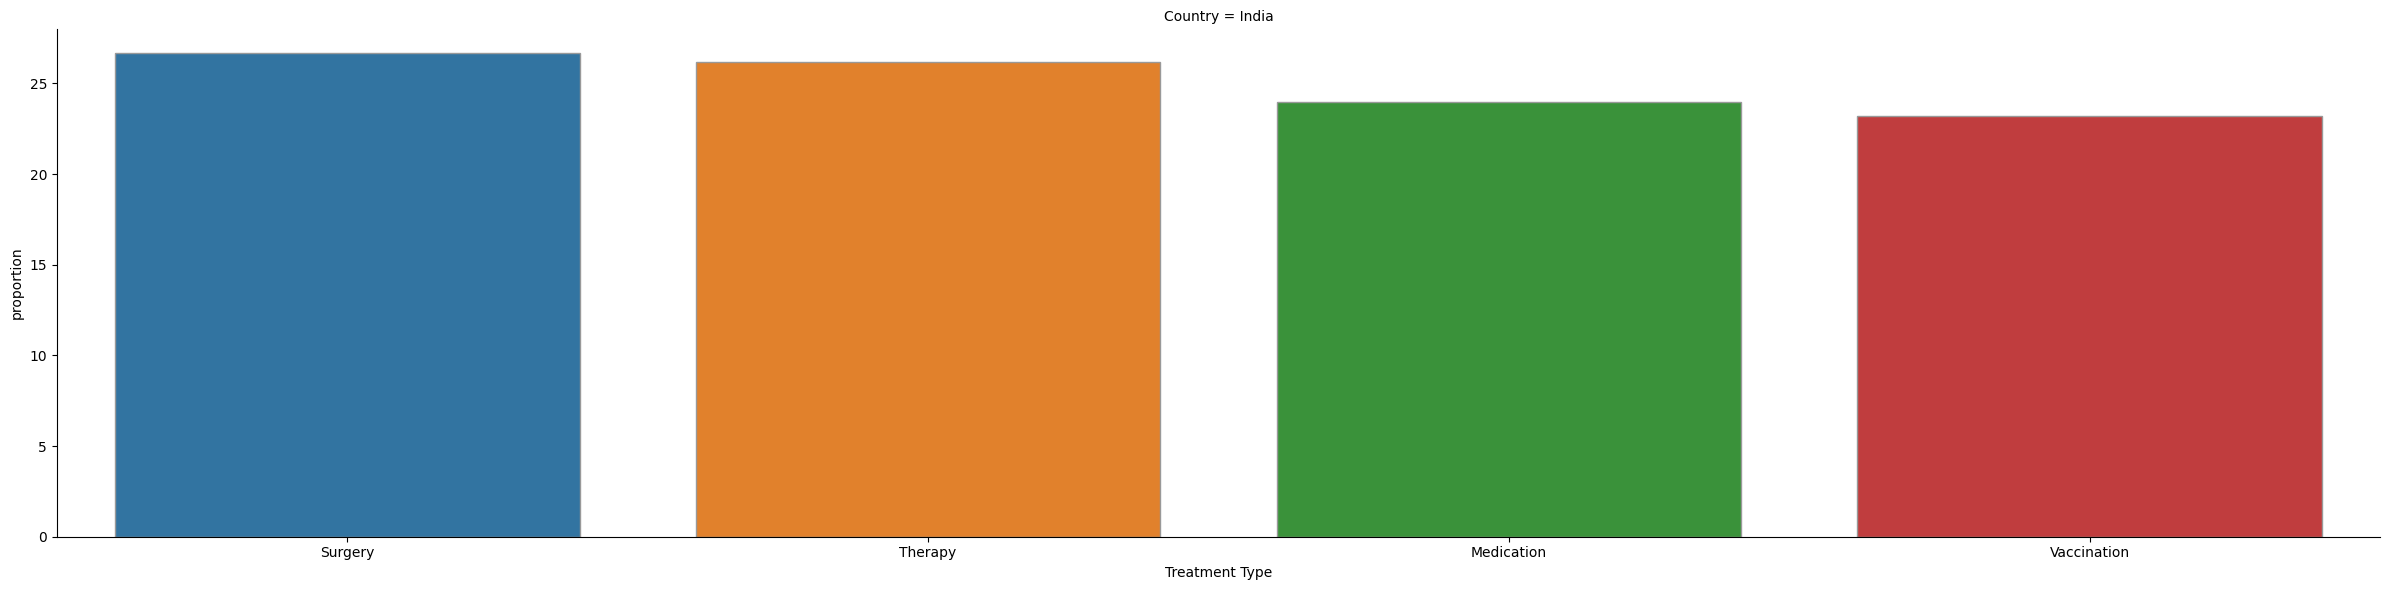

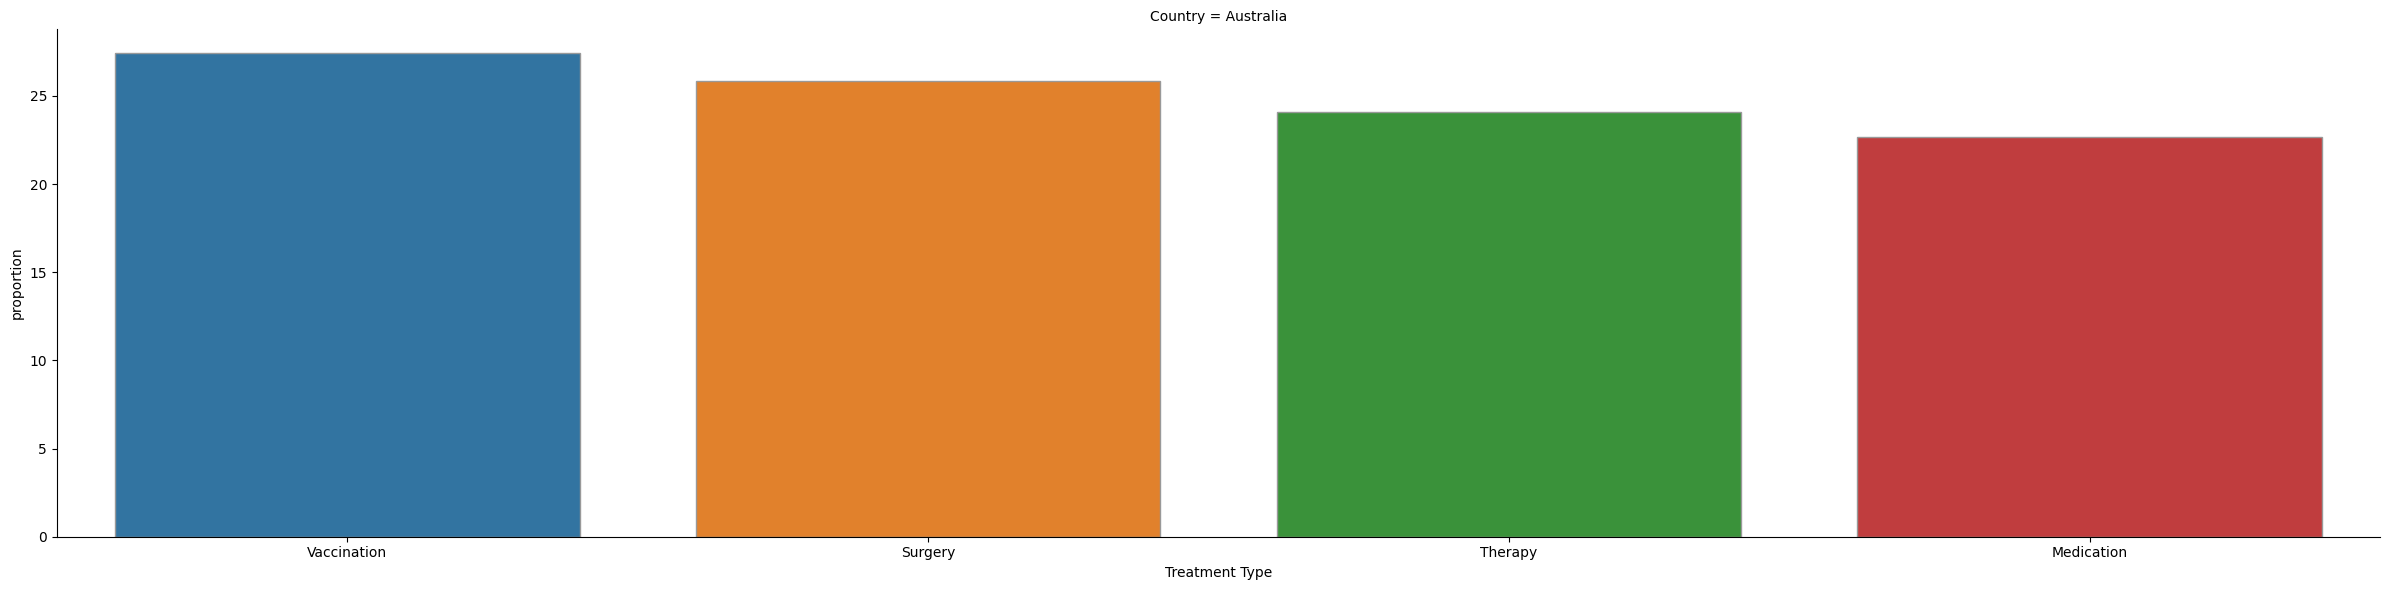

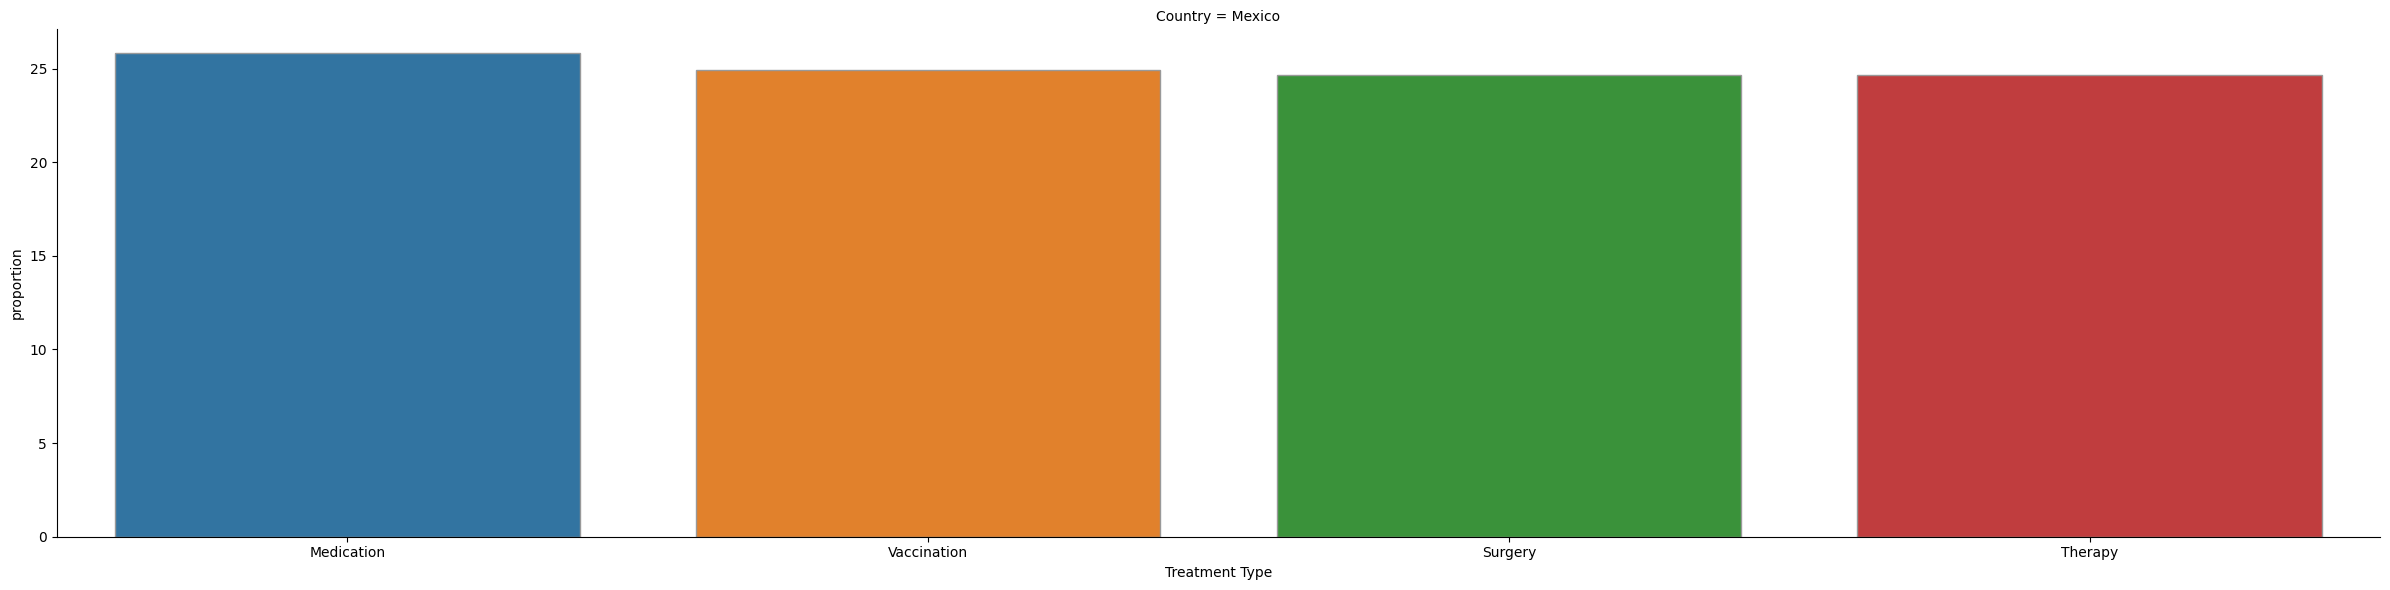

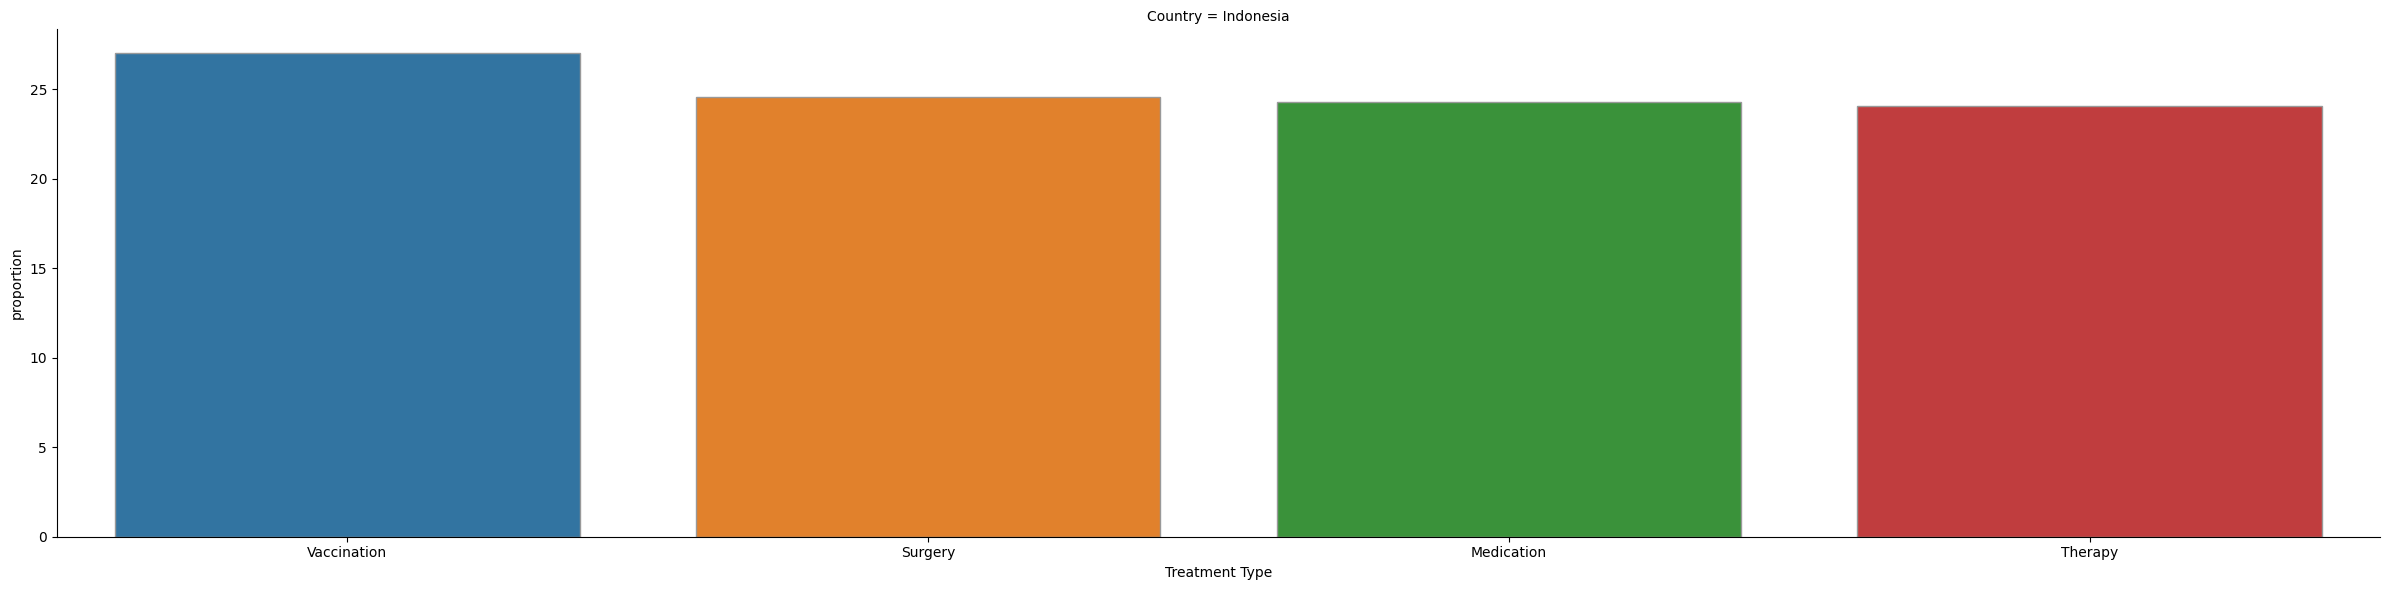

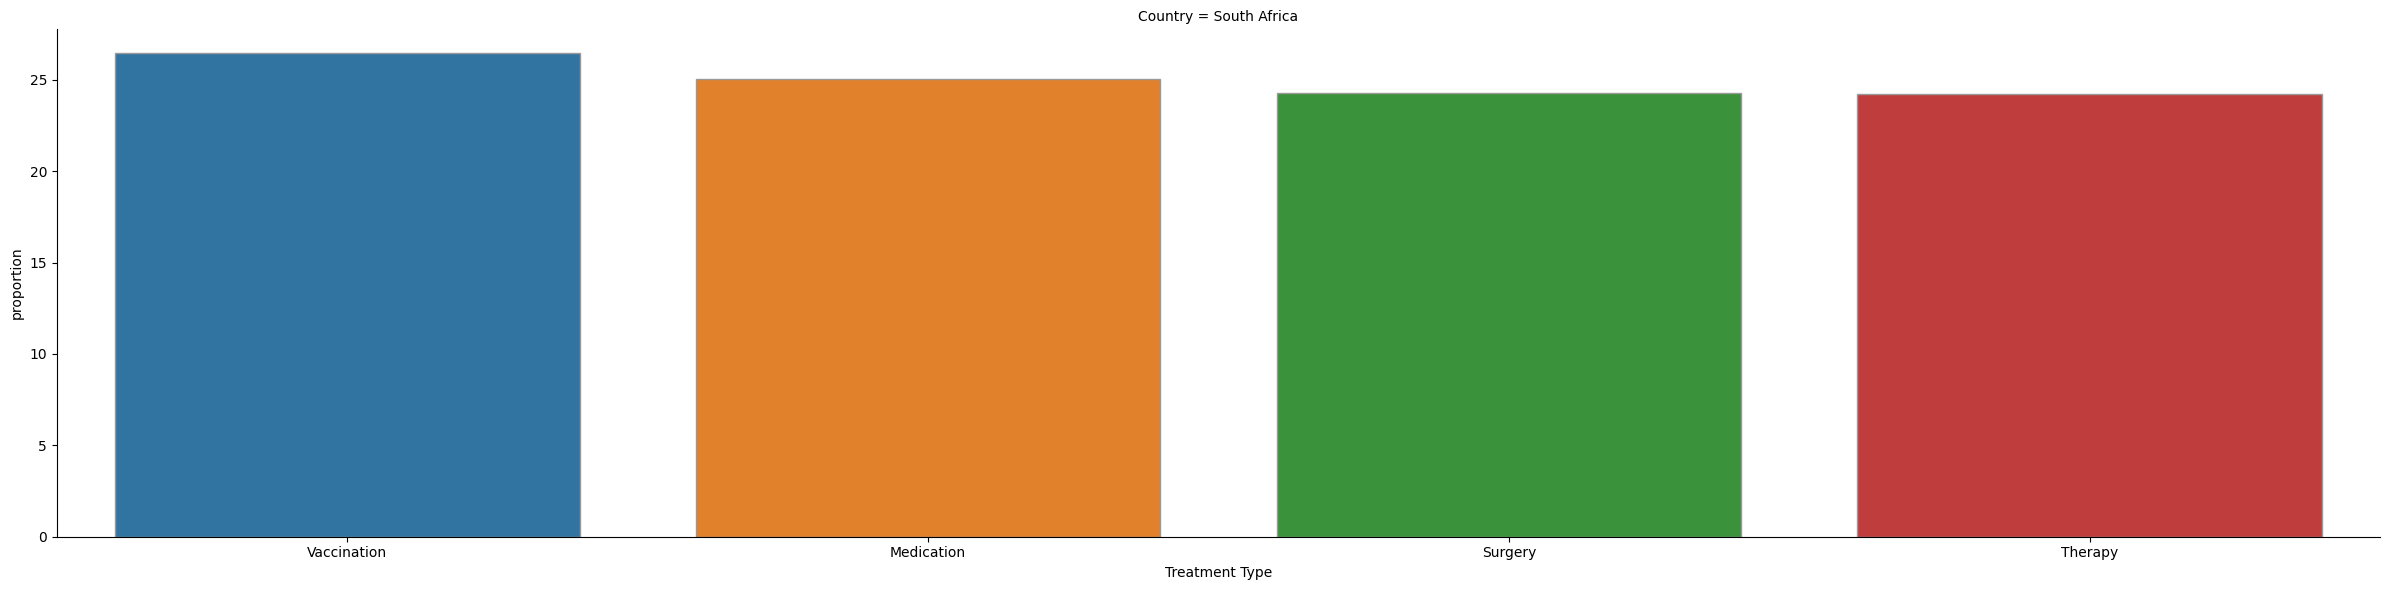

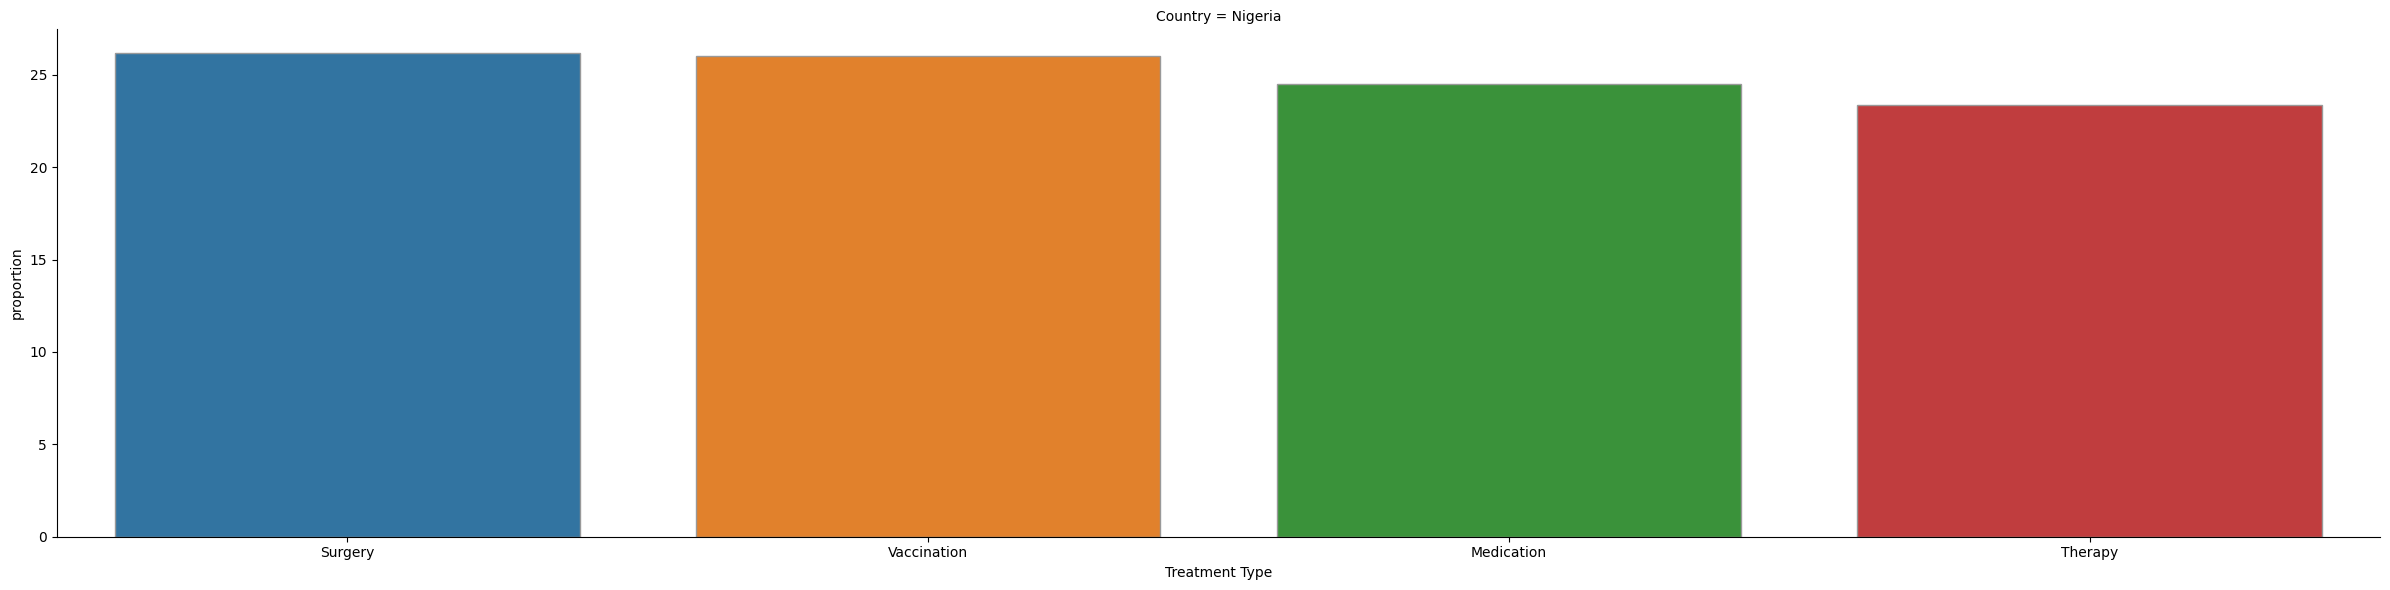

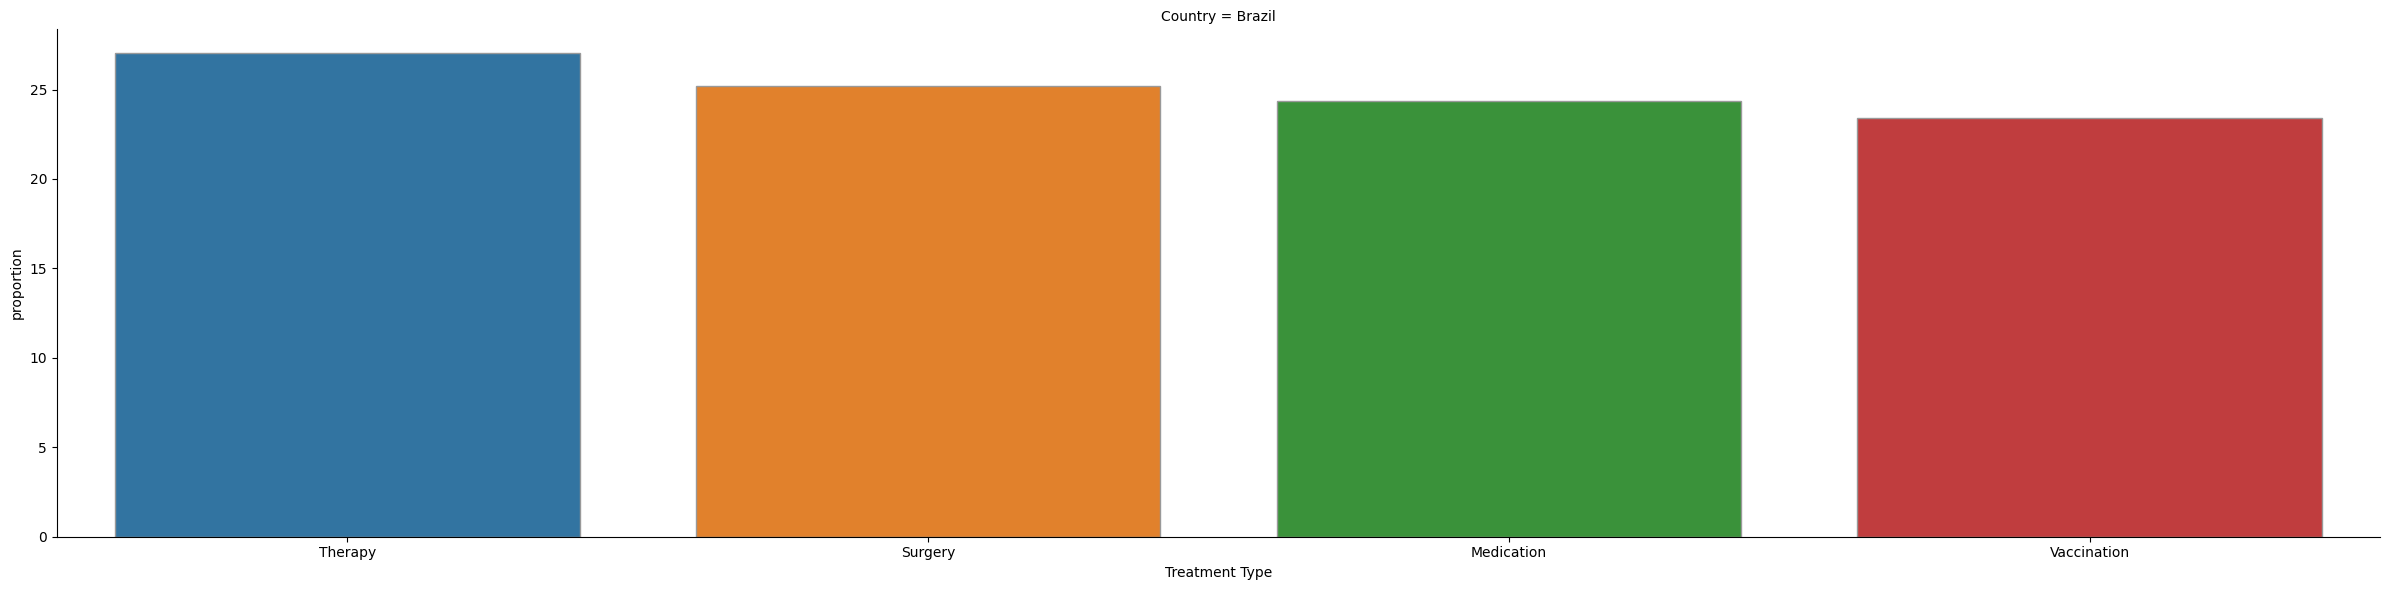

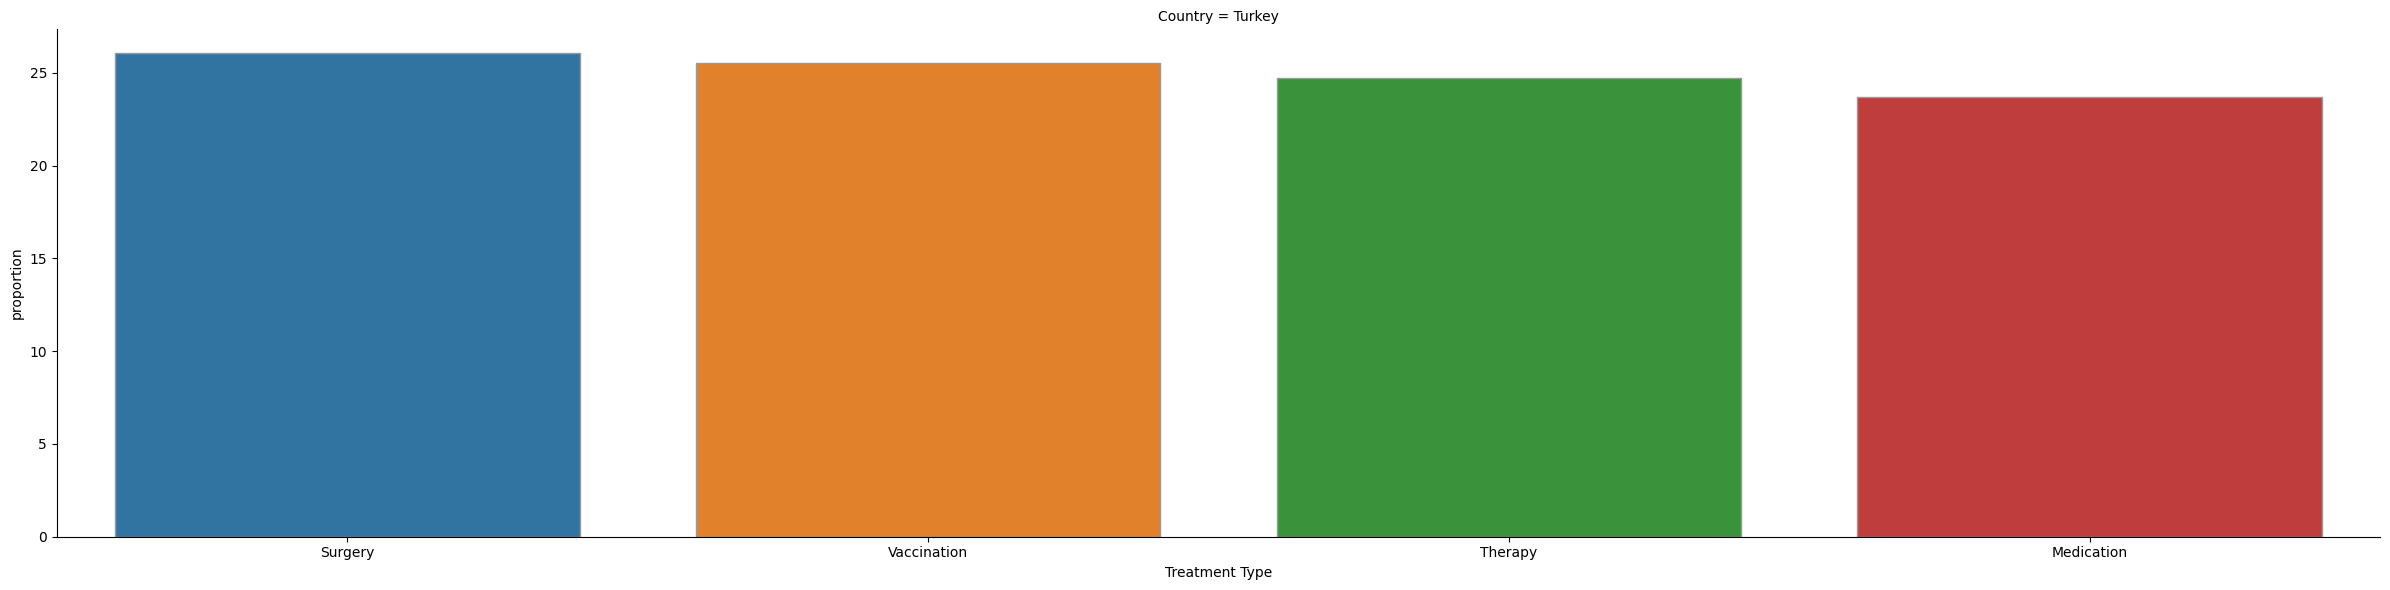

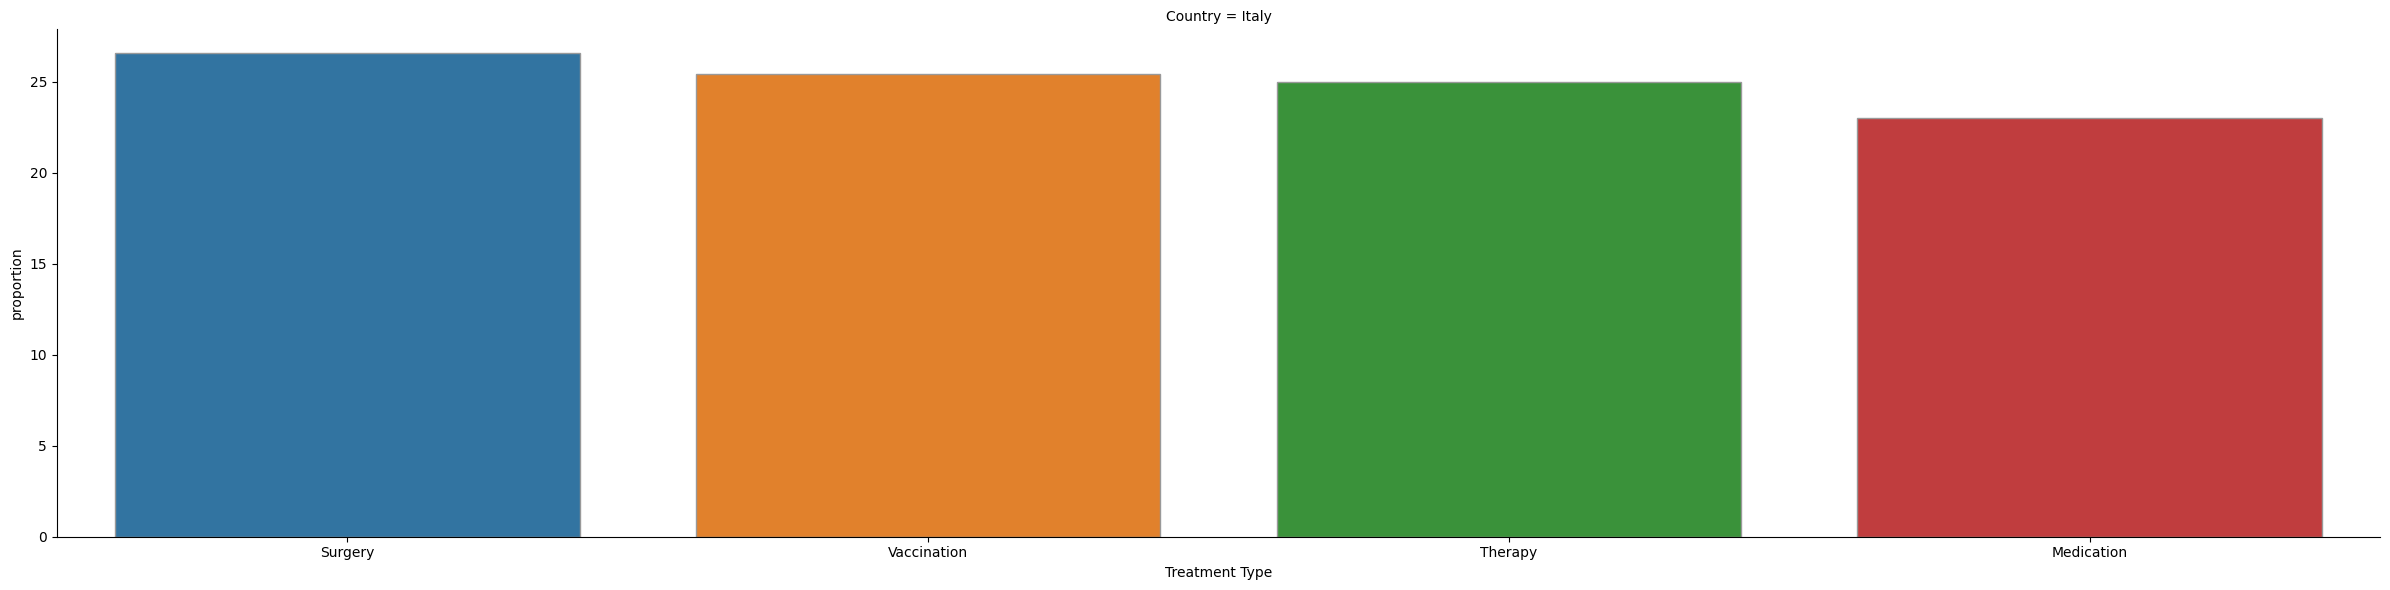

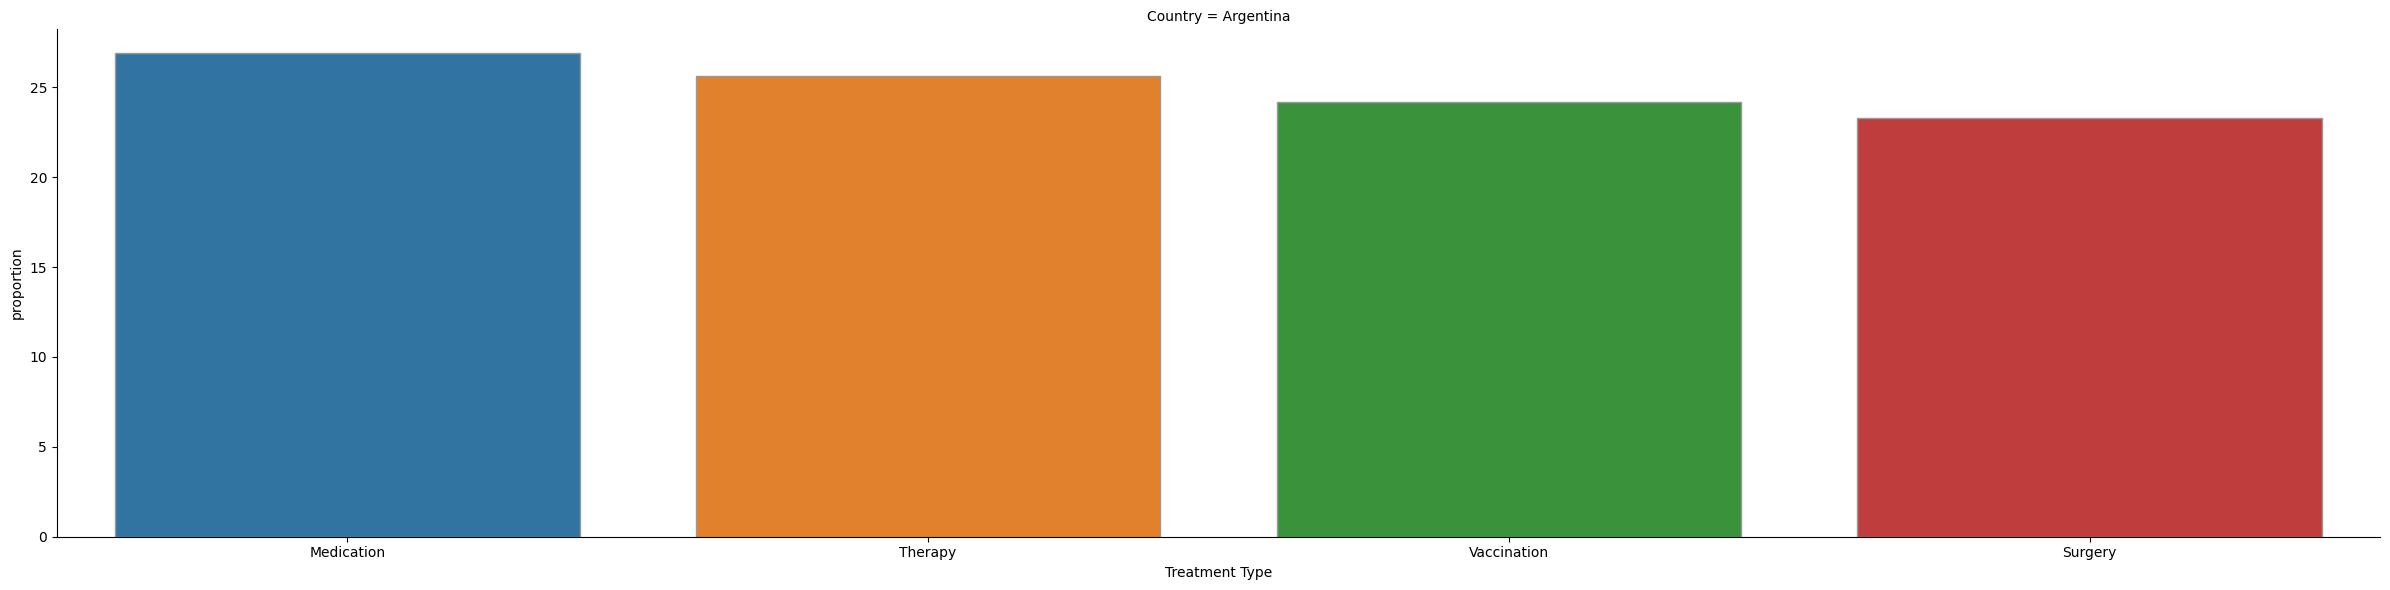

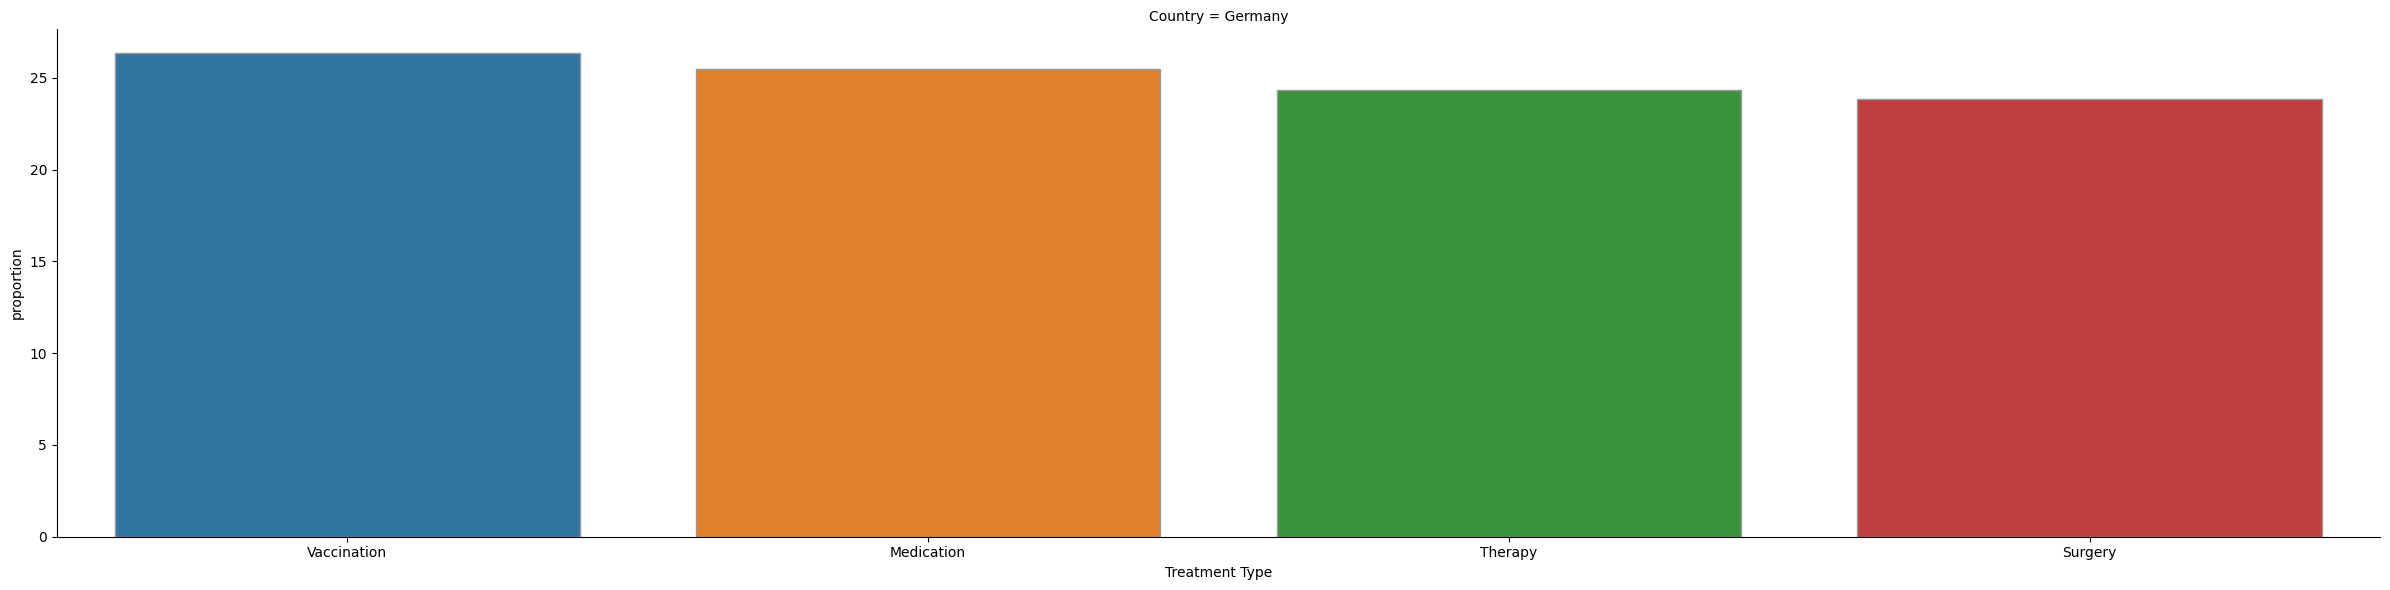

In [64]:
for coly in df_2023["Country"].unique():
      cat_colx = "Treatment Type"
      cat_coly = "Country"
      frecuencias_absolutas = df_2023[df_2023["Country"] == coly].groupby(cat_coly, as_index = False)[cat_colx].value_counts()
      frecuencias_relativas = df_2023[df_2023["Country"] == coly].groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize=True)
      
      frecuencias_relativas["proportion"] *= 100
      
      sns.catplot(x = "Treatment Type",
                y = "proportion",
                col = "Country",
                hue = "Treatment Type",
                kind = "bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
                edgecolor = ".6",
                data = frecuencias_relativas,
                height = 6,    # Ajusta la altura de cada gráfico
                aspect = 4); # Ajusta la relación de aspecto (más ancho que alto)

proporcion_enfermedad_pais = df_2023.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True).values